# Thesaurus
---

- Thesaurus is manually made by humans.
- It is 180 opposite to the philosophy that humans do not set rules and machines are trained from given data.
- Issues of Thesaurus
    - difficult to keep abreast of the changes as time goes by
    - too expensive due to labor costs
    - not able to distinguish words with subtle different nuiance

In [1]:
# !pip install nltk

In [2]:
# import nltk

In [3]:
# nltk.download('wordnet')

In [4]:
# nltk.download('omw-1.4')

In [5]:
from nltk.corpus import wordnet

In [6]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [7]:
car = wordnet.synset('car.n.01')

In [8]:
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [9]:
car2 = wordnet.synset('car.n.02')

In [10]:
car2.definition()

'a wheeled vehicle adapted to the rails of railroad'

In [11]:
# synonyms
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [12]:
car.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')]]

In [13]:
novel = wordnet.synset('novel.n.01')

In [14]:
car.path_similarity(novel)

0.05555555555555555

In [15]:
motorcycle = wordnet.synset('motorcycle.n.01')

In [16]:
car.path_similarity(motorcycle)

0.3333333333333333

We start with a corpus, word_to_id, and id_to_word for NLP. We do not depend on Thesaurus for NLP which is rule-based. Count-based model which is based on the hypothesis of John R. Firth is one example. It applies SVD to reducing dimensionality. However, it is computationally expensive so that we do not use them. Instead, we can use Continuous bag-of-words (CBOW) and SkipGram which are also based on the hypothesis of John R. Firth. They can be implemented via neural network models.
- Objective: We want to preserve semantic meanings of words and to reduce dimensionality while representing natural language data in terms of vectors.
- Preprocess the raw data so that obtain a corpus, word_to_id, and id_to_word.
- Use CBOW and SkipGram to reduce the dimensionality of the preprocessed data through distributive representation of input weights. Thus, we convert the original data into word2vec format. It can be implemented via neural network models.
    - Since word2vec has some disadvantages, we utillize CBOW applying embedding tricks and replacing the loss function with the sigmoid function (binomial problems).
    - To train NLP models more effectively, we add an idea which is called negative sampleing. Otherwise, the test performance would be poor.
    - word2vec (CBOW or SkipGram) provides analogy between words.

# Sparse Representation & Co-occurrence Matrix
---

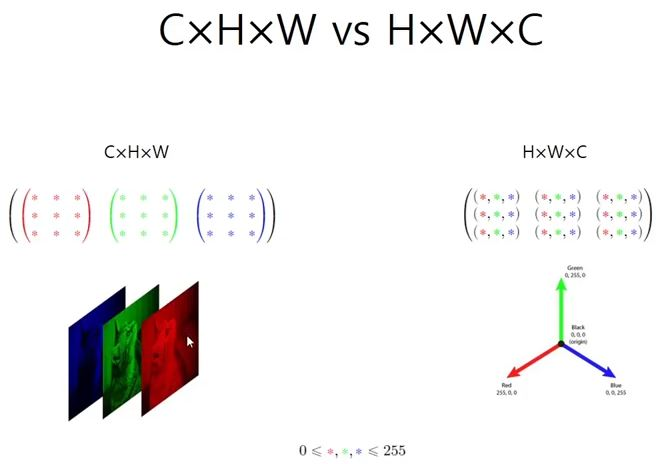

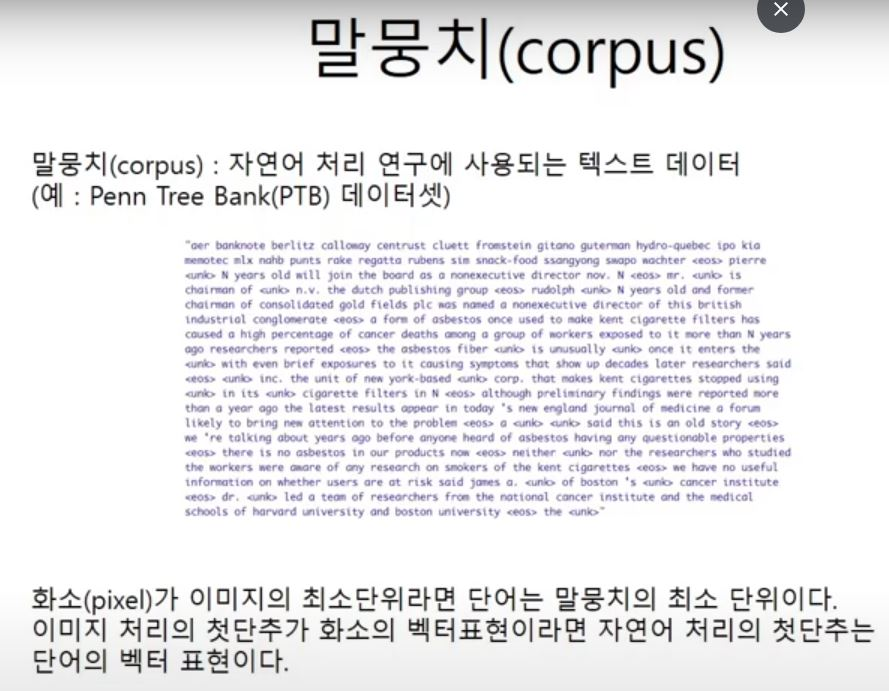

Sparse Representation (one of vector representations) <br>
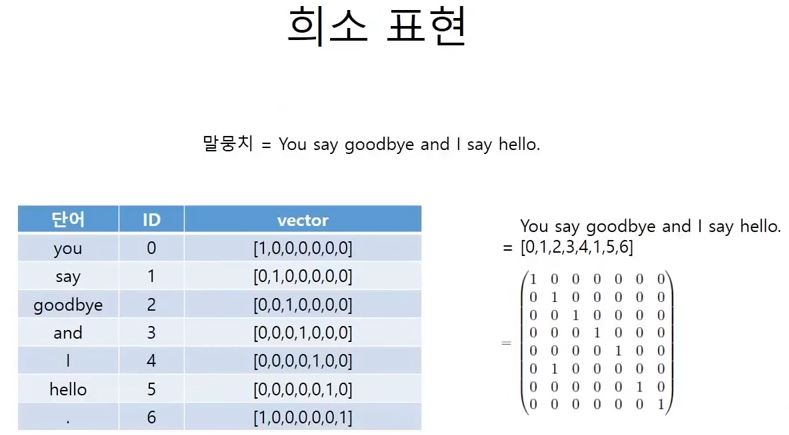

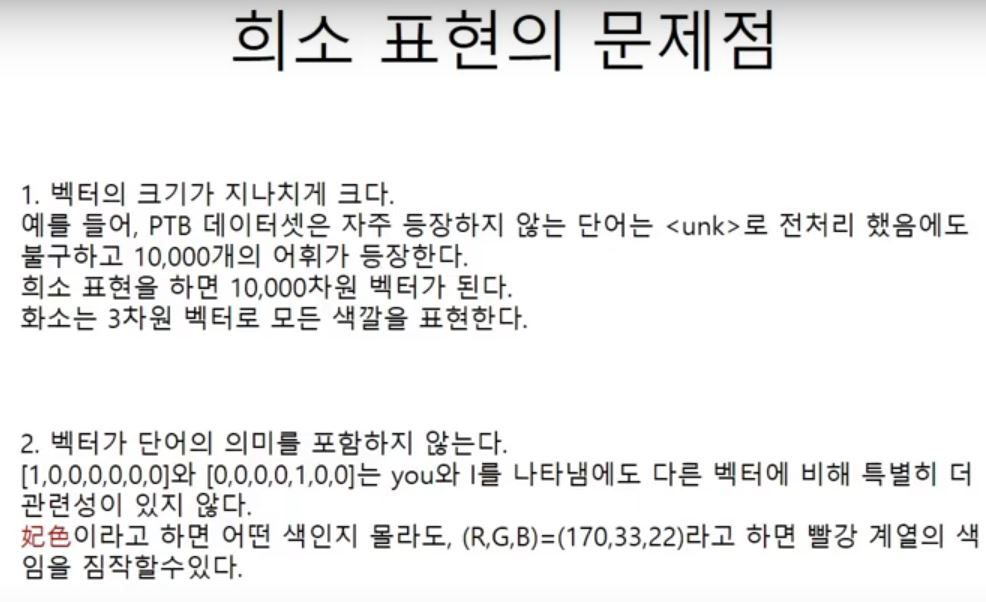

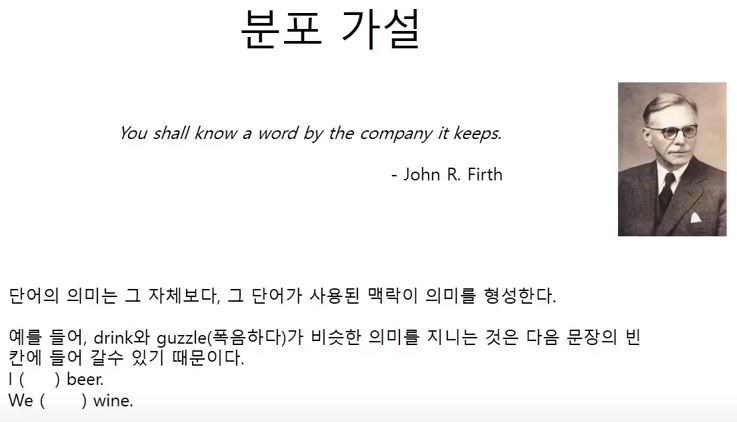

Co-occurrence Matrix in terms of Distributional Hypothesis <br>
(always symmetric matrix)
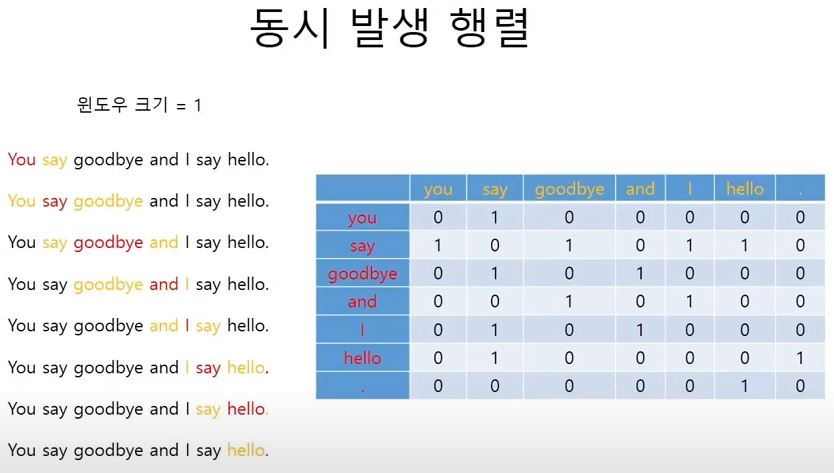

In [17]:
import numpy as np

In [18]:
# sparse representation
def preprocess(text):
    text = text.lower() # Convert 'text' into lower letters.
    text = text.replace('.', ' .')
    words = text.split(' ') # Split strings in terms of spaces. -> Return a list.
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id # key: word, value: new_id
            id_to_word[new_id] = word # key: new_id, value: word
    
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [19]:
# split example
'How are you?'.split('a')

['How ', 're you?']

In [20]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(f"Corpus: {corpus}")
print(f"Word to ID: \n{word_to_id}")
print(f"ID to Word: \n{id_to_word}")
print(f"The length of the Corpus: {len(corpus)}")
print(f"The length of each dictionary: {len(word_to_id)}")

Corpus: [0 1 2 3 4 1 5 6]
Word to ID: 
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
ID to Word: 
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
The length of the Corpus: 8
The length of each dictionary: 7


In [21]:
def cos_similarity(x, y, eps = 1e-8):
    """
    Cosine Similarity Parameters
    ----------
    param x: vector
    param y: vector
    param eps: 'preventing numerator from being divided by 0'
    ----------
    """
    
    # normalization
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    
    return np.dot(nx, ny)

In [22]:
# finding the most similar word
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
    """
    Co-occurrence Matrix Parameters
    ----------
    param query: query (text)
    param word_to_id: dictionary data type
    param id_to_word: dictionary data type
    param word_matrix: co-occurrence matrix
    param top: It specifies the top few words to print out.
    ----------
    """
    
    if query not in word_to_id:
        print(f"The word, {query}, cannot be found.")
        
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # Cosine Similarity
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # Print cosine similarities by descending order.
    count = 0
    # argsort(): Sorts by ascending order and Returns indices.
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [23]:
# co-occurrence matrix
def create_co_matrix(corpus, vocab_size, window_size = 1):
    """
    Co-occurrence Matrix Parameters
    ----------
    param corpus: words list
    param vocab_size: the number of words
    param window_size: window size
    ----------
    """
    
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - 1
            right_idx = idx + 1
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
        
    return co_matrix

In [24]:
c_mat = create_co_matrix(corpus, len(word_to_id), window_size = 1)
c_mat

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [25]:
c0 = c_mat[word_to_id['you']]
c0

array([0, 1, 0, 0, 0, 0, 0])

In [26]:
c1 = c_mat[word_to_id['I'.lower()]]
c1

array([0, 1, 0, 1, 0, 0, 0])

In [27]:
cos_similarity(c0, c1, eps = 1e-8)

0.7071067691154799

In [28]:
most_similar('you', word_to_id, id_to_word, c_mat, top = 5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


# Information Theories & SVD
---

Issues of Co-occurrence Matrix <br>
(Mutual Information: expectation of Point Mutual Information)
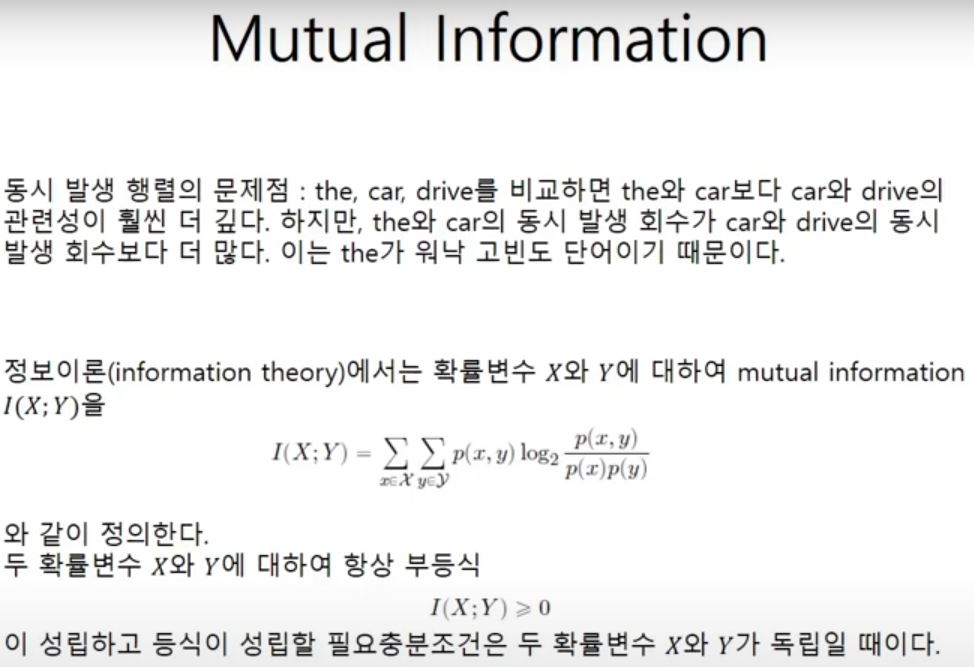

Pointwise Mutual Information <br>
If the probability that two words exist at the same time is zero, we consider the mutual information as zero. (from L'Hopital's rule) <br>
That is, if mutual information is negative, consider it as zero. <br>
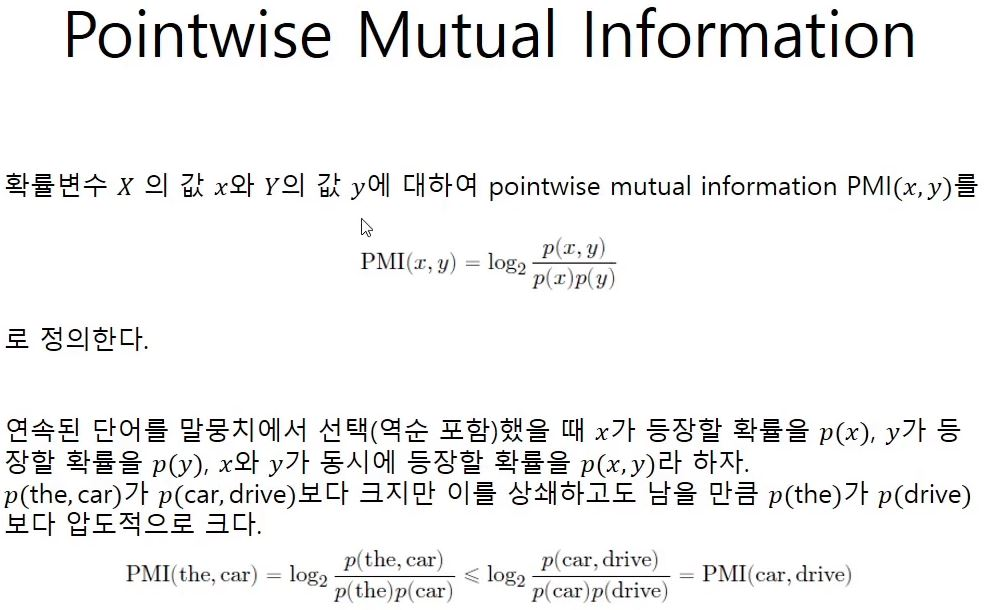

In [29]:
def ppmi(c_mat, verbose = False, eps = 1e-8):
    """
    Positive Pointwise Mutual Information (PPMI) Parameters
    ----------
    c_mat: co-occurrence matrix
    verbose: whether or not show you details
    ----------
    """
    
    M = np.zeros_like(c_mat, dtype = np.float32)
    N = np.sum(c_mat)
    S = np.sum(c_mat, axis = 0)
    total = c_mat.shape[0] * c_mat.shape[1]
    count = 0
    
    for i in range(c_mat.shape[0]):
        for j in range(c_mat.shape[1]):
            # probability: c_mat[i, j] / N, S[i] / N, S[j] / N
            pmi = np.log2(c_mat[i, j] * N / (S[i] * S[j]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                count += 1
                if count % (total // 100) == 0:
                    print(f"{100 * count / total}% completed")
    return M

In [30]:
w = ppmi(c_mat)
w

array([[0.       , 1.8073549, 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [1.8073549, 0.       , 0.8073549, 0.       , 0.8073549, 0.8073549,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.8073549, 0.       , 1.8073549, 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 0.       , 0.       , 0.       ,
        2.807355 ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 2.807355 ,
        0.       ]], dtype=float32)

The dimensionality is unnecessarily too high so that computational costs are expensive. For this reason, we need to reduce dimensionality without loss of much information.<br>
<br>
Regarding PCA, refer to the following. <br>
https://blog.naver.com/a_tte/222330245286

In [31]:
U, S, V = np.linalg.svd(w) # wV = US -> wV: Principal Component Scores

np.set_printoptions(precision = 3)
print(c_mat[0])
print(w[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [32]:
import matplotlib.pyplot as plt

I have no idea why I need to only use the matrix $U$ for dimensionality reduction.

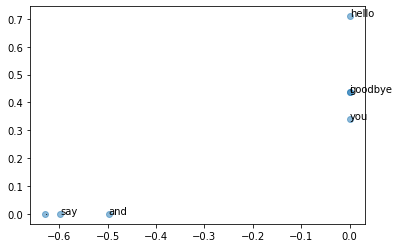

In [33]:
# Consider only two words.
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)

plt.show()

Penn Tree Bank (PTB) Dataset

In [34]:
# !pip install chainer

In [35]:
import chainer

In [36]:
train, val, test = chainer.datasets.get_ptb_words()

In [37]:
# corpus
corpus = train

In [38]:
print(f'Train Type: {type(train), train.shape, train}')
print(f'Validation Type: {type(val), val.shape, val}')
print(f'Test Type: {type(test), test.shape, test}')

Train Type: (<class 'numpy.ndarray'>, (929589,), array([ 0,  1,  2, ..., 39, 26, 24]))
Validation Type: (<class 'numpy.ndarray'>, (73760,), array([2211,  396, 1129, ...,  108,   27,   24]))
Test Type: (<class 'numpy.ndarray'>, (82430,), array([142,  78,  54, ...,  87, 214,  24]))


In [39]:
# word_to_id
word_to_id = chainer.datasets.get_ptb_words_vocabulary()
word_to_id

{'aer': 0,
 'banknote': 1,
 'berlitz': 2,
 'calloway': 3,
 'centrust': 4,
 'cluett': 5,
 'fromstein': 6,
 'gitano': 7,
 'guterman': 8,
 'hydro-quebec': 9,
 'ipo': 10,
 'kia': 11,
 'memotec': 12,
 'mlx': 13,
 'nahb': 14,
 'punts': 15,
 'rake': 16,
 'regatta': 17,
 'rubens': 18,
 'sim': 19,
 'snack-food': 20,
 'ssangyong': 21,
 'swapo': 22,
 'wachter': 23,
 '<eos>': 24,
 'pierre': 25,
 '<unk>': 26,
 'N': 27,
 'years': 28,
 'old': 29,
 'will': 30,
 'join': 31,
 'the': 32,
 'board': 33,
 'as': 34,
 'a': 35,
 'nonexecutive': 36,
 'director': 37,
 'nov.': 38,
 'mr.': 39,
 'is': 40,
 'chairman': 41,
 'of': 42,
 'n.v.': 43,
 'dutch': 44,
 'publishing': 45,
 'group': 46,
 'rudolph': 47,
 'and': 48,
 'former': 49,
 'consolidated': 50,
 'gold': 51,
 'fields': 52,
 'plc': 53,
 'was': 54,
 'named': 55,
 'this': 56,
 'british': 57,
 'industrial': 58,
 'conglomerate': 59,
 'form': 60,
 'asbestos': 61,
 'once': 62,
 'used': 63,
 'to': 64,
 'make': 65,
 'kent': 66,
 'cigarette': 67,
 'filters': 68,
 'h

In [40]:
# id_to_word
id_to_word = dict((j, i) for i, j in word_to_id.items())
id_to_word

{0: 'aer',
 1: 'banknote',
 2: 'berlitz',
 3: 'calloway',
 4: 'centrust',
 5: 'cluett',
 6: 'fromstein',
 7: 'gitano',
 8: 'guterman',
 9: 'hydro-quebec',
 10: 'ipo',
 11: 'kia',
 12: 'memotec',
 13: 'mlx',
 14: 'nahb',
 15: 'punts',
 16: 'rake',
 17: 'regatta',
 18: 'rubens',
 19: 'sim',
 20: 'snack-food',
 21: 'ssangyong',
 22: 'swapo',
 23: 'wachter',
 24: '<eos>',
 25: 'pierre',
 26: '<unk>',
 27: 'N',
 28: 'years',
 29: 'old',
 30: 'will',
 31: 'join',
 32: 'the',
 33: 'board',
 34: 'as',
 35: 'a',
 36: 'nonexecutive',
 37: 'director',
 38: 'nov.',
 39: 'mr.',
 40: 'is',
 41: 'chairman',
 42: 'of',
 43: 'n.v.',
 44: 'dutch',
 45: 'publishing',
 46: 'group',
 47: 'rudolph',
 48: 'and',
 49: 'former',
 50: 'consolidated',
 51: 'gold',
 52: 'fields',
 53: 'plc',
 54: 'was',
 55: 'named',
 56: 'this',
 57: 'british',
 58: 'industrial',
 59: 'conglomerate',
 60: 'form',
 61: 'asbestos',
 62: 'once',
 63: 'used',
 64: 'to',
 65: 'make',
 66: 'kent',
 67: 'cigarette',
 68: 'filters',
 69

In [41]:
window_size = 2
wordvec_size = 100
vocab_size = len(word_to_id)

# Co-occurrence Matrix
c_mat = create_co_matrix(corpus, vocab_size, window_size)

# Positive Pointwise Mutual Information
w = ppmi(c_mat, verbose = True)

# Dimensionality Reduction & Similarities
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(w, n_components = wordvec_size, n_iter = 5,
                             random_state = None)
except ImportError:
    U, S, V = np.linalg.svd(w)

# 100 words from the left
word_vecs = U[:, :wordvec_size]

queries = ['you', 'year', 'car', 'toyota']
for query in queries:
    # in terms of cosine similarity
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)

C:\Users\1suof\AppData\Local\Temp\ipykernel_22436\1648395287.py:19: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(c_mat[i, j] * N / (S[i] * S[j]) + eps)
C:\Users\1suof\AppData\Local\Temp\ipykernel_22436\1648395287.py:19: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(c_mat[i, j] * N / (S[i] * S[j]) + eps)


1.0% completed
2.0% completed
3.0% completed
4.0% completed
5.0% completed
6.0% completed
7.0% completed
8.0% completed
9.0% completed
10.0% completed
11.0% completed
12.0% completed
13.0% completed
14.0% completed
15.0% completed
16.0% completed
17.0% completed
18.0% completed
19.0% completed
20.0% completed
21.0% completed
22.0% completed
23.0% completed
24.0% completed
25.0% completed
26.0% completed
27.0% completed
28.0% completed
29.0% completed
30.0% completed
31.0% completed
32.0% completed
33.0% completed
34.0% completed
35.0% completed
36.0% completed
37.0% completed
38.0% completed
39.0% completed
40.0% completed
41.0% completed
42.0% completed
43.0% completed
44.0% completed
45.0% completed
46.0% completed
47.0% completed
48.0% completed
49.0% completed
50.0% completed
51.0% completed
52.0% completed
53.0% completed
54.0% completed
55.0% completed
56.0% completed
57.0% completed
58.0% completed
59.0% completed
60.0% completed
61.0% completed
62.0% completed
63.0% completed
6

# word2vec prototype
---

Continuous bag-of-words Model
- Predicting words from contexts

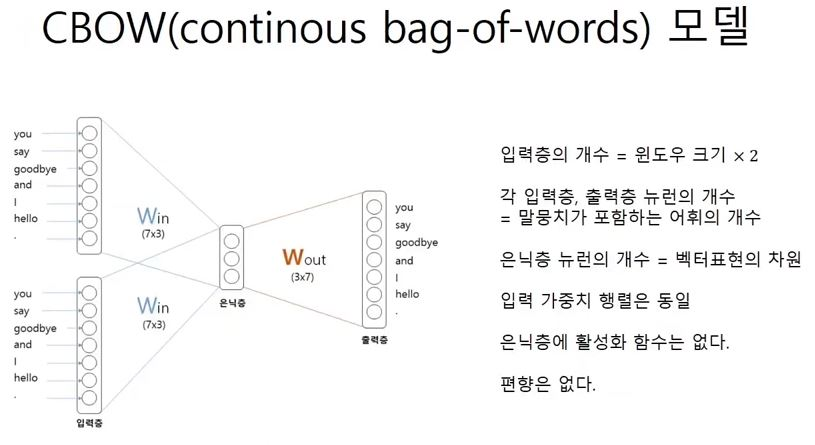

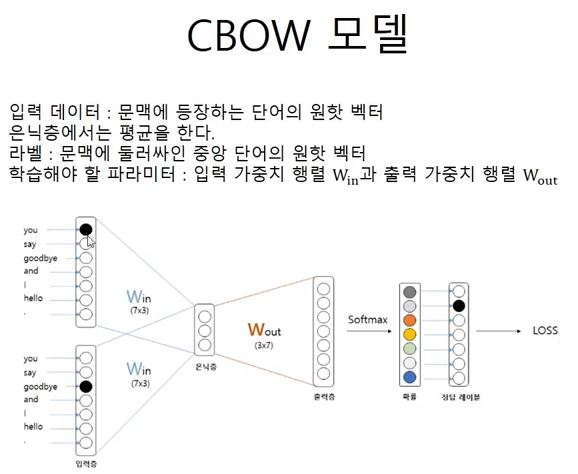

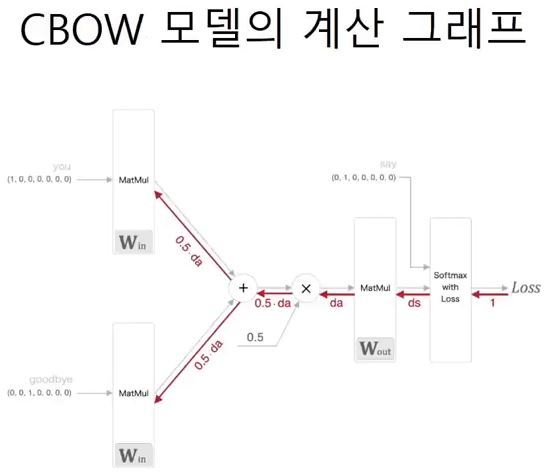

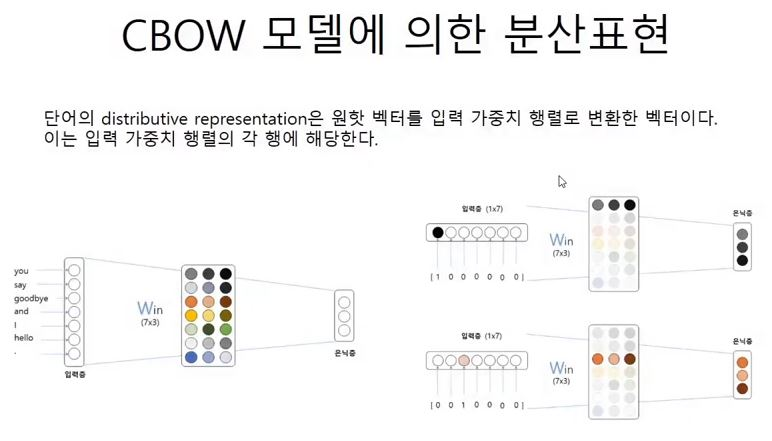

In [42]:
import numpy as np

In [43]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params # a trick to remove a pair of brackets
                         # x, = [1] -> x = 1
        out = np.dot(x, W)
        self.x = x # Store 'x' for back propagation.
        
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW # for deep copy (not shallow copy)
        
        return dx

In [44]:
# sparse representations of contexts (inputs) -> [you, goodbye]
# You say goodbye and I say hello.
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]]) # you
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]]) # goodbye

In [45]:
# Initiate weights.
# W: distributive representations of one-hot vectors
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

In [46]:
# creating layers
# Keep in mind that there is no bias in 'MatMul' class.
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

In [47]:
# forward
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[-0.49   0.305  0.068 -1.893  0.981  0.665  0.083]]


Simple CBOW

In [48]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis = 1, keepdims = True)
        x = np.exp(x)
        x /= x.sum(axis = 1, keepdims = True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis = 1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class SoftMaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax output
        self.t = None  # ground truth

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # Return indices of the ground truth
        # if targets are one-hot encoded.
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis = 1)

        loss = cross_entropy_error(self.y, self.t)
        
        return loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

In [49]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # weights initialization
        W_in = 0.01 * np.random.randn(V, H).astype('f') # astype('f'): 32-bit
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        # layers
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftMaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        # contexts: 3-dimensional tensors
        h0 = self.in_layer0.forward(contexts[:, 0]) # all left words
        h1 = self.in_layer1.forward(contexts[:, 1]) # all right words
        h = 0.5 * (h0 + h1)
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        
        return loss
    
    def backward(self, dout = 1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        
        return None

In [50]:
# This code shares weights from different layers.
# Thus, there exist identical weights, which cause unintended optimization
# process in our optimizers. (at least in this code)
# For this reason, we remove duplicate weights in our 'Trainer' class.

def remove_duplicate(params, grads):
    '''
    If weights are identical,
    add their gradients.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        # Refer to the '__init__' method in SimpleCBOW or SimpleSkipGram.
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # if weights are shared..
                if params[i] is params[j]: # False if one of them is the copy of another..
                    grads[i] += grads[j]  # add gradients
                                          # Recall that there are
                                          # identical weight tensors.
                                          # ex) W_in of CBOW model
                                          #     W_out of SkipGram model
                    find_flg = True
                    params.pop(j) # deleting the 'j'th weight tensor
                    grads.pop(j) # deleting the 'j'th gradient tensor
                # else if weights are shared in a transposed manner..
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate

In [51]:
import time

In [52]:
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0
                
    def training(self, x, t, max_epoch = 10, batch_size = 32,
                 max_grad = None, eval_interval = 20):
        # max_grad: to prevent gradient explosion
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0
        
        start_time = time.time()
        for epoch in range(max_epoch):
            # shuffle
            idx = np.random.permutation(np.arange(data_size))
            x = x[idx]
            t = t[idx]
            
            for iters in range(max_iters):
                batch_x = x[iters * batch_size:(iters + 1) * batch_size]
                batch_t = t[iters * batch_size:(iters + 1) * batch_size]
                
                # update
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)
                if max_grad is not None:
                    # If the L2 norm of gradients is too large,
                    # gradient explosion can be caused.
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1
                
                # training performance
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print(f"Epoch: {self.current_epoch + 1}\n" +
                          f"Iteration: {iters + 1} / {max_iters}\n" +
                          f"Elapsed Time: {elapsed_time}\n" +
                          f"Loss: {avg_loss}")
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0
                    
            self.current_epoch += 1
        
    def plot(self, ylim = None):
        x = np.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label = 'train')
        plt.xlabel('Iteration (' + str(self.eval_interval) + ')')
        plt.ylabel('Loss')
        plt.show()

In [53]:
class Adam:
    """
    Adam Optimizer
    lr: a learning rate component (eta in the above)
    beta1: a hyperparameter for the Momentum Part
    beta2: a hyperparameter for the RMSProp Part (varying learning rate)
    """
    
    def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        # In this case, 'params', 'm', and 'v' are not dictionary datatype.
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
                
        self.iter += 1
        # modified learning rate (to replace m and v with m_hat and v_hat)
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / \
            (1.0 - self.beta1**self.iter)
        for i in range(len(params)):
            # Update the Momentum hyperparameter.
            self.m[i] += (1 - self.beta1) * (grads[i] -self.m[i])
            # Update the RMSProp hyperparameter.
            # Hadamard product can be easily implemented via NumPy operations.
            self.v[i] += (1 - self.beta2) * (grads[i]**2 -self.v[i])
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

In [54]:
def create_contexts_target(corpus, window_size = 1):
    '''
    corpus: a list of indices each of which indicates the index of a word
    window_size: the size of window (to the left and to the right)
    '''
    # target: from the second element to the (n-1)th element
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

In [55]:
def convert_one_hot(corpus, vocab_size):
    N = corpus.shape[0] # the length of a corpus

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype = np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype = np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot

In [56]:
# hyperparameters
window_size = 1
hidden_size = 5 # It has to do with the size of word2vec representations.
batch_size = 3
max_epoch = 1000

# input data
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
print(contexts)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [57]:
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)
print(contexts)
print(target)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


Epoch: 1
Iteration: 1 / 2
Elapsed Time: 0.0
Loss: 1.9458367565907075
Epoch: 2
Iteration: 1 / 2
Elapsed Time: 0.0009999275207519531
Loss: 1.9458238742821155
Epoch: 3
Iteration: 1 / 2
Elapsed Time: 0.0019986629486083984
Loss: 1.9457903777899936
Epoch: 4
Iteration: 1 / 2
Elapsed Time: 0.0019986629486083984
Loss: 1.945697873305047
Epoch: 5
Iteration: 1 / 2
Elapsed Time: 0.0029993057250976562
Loss: 1.9456042857624678
Epoch: 6
Iteration: 1 / 2
Elapsed Time: 0.0029993057250976562
Loss: 1.945420126988866
Epoch: 7
Iteration: 1 / 2
Elapsed Time: 0.004000663757324219
Loss: 1.9452673994956866
Epoch: 8
Iteration: 1 / 2
Elapsed Time: 0.004000663757324219
Loss: 1.9452130275173567
Epoch: 9
Iteration: 1 / 2
Elapsed Time: 0.005000591278076172
Loss: 1.9451745529902515
Epoch: 10
Iteration: 1 / 2
Elapsed Time: 0.005000591278076172
Loss: 1.9446961771720368
Epoch: 11
Iteration: 1 / 2
Elapsed Time: 0.006000518798828125
Loss: 1.9446603584975677
Epoch: 12
Iteration: 1 / 2
Elapsed Time: 0.006000518798828125
Loss

Epoch: 322
Iteration: 1 / 2
Elapsed Time: 0.15003347396850586
Loss: 0.8622692102403153
Epoch: 323
Iteration: 1 / 2
Elapsed Time: 0.15103387832641602
Loss: 0.869552728816577
Epoch: 324
Iteration: 1 / 2
Elapsed Time: 0.15103387832641602
Loss: 0.9885273890224526
Epoch: 325
Iteration: 1 / 2
Elapsed Time: 0.1520400047302246
Loss: 0.8387709474419816
Epoch: 326
Iteration: 1 / 2
Elapsed Time: 0.1520400047302246
Loss: 0.9090559104008815
Epoch: 327
Iteration: 1 / 2
Elapsed Time: 0.15304827690124512
Loss: 0.9094851419115719
Epoch: 328
Iteration: 1 / 2
Elapsed Time: 0.15304827690124512
Loss: 0.9804658019321606
Epoch: 329
Iteration: 1 / 2
Elapsed Time: 0.15404081344604492
Loss: 0.7983065628105708
Epoch: 330
Iteration: 1 / 2
Elapsed Time: 0.15404081344604492
Loss: 0.9782046317329665
Epoch: 331
Iteration: 1 / 2
Elapsed Time: 0.15503358840942383
Loss: 0.8577847809601289
Epoch: 332
Iteration: 1 / 2
Elapsed Time: 0.15503358840942383
Loss: 1.046703141524257
Epoch: 333
Iteration: 1 / 2
Elapsed Time: 0.155

Epoch: 418
Iteration: 1 / 2
Elapsed Time: 0.19773197174072266
Loss: 0.508734005563408
Epoch: 419
Iteration: 1 / 2
Elapsed Time: 0.19904255867004395
Loss: 0.970843893846219
Epoch: 420
Iteration: 1 / 2
Elapsed Time: 0.19904255867004395
Loss: 0.6506091637256799
Epoch: 421
Iteration: 1 / 2
Elapsed Time: 0.200042724609375
Loss: 0.8960751316802731
Epoch: 422
Iteration: 1 / 2
Elapsed Time: 0.200042724609375
Loss: 0.649487610260087
Epoch: 423
Iteration: 1 / 2
Elapsed Time: 0.20104408264160156
Loss: 0.7697614101443934
Epoch: 424
Iteration: 1 / 2
Elapsed Time: 0.20204472541809082
Loss: 0.8955541305410408
Epoch: 425
Iteration: 1 / 2
Elapsed Time: 0.20204472541809082
Loss: 0.6969830042699511
Epoch: 426
Iteration: 1 / 2
Elapsed Time: 0.20304512977600098
Loss: 0.8406157038707178
Epoch: 427
Iteration: 1 / 2
Elapsed Time: 0.20304512977600098
Loss: 0.7659343463861525
Epoch: 428
Iteration: 1 / 2
Elapsed Time: 0.20404553413391113
Loss: 0.6384402206183044
Epoch: 429
Iteration: 1 / 2
Elapsed Time: 0.204045

Epoch: 699
Iteration: 1 / 2
Elapsed Time: 0.3370780944824219
Loss: 0.8007852142764085
Epoch: 700
Iteration: 1 / 2
Elapsed Time: 0.33807945251464844
Loss: 0.5711607204393307
Epoch: 701
Iteration: 1 / 2
Elapsed Time: 0.33807945251464844
Loss: 0.6641892639768847
Epoch: 702
Iteration: 1 / 2
Elapsed Time: 0.339078426361084
Loss: 0.6175100800630409
Epoch: 703
Iteration: 1 / 2
Elapsed Time: 0.339078426361084
Loss: 0.4339960172505458
Epoch: 704
Iteration: 1 / 2
Elapsed Time: 0.34008026123046875
Loss: 0.7285847771689904
Epoch: 705
Iteration: 1 / 2
Elapsed Time: 0.34008026123046875
Loss: 0.5051550532978555
Epoch: 706
Iteration: 1 / 2
Elapsed Time: 0.3410806655883789
Loss: 0.6629331111349523
Epoch: 707
Iteration: 1 / 2
Elapsed Time: 0.34208083152770996
Loss: 0.5696699612430202
Epoch: 708
Iteration: 1 / 2
Elapsed Time: 0.34208083152770996
Loss: 0.6154201530296053
Epoch: 709
Iteration: 1 / 2
Elapsed Time: 0.3430798053741455
Loss: 0.6801133394835968
Epoch: 710
Iteration: 1 / 2
Elapsed Time: 0.343079

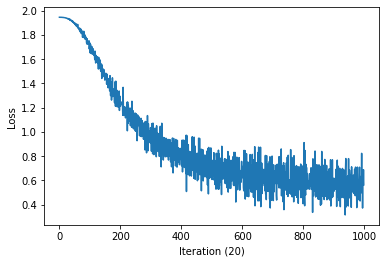

Words	: word2vec Representations
------------------------------------------------------------
you	: [-1.185  1.213  1.136 -1.081 -1.177]
say	: [ 0.156 -0.367 -1.274  1.235  1.236]
goodbye	: [-0.762  0.613  0.773 -0.945 -0.708]
and	: [ 1.572 -1.582 -1.105  0.895  1.087]
i	: [-0.748  0.625  0.776 -0.948 -0.72 ]
hello	: [-1.178  1.232  1.137 -1.064 -1.191]
.	: [-1.432  1.531 -1.061  1.119  1.042]


In [58]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.training(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
print(f"Words\t: word2vec Representations\n" + "-" * 60)
for word_id, word in id_to_word.items():
    print(f"{word}\t: {word_vecs[word_id]}")

Skip-gram Model
- Predicting contexts from words

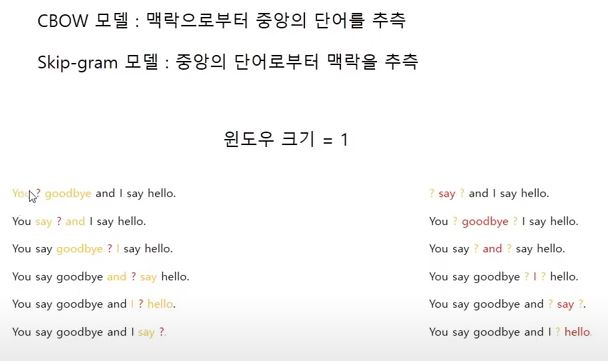

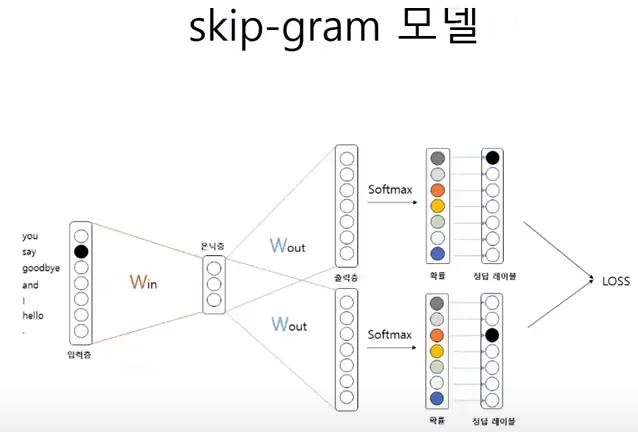

Simple Skip-gram

In [59]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # weight initialization
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V)
        
        # creating layers
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftMaxWithLoss()
        self.loss_layer2 = SoftMaxWithLoss()
        
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        
        return loss
    
    def backward(self, dout = 1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        
        return None

Epoch: 1
Iteration: 1 / 2
Elapsed Time: 0.0
Loss: 3.8918273757892474
Epoch: 2
Iteration: 1 / 2
Elapsed Time: 0.0009989738464355469
Loss: 3.8916873597347093
Epoch: 3
Iteration: 1 / 2
Elapsed Time: 0.0019998550415039062
Loss: 3.8916239376991806
Epoch: 4
Iteration: 1 / 2
Elapsed Time: 0.002999544143676758
Loss: 3.8916168129005086
Epoch: 5
Iteration: 1 / 2
Elapsed Time: 0.002999544143676758
Loss: 3.8912557166470076
Epoch: 6
Iteration: 1 / 2
Elapsed Time: 0.004000663757324219
Loss: 3.8913637418928384
Epoch: 7
Iteration: 1 / 2
Elapsed Time: 0.004000663757324219
Loss: 3.890858780056149
Epoch: 8
Iteration: 1 / 2
Elapsed Time: 0.0049991607666015625
Loss: 3.8906166971668186
Epoch: 9
Iteration: 1 / 2
Elapsed Time: 0.0049991607666015625
Loss: 3.8907303862326854
Epoch: 10
Iteration: 1 / 2
Elapsed Time: 0.0060002803802490234
Loss: 3.8899953992468856
Epoch: 11
Iteration: 1 / 2
Elapsed Time: 0.0070002079010009766
Loss: 3.889772415907311
Epoch: 12
Iteration: 1 / 2
Elapsed Time: 0.008001327514648438
Los

Epoch: 238
Iteration: 1 / 2
Elapsed Time: 0.14155125617980957
Loss: 2.606650209603132
Epoch: 239
Iteration: 1 / 2
Elapsed Time: 0.14255237579345703
Loss: 2.537996023484009
Epoch: 240
Iteration: 1 / 2
Elapsed Time: 0.14355230331420898
Loss: 2.674495745089563
Epoch: 241
Iteration: 1 / 2
Elapsed Time: 0.14355230331420898
Loss: 2.481328986859471
Epoch: 242
Iteration: 1 / 2
Elapsed Time: 0.14455270767211914
Loss: 2.6668277473116087
Epoch: 243
Iteration: 1 / 2
Elapsed Time: 0.1455535888671875
Loss: 2.575811332785016
Epoch: 244
Iteration: 1 / 2
Elapsed Time: 0.1455535888671875
Loss: 2.6794992869065712
Epoch: 245
Iteration: 1 / 2
Elapsed Time: 0.14655542373657227
Loss: 2.503713854237945
Epoch: 246
Iteration: 1 / 2
Elapsed Time: 0.1475543975830078
Loss: 2.587903283742278
Epoch: 247
Iteration: 1 / 2
Elapsed Time: 0.1475543975830078
Loss: 2.5172949392533845
Epoch: 248
Iteration: 1 / 2
Elapsed Time: 0.14855384826660156
Loss: 2.740275217552603
Epoch: 249
Iteration: 1 / 2
Elapsed Time: 0.14855384826

Epoch: 557
Iteration: 1 / 2
Elapsed Time: 0.3296995162963867
Loss: 2.375323918164381
Epoch: 558
Iteration: 1 / 2
Elapsed Time: 0.33069944381713867
Loss: 2.1156848863767443
Epoch: 559
Iteration: 1 / 2
Elapsed Time: 0.33069944381713867
Loss: 2.4921734939549824
Epoch: 560
Iteration: 1 / 2
Elapsed Time: 0.3316993713378906
Loss: 2.4229483615379594
Epoch: 561
Iteration: 1 / 2
Elapsed Time: 0.3316993713378906
Loss: 2.114654326014198
Epoch: 562
Iteration: 1 / 2
Elapsed Time: 0.3326997756958008
Loss: 2.276708465962244
Epoch: 563
Iteration: 1 / 2
Elapsed Time: 0.3326997756958008
Loss: 2.702970236479676
Epoch: 564
Iteration: 1 / 2
Elapsed Time: 0.33370232582092285
Loss: 1.9498035131951654
Epoch: 565
Iteration: 1 / 2
Elapsed Time: 0.334700345993042
Loss: 2.4885892043526274
Epoch: 566
Iteration: 1 / 2
Elapsed Time: 0.334700345993042
Loss: 2.1606828983117428
Epoch: 567
Iteration: 1 / 2
Elapsed Time: 0.33570075035095215
Loss: 2.3713253044484395
Epoch: 568
Iteration: 1 / 2
Elapsed Time: 0.335700750350

Epoch: 863
Iteration: 1 / 2
Elapsed Time: 0.5167422294616699
Loss: 2.2523705585544427
Epoch: 864
Iteration: 1 / 2
Elapsed Time: 0.5177428722381592
Loss: 1.9714254650275342
Epoch: 865
Iteration: 1 / 2
Elapsed Time: 0.5187430381774902
Loss: 2.177583213922139
Epoch: 866
Iteration: 1 / 2
Elapsed Time: 0.5187430381774902
Loss: 2.176774580738731
Epoch: 867
Iteration: 1 / 2
Elapsed Time: 0.5197436809539795
Loss: 2.1765976761695027
Epoch: 868
Iteration: 1 / 2
Elapsed Time: 0.5197436809539795
Loss: 2.145269227857444
Epoch: 869
Iteration: 1 / 2
Elapsed Time: 0.5207440853118896
Loss: 2.203839422266846
Epoch: 870
Iteration: 1 / 2
Elapsed Time: 0.5217437744140625
Loss: 2.2742938344911305
Epoch: 871
Iteration: 1 / 2
Elapsed Time: 0.5227444171905518
Loss: 2.172899874396026
Epoch: 872
Iteration: 1 / 2
Elapsed Time: 0.5227444171905518
Loss: 2.4087043253157496
Epoch: 873
Iteration: 1 / 2
Elapsed Time: 0.5237441062927246
Loss: 1.8042762415484994
Epoch: 874
Iteration: 1 / 2
Elapsed Time: 0.523744106292724

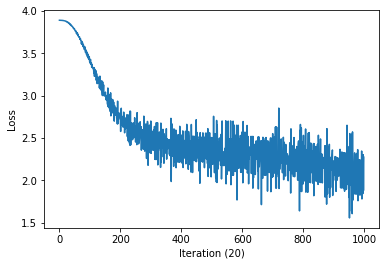

Words	: word2vec Representations
------------------------------------------------------------
you	: [ 0.021 -0.001  0.012  0.006  0.007]
say	: [-0.2    0.69  -0.444  0.23   0.581]
goodbye	: [ 0.952 -0.779  0.849 -0.844 -1.125]
and	: [-1.208  1.071 -1.151  1.2    1.087]
i	: [ 0.936 -0.762  0.849 -0.866 -1.136]
hello	: [ 0.232 -1.05   0.646 -0.735  0.477]
.	: [-0.019  0.021  0.008  0.007 -0.017]


In [60]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model =  SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# You do not have to change the order of 'contexts' and 'target'
# since it is already considered in the forward attribute of
# SimpleSkipGram' class.
trainer.training(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
print(f"Words\t: word2vec Representations\n" + "-" * 60)
for word_id, word in id_to_word.items():
    print(f"{word}\t: {word_vecs[word_id]}")

Issues of word2vec

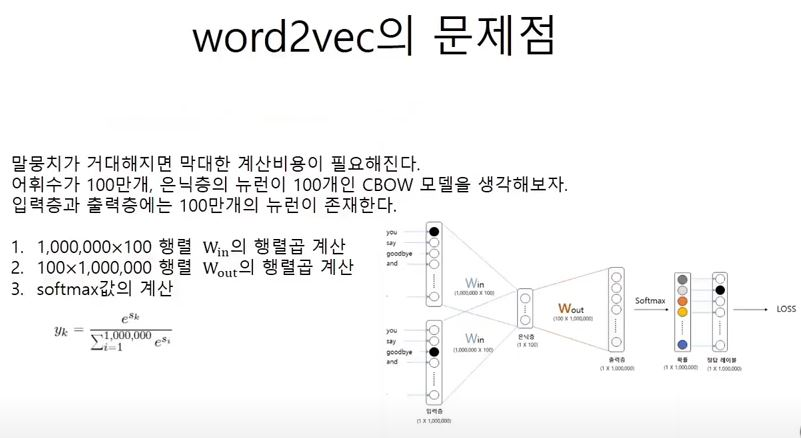

# embedding layers and embedding dot layers
---

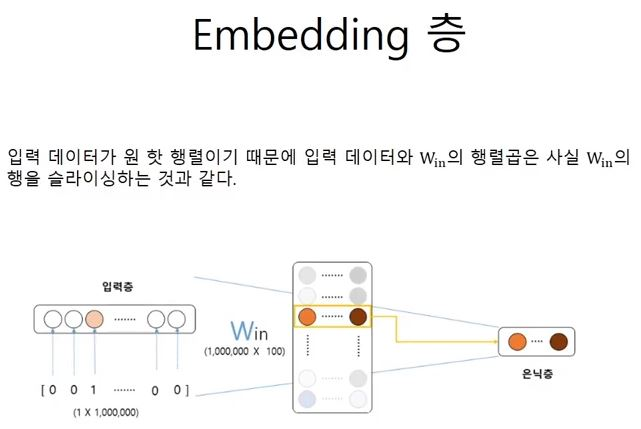

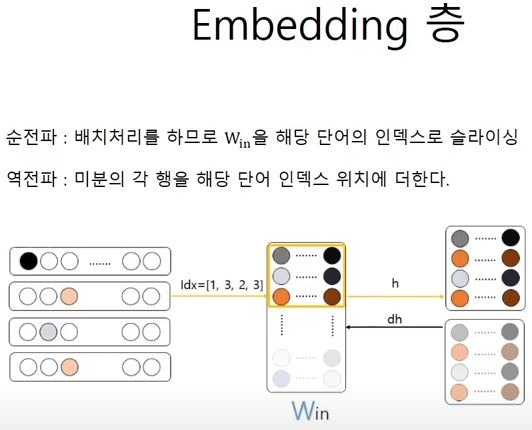

In [61]:
class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None
        
    def forward(self, idx):
        W, = self.params
        self.idx = idx
        # slicing
        out = W[idx]
        
        return out
    
    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        
        return None

In [62]:
# Embedding backward method example
dW = np.zeros((3, 3))
dout = np.arange(12).reshape(4, 3)
idx = [0, 2, 1, 2]
print(dW)
print(dout)
print(idx)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0, 2, 1, 2]


In [63]:
# Add 'dout' to 'dW'.
# the 1st row of 'dout' to the 1st row in 'dW'
# the 2nd and the 4th row of 'dout' to the 3rd row in 'dW'
# the 3rd row of 'dout' to the 2nd row in 'dW'
np.add.at(dW, idx, dout)
dW

array([[ 0.,  1.,  2.],
       [ 6.,  7.,  8.],
       [12., 14., 16.]])

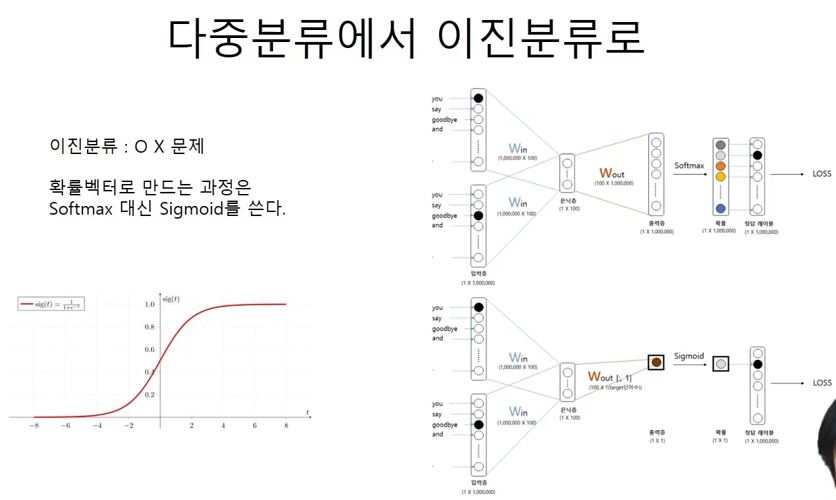

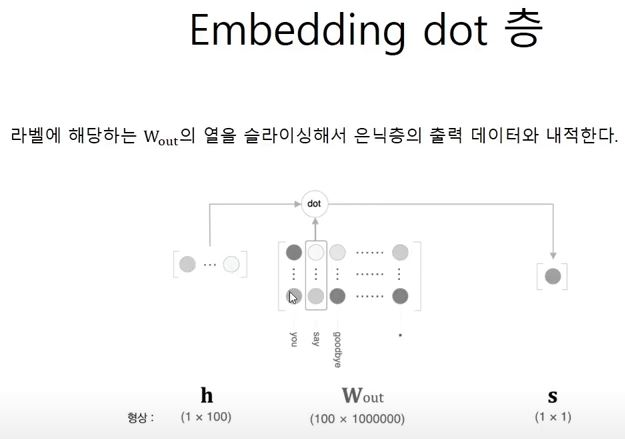

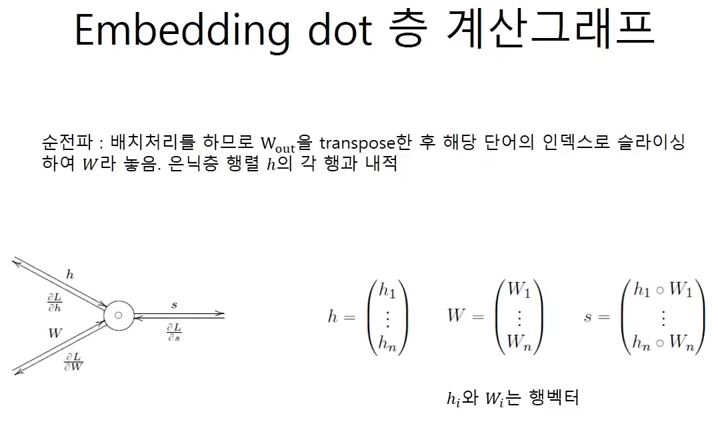

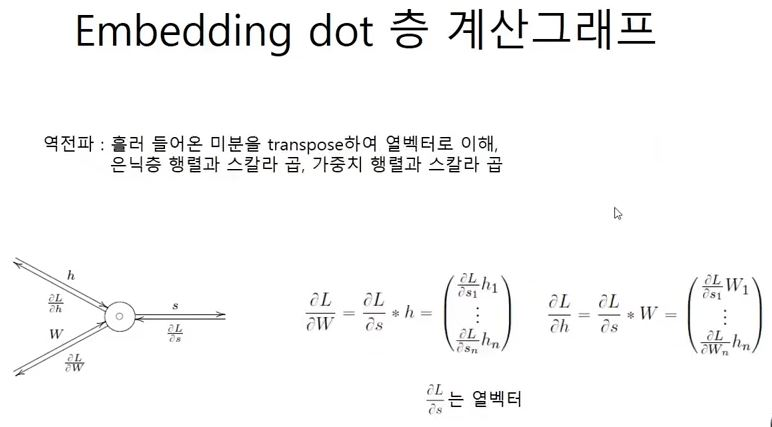

In [64]:
class EmbeddingDot:
    def __init__(self, W): # W: transposed weight matrix
        self.embed = Embedding(W)
        self.params = self.embed.params
        self.grads = self.embed.grads
        self.cache = None
        
    def forward(self, h, idx):
        target_W = self.embed.forward(idx)
        out = np.sum(target_W * h, axis = 1)
        
        self.cache = (h, target_W)
        
        return out
    
    def backward(self, dout):
        h, target_W = self.cache
        dout = dout.reshape(dout.shape[0], 1)
        
        dtarget_W = dout * h
        self.embed.backward(dtarget_W)
        dh = dout * target_W
        
        return dh

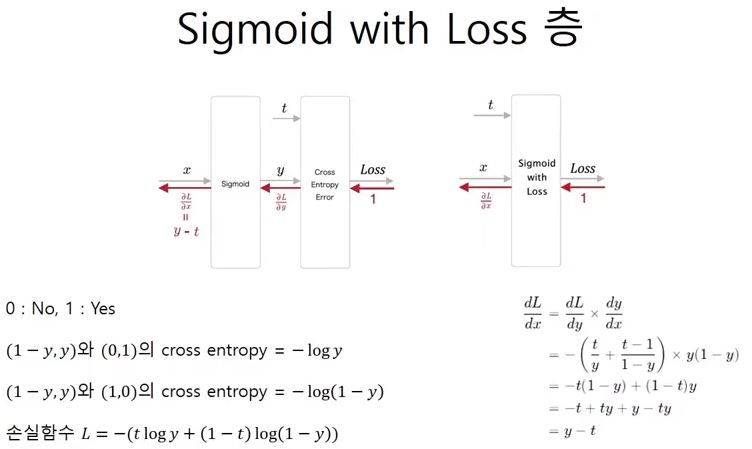

In [65]:
class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], [] # nothing to learn
                                         # written just for the equivalence
                                         # to other layers
        self.loss = None
        self.y = None # sigmoid output
        self.t = None # groundtruth
        
    def forward(self, x, t):
        # x, t: batch data
        self.t = t
        self.y = 1 / (1 + np.exp(-x))
        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)
        
        return self.loss
    
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) * dout / batch_size
        
        return dx

In [66]:
# np.c_[x, y], np.r_[x, y]
x = np.array([1, 2])
y = np.array([3, 4])
print(np.c_[x, y])
print(np.r_[x, y])

[[1 3]
 [2 4]]
[1 2 3 4]


Negative Sampling

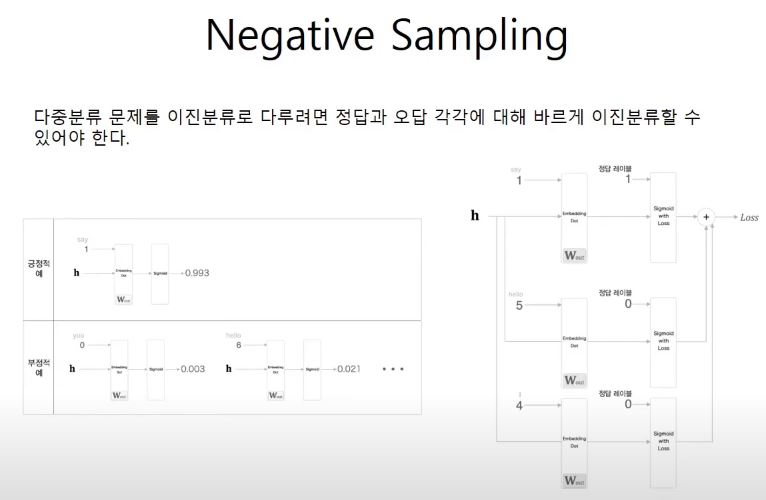

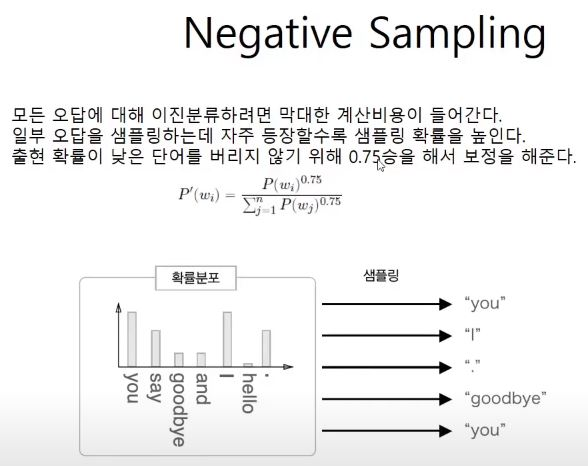

In [67]:
import collections

In [68]:
counts = collections.Counter()
counts['apple'] += 1
print(counts)
counts['orange'] += 2
print(counts)
counts['apple'] += 3
print(counts)

Counter({'apple': 1})
Counter({'orange': 2, 'apple': 1})
Counter({'apple': 4, 'orange': 2})


In [69]:
# negative sampling
class UnigramSampler:
    def __init__(self, corpus, power, sample_size):
        # sample_size: the size of a negative sample (Do not be confused.)
        self.sample_size = sample_size
        self.vocab_size = None
        self.word_p = None
        
        counts = collections.Counter()
        for word_id in corpus:
            counts[word_id] += 1
        
        vocab_size = len(counts)
        self.vocab_size = vocab_size
        
        self.word_p = np.zeros(vocab_size) # probabilities
        for i in range(vocab_size):
            self.word_p[i] = counts[i]
        
        self.word_p = np.power(self.word_p, power)
        self.word_p /= np.sum(self.word_p)
        
    def get_negative_sample(self, target):
        batch_size = target.shape[0]
        
        if not GPU:
            negative_sample = np.zeros((batch_size, self.sample_size),
                                       dtype = np.int32)
            
            for i in range(batch_size):
                p = self.word_p.copy()
                target_idx = target[i]
                p[target_idx] = 0 # Do not include groundtruth
                                  # in the negative sample.
                p /= p.sum() # re-normalization after groundtruth excluded
                negative_sample[i, :] = np.random.choice(self.vocab_size,
                                                         size = self.sample_size,
                                                         replace = False,
                                                         p = p)
        else:
            # Speed is priority when using GPU (cuppy),
            # which means targets can be included in the negative sample.
            negative_sample = np.random.choice(self.vocab_size,
                                               size = (batch_size,
                                                       self.sample_size),
                                               replace = True,
                                               p = self.word_p)
        return negative_sample

In [70]:
class NegativeSamplingLoss:
    """
    It includes not only
    the negative sampling layer
    but alseo
    the embedding dot layer and
    the sigmoid layer with the cross entropy layer.
    """
    def __init__(self, W, corpus, power = 0.75, sample_size = 5):
        # W: inserted as a transposed matrix
        self.sample_size = sample_size
        self.sampler = UnigramSampler(corpus, power, sample_size)
        # We need as many simoid with loss and embedding dot layers as
        # the number of groundtruths in a negative sample (sample_size) and
        # the groundtruth (+1).
        self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_size + 1)]
        self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size + 1)]
        self.params, self.grads = [], []
        for layer in self.embed_dot_layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, h, target):
        # h: from 'Embedding.forward'
        # target example: [0, 0, 1, 0, 0, ..., 0]
        # from 'create_contexts_target' function
        batch_size = target.shape[0]
        negative_sample = self.sampler.get_negative_sample(target)
        
        # cases where the score is more than threshold
        # In this case, use the first layer in 'self.embed_dot_layers'.
        score = self.embed_dot_layers[0].forward(h, target)
        # There are as many true labels as the size of a batch.
        correct_label = np.ones(batch_size, dtype = np.int32)
        # In this case, use the first layer in 'self.loss_layers'.
        loss = self.loss_layers[0].forward(score, correct_label)
        
        # cases where the score is less than threshold
        negative_label = np.zeros(batch_size, dtype = np.int32)
        for i in range(self.sample_size):
            negative_target = negative_sample[:, i]
            # In this case, use the rest of the layers in 'self.embed_dot_layers'
            # except for the first layer.
            score = self.embed_dot_layers[1 + i].forward(h, negative_target)
            # In this case, use the rest of the layers in 'self.loss_layers'
            # except for the first layer.
            loss += self.loss_layers[1 + i].forward(score, negative_label)
        
        return loss
    
    def backward(self, dout = 1):
        dh = 0
        # Very very very important!!!!!!!!!!
        # Keep in mind that
        # the back propagation of a repeat node is a sum node and
        # that of a sum node is a repeat node.
        for l0, l1 in zip(self.loss_layers, self.embed_dot_layers):
            dscore = l0.backward(dout)
            dh += l1.backward(dscore)
            
        return dh

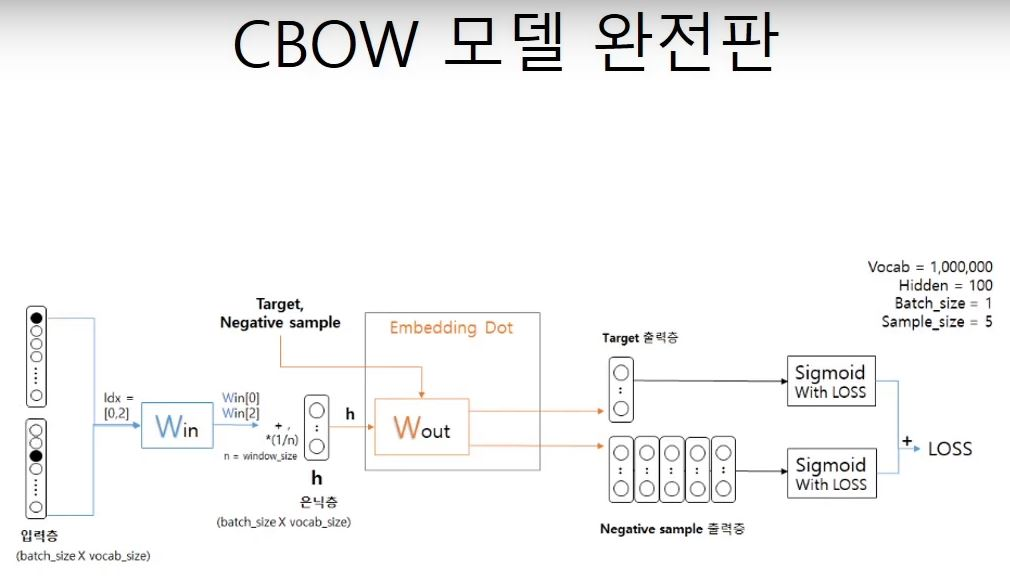
<br>
Typo:
in the hidden layer shape, (batch size X vocab size) $\rightarrow$ (batch size X hidden size)

In [71]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        # weight initialization
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        # W_out will be used in terms of its transposed format
        # for users' convenience.
        W_out = 0.01 * np.random.randn(V, H).astype('f')
        
        # creating the layer for W_in
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in) # W_in initialization
            self.in_layers.append(layer)
            
        # creating the layer for W_out's, the negative sampling,
        # the embedding dot, and
        # the sigmoid layer with the cross entropy layer.
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power = 0.75,
                                            sample_size = 5)
        
        layers = self.in_layers + [self.ns_loss]
        
        # parameters and gradients
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        # distributive representation (word2vec)
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            # the shape of a context: (the length of corpus - 2) X (window size X 2)
            h += layer.forward(contexts[:, i]) # from the first window to the last window
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        
        return loss
    
    def backward(self, dout = 1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout) # updating each 'dW_in' in 'in_layers'
        
        return None

In [72]:
# Regarding CUDA programming in Python with Numba and CuPy, see the below.
# https://www.youtube.com/watch?v=9bBsvpg-Xlk
# For CuPy installation, see the below.
# https://docs.cupy.dev/en/stable/install.html

In [73]:
def to_cpu(x):
    import numpy as np
    if type(x) == np.ndarray:
        return x
    return np.asnumpy(x)

def to_gpu(x):
    import cupy
    if type(x) == cupy.ndarray:
        return x
    return cupy.asarray(x)

Epoch: 1
Iteration: 1 / 9295
Elapsed Time: 0.17116045951843262
Loss: 4.158897247314453
Epoch: 1
Iteration: 21 / 9295
Elapsed Time: 1.4532124996185303
Loss: 4.158448909759521
Epoch: 1
Iteration: 41 / 9295
Elapsed Time: 2.730198621749878
Loss: 4.152390296936035
Epoch: 1
Iteration: 61 / 9295
Elapsed Time: 4.023925065994263
Loss: 4.123381439208985
Epoch: 1
Iteration: 81 / 9295
Elapsed Time: 5.308495759963989
Loss: 4.048030534744263
Epoch: 1
Iteration: 101 / 9295
Elapsed Time: 6.607377529144287
Loss: 3.9243727760314933
Epoch: 1
Iteration: 121 / 9295
Elapsed Time: 7.902081727981567
Loss: 3.7835224704742436
Epoch: 1
Iteration: 141 / 9295
Elapsed Time: 9.193704605102539
Loss: 3.6296405982971187
Epoch: 1
Iteration: 161 / 9295
Elapsed Time: 10.489794492721558
Loss: 3.4931040344238276
Epoch: 1
Iteration: 181 / 9295
Elapsed Time: 11.785457611083984
Loss: 3.3504280281066903
Epoch: 1
Iteration: 201 / 9295
Elapsed Time: 13.069604396820068
Loss: 3.2678855590820306
Epoch: 1
Iteration: 221 / 9295
Elapse

Epoch: 1
Iteration: 1861 / 9295
Elapsed Time: 120.10794401168823
Loss: 2.5067085909843443
Epoch: 1
Iteration: 1881 / 9295
Elapsed Time: 121.38915061950684
Loss: 2.493296155929565
Epoch: 1
Iteration: 1901 / 9295
Elapsed Time: 122.655601978302
Loss: 2.509002515792847
Epoch: 1
Iteration: 1921 / 9295
Elapsed Time: 123.9310052394867
Loss: 2.491819988727569
Epoch: 1
Iteration: 1941 / 9295
Elapsed Time: 125.21406745910645
Loss: 2.5067953143119817
Epoch: 1
Iteration: 1961 / 9295
Elapsed Time: 126.4969117641449
Loss: 2.4917383704185485
Epoch: 1
Iteration: 1981 / 9295
Elapsed Time: 127.77227067947388
Loss: 2.5121849575042723
Epoch: 1
Iteration: 2001 / 9295
Elapsed Time: 129.05771684646606
Loss: 2.4819217405319214
Epoch: 1
Iteration: 2021 / 9295
Elapsed Time: 130.3294541835785
Loss: 2.473477557182312
Epoch: 1
Iteration: 2041 / 9295
Elapsed Time: 131.6118245124817
Loss: 2.4766659870147714
Epoch: 1
Iteration: 2061 / 9295
Elapsed Time: 132.87168860435486
Loss: 2.495903441905975
Epoch: 1
Iteration: 2

Epoch: 1
Iteration: 3721 / 9295
Elapsed Time: 240.0766634941101
Loss: 2.429992699623108
Epoch: 1
Iteration: 3741 / 9295
Elapsed Time: 241.35049629211426
Loss: 2.434651472091675
Epoch: 1
Iteration: 3761 / 9295
Elapsed Time: 242.61743783950806
Loss: 2.4249499993324277
Epoch: 1
Iteration: 3781 / 9295
Elapsed Time: 243.88269448280334
Loss: 2.400646523475647
Epoch: 1
Iteration: 3801 / 9295
Elapsed Time: 245.1581847667694
Loss: 2.4089154176712038
Epoch: 1
Iteration: 3821 / 9295
Elapsed Time: 246.4253432750702
Loss: 2.4281282758712766
Epoch: 1
Iteration: 3841 / 9295
Elapsed Time: 247.69031023979187
Loss: 2.403248426914215
Epoch: 1
Iteration: 3861 / 9295
Elapsed Time: 248.95968008041382
Loss: 2.3983669118881226
Epoch: 1
Iteration: 3881 / 9295
Elapsed Time: 250.2334337234497
Loss: 2.3930782022476196
Epoch: 1
Iteration: 3901 / 9295
Elapsed Time: 251.50034999847412
Loss: 2.419098768234253
Epoch: 1
Iteration: 3921 / 9295
Elapsed Time: 252.76429104804993
Loss: 2.3958554916381836
Epoch: 1
Iteration:

Epoch: 1
Iteration: 5581 / 9295
Elapsed Time: 359.558474779129
Loss: 2.351995940208435
Epoch: 1
Iteration: 5601 / 9295
Elapsed Time: 360.8146336078644
Loss: 2.3438789854049675
Epoch: 1
Iteration: 5621 / 9295
Elapsed Time: 362.0901823043823
Loss: 2.351704897880554
Epoch: 1
Iteration: 5641 / 9295
Elapsed Time: 363.3565185070038
Loss: 2.332293836116791
Epoch: 1
Iteration: 5661 / 9295
Elapsed Time: 364.62487030029297
Loss: 2.3311089639663694
Epoch: 1
Iteration: 5681 / 9295
Elapsed Time: 365.9079978466034
Loss: 2.32854372215271
Epoch: 1
Iteration: 5701 / 9295
Elapsed Time: 367.17414450645447
Loss: 2.3296330065727227
Epoch: 1
Iteration: 5721 / 9295
Elapsed Time: 368.4441080093384
Loss: 2.365024169445038
Epoch: 1
Iteration: 5741 / 9295
Elapsed Time: 369.71934056282043
Loss: 2.350283701896667
Epoch: 1
Iteration: 5761 / 9295
Elapsed Time: 370.99450516700745
Loss: 2.3274859504699714
Epoch: 1
Iteration: 5781 / 9295
Elapsed Time: 372.26300716400146
Loss: 2.310020882129669
Epoch: 1
Iteration: 5801 

Epoch: 1
Iteration: 7441 / 9295
Elapsed Time: 478.56813287734985
Loss: 2.2908183665275574
Epoch: 1
Iteration: 7461 / 9295
Elapsed Time: 479.93079352378845
Loss: 2.290836194038391
Epoch: 1
Iteration: 7481 / 9295
Elapsed Time: 481.32849526405334
Loss: 2.251317173004151
Epoch: 1
Iteration: 7501 / 9295
Elapsed Time: 482.72661232948303
Loss: 2.2480089931488036
Epoch: 1
Iteration: 7521 / 9295
Elapsed Time: 484.07630920410156
Loss: 2.3023328943252563
Epoch: 1
Iteration: 7541 / 9295
Elapsed Time: 485.42591977119446
Loss: 2.2717164077758794
Epoch: 1
Iteration: 7561 / 9295
Elapsed Time: 486.687185049057
Loss: 2.259041263580322
Epoch: 1
Iteration: 7581 / 9295
Elapsed Time: 487.9512929916382
Loss: 2.2596407294273377
Epoch: 1
Iteration: 7601 / 9295
Elapsed Time: 489.21156644821167
Loss: 2.269785038471222
Epoch: 1
Iteration: 7621 / 9295
Elapsed Time: 490.47486186027527
Loss: 2.283659529209136
Epoch: 1
Iteration: 7641 / 9295
Elapsed Time: 491.7281401157379
Loss: 2.277306632041931
Epoch: 1
Iteration: 

Epoch: 2
Iteration: 1 / 9295
Elapsed Time: 598.2749555110931
Loss: 2.2013041261037194
Epoch: 2
Iteration: 21 / 9295
Elapsed Time: 599.5374195575714
Loss: 2.195540491104126
Epoch: 2
Iteration: 41 / 9295
Elapsed Time: 600.8065454959869
Loss: 2.2202663354873655
Epoch: 2
Iteration: 61 / 9295
Elapsed Time: 602.067818403244
Loss: 2.1906844658851625
Epoch: 2
Iteration: 81 / 9295
Elapsed Time: 603.3371028900146
Loss: 2.19153387928009
Epoch: 2
Iteration: 101 / 9295
Elapsed Time: 604.5993835926056
Loss: 2.15623724269867
Epoch: 2
Iteration: 121 / 9295
Elapsed Time: 605.8958356380463
Loss: 2.1940258951187133
Epoch: 2
Iteration: 141 / 9295
Elapsed Time: 607.188971042633
Loss: 2.1834845447540276
Epoch: 2
Iteration: 161 / 9295
Elapsed Time: 608.4422798156738
Loss: 2.1593699951171876
Epoch: 2
Iteration: 181 / 9295
Elapsed Time: 609.7145462036133
Loss: 2.1713440842628478
Epoch: 2
Iteration: 201 / 9295
Elapsed Time: 610.9688370227814
Loss: 2.1846290307044987
Epoch: 2
Iteration: 221 / 9295
Elapsed Time: 

Epoch: 2
Iteration: 1881 / 9295
Elapsed Time: 717.883278131485
Loss: 2.130816339492798
Epoch: 2
Iteration: 1901 / 9295
Elapsed Time: 719.1526002883911
Loss: 2.169865972995758
Epoch: 2
Iteration: 1921 / 9295
Elapsed Time: 720.4272117614746
Loss: 2.130453590869904
Epoch: 2
Iteration: 1941 / 9295
Elapsed Time: 721.7714188098907
Loss: 2.153117609500885
Epoch: 2
Iteration: 1961 / 9295
Elapsed Time: 723.0991382598877
Loss: 2.158921865940094
Epoch: 2
Iteration: 1981 / 9295
Elapsed Time: 724.3943004608154
Loss: 2.1495814418792727
Epoch: 2
Iteration: 2001 / 9295
Elapsed Time: 725.6919453144073
Loss: 2.142163608551025
Epoch: 2
Iteration: 2021 / 9295
Elapsed Time: 726.9795567989349
Loss: 2.1672941641807553
Epoch: 2
Iteration: 2041 / 9295
Elapsed Time: 728.2899451255798
Loss: 2.112187393188477
Epoch: 2
Iteration: 2061 / 9295
Elapsed Time: 729.5738658905029
Loss: 2.1360674071311947
Epoch: 2
Iteration: 2081 / 9295
Elapsed Time: 730.8468871116638
Loss: 2.108171978473664
Epoch: 2
Iteration: 2101 / 929

Epoch: 2
Iteration: 3741 / 9295
Elapsed Time: 846.0144021511078
Loss: 2.091424122333527
Epoch: 2
Iteration: 3761 / 9295
Elapsed Time: 847.2996382713318
Loss: 2.1118001408576967
Epoch: 2
Iteration: 3781 / 9295
Elapsed Time: 848.5844988822937
Loss: 2.0982889685630797
Epoch: 2
Iteration: 3801 / 9295
Elapsed Time: 849.877411365509
Loss: 2.0941193614006046
Epoch: 2
Iteration: 3821 / 9295
Elapsed Time: 851.1584272384644
Loss: 2.0907443675994872
Epoch: 2
Iteration: 3841 / 9295
Elapsed Time: 852.425993680954
Loss: 2.0864185190200812
Epoch: 2
Iteration: 3861 / 9295
Elapsed Time: 853.7089622020721
Loss: 2.085992391586304
Epoch: 2
Iteration: 3881 / 9295
Elapsed Time: 854.9970576763153
Loss: 2.0997037334442146
Epoch: 2
Iteration: 3901 / 9295
Elapsed Time: 856.2835776805878
Loss: 2.1185802717208864
Epoch: 2
Iteration: 3921 / 9295
Elapsed Time: 857.5763938426971
Loss: 2.1058413534164426
Epoch: 2
Iteration: 3941 / 9295
Elapsed Time: 858.8771412372589
Loss: 2.0747375197410576
Epoch: 2
Iteration: 3961 

Epoch: 2
Iteration: 5601 / 9295
Elapsed Time: 973.7150821685791
Loss: 2.101013991355896
Epoch: 2
Iteration: 5621 / 9295
Elapsed Time: 975.1063997745514
Loss: 2.0555650911331176
Epoch: 2
Iteration: 5641 / 9295
Elapsed Time: 976.4847111701965
Loss: 2.0328694448471074
Epoch: 2
Iteration: 5661 / 9295
Elapsed Time: 977.8560466766357
Loss: 2.0600968136787414
Epoch: 2
Iteration: 5681 / 9295
Elapsed Time: 979.2193334102631
Loss: 2.059532394886017
Epoch: 2
Iteration: 5701 / 9295
Elapsed Time: 980.6817409992218
Loss: 2.0734304952621456
Epoch: 2
Iteration: 5721 / 9295
Elapsed Time: 982.0967936515808
Loss: 2.120992626667023
Epoch: 2
Iteration: 5741 / 9295
Elapsed Time: 983.4655466079712
Loss: 2.0759779052734375
Epoch: 2
Iteration: 5761 / 9295
Elapsed Time: 984.855354309082
Loss: 2.0952054438591
Epoch: 2
Iteration: 5781 / 9295
Elapsed Time: 986.2328441143036
Loss: 2.043030517101288
Epoch: 2
Iteration: 5801 / 9295
Elapsed Time: 987.6132726669312
Loss: 2.08814920425415
Epoch: 2
Iteration: 5821 / 9295

Epoch: 2
Iteration: 7461 / 9295
Elapsed Time: 1102.8140771389008
Loss: 2.0350781593322753
Epoch: 2
Iteration: 7481 / 9295
Elapsed Time: 1104.266150712967
Loss: 2.0487075858116146
Epoch: 2
Iteration: 7501 / 9295
Elapsed Time: 1105.6942331790924
Loss: 2.0604440221786495
Epoch: 2
Iteration: 7521 / 9295
Elapsed Time: 1107.0897145271301
Loss: 2.024820043563843
Epoch: 2
Iteration: 7541 / 9295
Elapsed Time: 1108.5528371334076
Loss: 2.0824096775054928
Epoch: 2
Iteration: 7561 / 9295
Elapsed Time: 1109.9430372714996
Loss: 2.029656081199646
Epoch: 2
Iteration: 7581 / 9295
Elapsed Time: 1111.370460987091
Loss: 2.0462468791008
Epoch: 2
Iteration: 7601 / 9295
Elapsed Time: 1112.769427537918
Loss: 2.0645192952156064
Epoch: 2
Iteration: 7621 / 9295
Elapsed Time: 1114.1804852485657
Loss: 2.0127802534103396
Epoch: 2
Iteration: 7641 / 9295
Elapsed Time: 1115.5481748580933
Loss: 2.0247518334388728
Epoch: 2
Iteration: 7661 / 9295
Elapsed Time: 1116.9278602600098
Loss: 1.9969678473472592
Epoch: 2
Iteration

Epoch: 3
Iteration: 1 / 9295
Elapsed Time: 1231.1198077201843
Loss: 2.0051873849232993
Epoch: 3
Iteration: 21 / 9295
Elapsed Time: 1232.4434030056
Loss: 1.956977736949921
Epoch: 3
Iteration: 41 / 9295
Elapsed Time: 1233.7046473026276
Loss: 1.9510862617492681
Epoch: 3
Iteration: 61 / 9295
Elapsed Time: 1234.9688215255737
Loss: 1.9277526683807378
Epoch: 3
Iteration: 81 / 9295
Elapsed Time: 1236.2427859306335
Loss: 1.9435213451385498
Epoch: 3
Iteration: 101 / 9295
Elapsed Time: 1237.5249326229095
Loss: 1.9390932979583742
Epoch: 3
Iteration: 121 / 9295
Elapsed Time: 1238.8598942756653
Loss: 1.9709662880897514
Epoch: 3
Iteration: 141 / 9295
Elapsed Time: 1240.224633693695
Loss: 1.916727316856384
Epoch: 3
Iteration: 161 / 9295
Elapsed Time: 1241.6826853752136
Loss: 1.945667003154755
Epoch: 3
Iteration: 181 / 9295
Elapsed Time: 1243.1252949237823
Loss: 1.9633585233688353
Epoch: 3
Iteration: 201 / 9295
Elapsed Time: 1244.5413494110107
Loss: 1.9362533469200134
Epoch: 3
Iteration: 221 / 9295
Ela

Epoch: 3
Iteration: 1861 / 9295
Elapsed Time: 1359.983609676361
Loss: 1.958217839241028
Epoch: 3
Iteration: 1881 / 9295
Elapsed Time: 1361.433200120926
Loss: 1.9309402403831484
Epoch: 3
Iteration: 1901 / 9295
Elapsed Time: 1362.8090658187866
Loss: 1.9187997188568116
Epoch: 3
Iteration: 1921 / 9295
Elapsed Time: 1364.1987438201904
Loss: 1.9367767224311827
Epoch: 3
Iteration: 1941 / 9295
Elapsed Time: 1365.576060295105
Loss: 1.9309511976242064
Epoch: 3
Iteration: 1961 / 9295
Elapsed Time: 1366.9511997699738
Loss: 1.9570960788726808
Epoch: 3
Iteration: 1981 / 9295
Elapsed Time: 1368.3307740688324
Loss: 1.9622642879486083
Epoch: 3
Iteration: 2001 / 9295
Elapsed Time: 1369.741501569748
Loss: 1.961229660511017
Epoch: 3
Iteration: 2021 / 9295
Elapsed Time: 1371.1708381175995
Loss: 1.9538061966896056
Epoch: 3
Iteration: 2041 / 9295
Elapsed Time: 1372.5744984149933
Loss: 1.9372507500648495
Epoch: 3
Iteration: 2061 / 9295
Elapsed Time: 1373.964227437973
Loss: 1.9162772555351257
Epoch: 3
Iteratio

Epoch: 3
Iteration: 3701 / 9295
Elapsed Time: 1487.3211431503296
Loss: 1.933384168148041
Epoch: 3
Iteration: 3721 / 9295
Elapsed Time: 1488.678458929062
Loss: 1.9214034228324888
Epoch: 3
Iteration: 3741 / 9295
Elapsed Time: 1490.052763223648
Loss: 1.9322143492698671
Epoch: 3
Iteration: 3761 / 9295
Elapsed Time: 1491.4250996112823
Loss: 1.9070484805107117
Epoch: 3
Iteration: 3781 / 9295
Elapsed Time: 1492.7684092521667
Loss: 1.9281849646568294
Epoch: 3
Iteration: 3801 / 9295
Elapsed Time: 1494.1157114505768
Loss: 1.9470139374732969
Epoch: 3
Iteration: 3821 / 9295
Elapsed Time: 1495.4650311470032
Loss: 1.896234920978546
Epoch: 3
Iteration: 3841 / 9295
Elapsed Time: 1496.8143508434296
Loss: 1.94305730676651
Epoch: 3
Iteration: 3861 / 9295
Elapsed Time: 1498.1726326942444
Loss: 1.9521812515258792
Epoch: 3
Iteration: 3881 / 9295
Elapsed Time: 1499.521940946579
Loss: 1.9398716502189637
Epoch: 3
Iteration: 3901 / 9295
Elapsed Time: 1500.869244813919
Loss: 1.9732716684341427
Epoch: 3
Iteration

Epoch: 3
Iteration: 5541 / 9295
Elapsed Time: 1613.3612608909607
Loss: 1.9355385389328
Epoch: 3
Iteration: 5561 / 9295
Elapsed Time: 1614.7345757484436
Loss: 1.8990938029289244
Epoch: 3
Iteration: 5581 / 9295
Elapsed Time: 1616.1098778247833
Loss: 1.9141092748641966
Epoch: 3
Iteration: 5601 / 9295
Elapsed Time: 1617.4822144508362
Loss: 1.9304862275123598
Epoch: 3
Iteration: 5621 / 9295
Elapsed Time: 1618.86652135849
Loss: 1.8694276447296148
Epoch: 3
Iteration: 5641 / 9295
Elapsed Time: 1620.2769389152527
Loss: 1.898935190677643
Epoch: 3
Iteration: 5661 / 9295
Elapsed Time: 1621.6745913028717
Loss: 1.8803092985153196
Epoch: 3
Iteration: 5681 / 9295
Elapsed Time: 1623.1673369407654
Loss: 1.9260729103088376
Epoch: 3
Iteration: 5701 / 9295
Elapsed Time: 1624.5526576042175
Loss: 1.9173578281402588
Epoch: 3
Iteration: 5721 / 9295
Elapsed Time: 1625.954164981842
Loss: 1.930814775943756
Epoch: 3
Iteration: 5741 / 9295
Elapsed Time: 1627.33789396286
Loss: 1.9102251167297364
Epoch: 3
Iteration: 

Epoch: 3
Iteration: 7381 / 9295
Elapsed Time: 1741.8012244701385
Loss: 1.8842426719665526
Epoch: 3
Iteration: 7401 / 9295
Elapsed Time: 1743.187705039978
Loss: 1.8749114079475402
Epoch: 3
Iteration: 7421 / 9295
Elapsed Time: 1744.5792968273163
Loss: 1.8813450565338137
Epoch: 3
Iteration: 7441 / 9295
Elapsed Time: 1745.9815425872803
Loss: 1.9364763655662536
Epoch: 3
Iteration: 7461 / 9295
Elapsed Time: 1747.3650603294373
Loss: 1.9143584461212153
Epoch: 3
Iteration: 7481 / 9295
Elapsed Time: 1748.7554335594177
Loss: 1.9084145660400391
Epoch: 3
Iteration: 7501 / 9295
Elapsed Time: 1750.1541430950165
Loss: 1.8840404558181763
Epoch: 3
Iteration: 7521 / 9295
Elapsed Time: 1751.5496797561646
Loss: 1.897345717906952
Epoch: 3
Iteration: 7541 / 9295
Elapsed Time: 1752.9426686763763
Loss: 1.8857183151245116
Epoch: 3
Iteration: 7561 / 9295
Elapsed Time: 1754.3390002250671
Loss: 1.8857791767120364
Epoch: 3
Iteration: 7581 / 9295
Elapsed Time: 1755.7226178646088
Loss: 1.903760642528534
Epoch: 3
Iter

Epoch: 3
Iteration: 9221 / 9295
Elapsed Time: 1871.2061250209808
Loss: 1.871580725193024
Epoch: 3
Iteration: 9241 / 9295
Elapsed Time: 1872.5859439373016
Loss: 1.897781911849976
Epoch: 3
Iteration: 9261 / 9295
Elapsed Time: 1873.977774143219
Loss: 1.8525812082290645
Epoch: 3
Iteration: 9281 / 9295
Elapsed Time: 1875.3806915283203
Loss: 1.862683547496795
Epoch: 4
Iteration: 1 / 9295
Elapsed Time: 1876.511482000351
Loss: 1.8662304007212323
Epoch: 4
Iteration: 21 / 9295
Elapsed Time: 1877.8686907291412
Loss: 1.8572009515762329
Epoch: 4
Iteration: 41 / 9295
Elapsed Time: 1879.2289202213287
Loss: 1.8013838267326356
Epoch: 4
Iteration: 61 / 9295
Elapsed Time: 1880.578016281128
Loss: 1.7835315990447995
Epoch: 4
Iteration: 81 / 9295
Elapsed Time: 1881.9422752857208
Loss: 1.835211575984955
Epoch: 4
Iteration: 101 / 9295
Elapsed Time: 1883.2931816577911
Loss: 1.7974769253730773
Epoch: 4
Iteration: 121 / 9295
Elapsed Time: 1884.6481873989105
Loss: 1.8288572945594788
Epoch: 4
Iteration: 141 / 9295

Epoch: 4
Iteration: 1781 / 9295
Elapsed Time: 2000.4930284023285
Loss: 1.8126862044334409
Epoch: 4
Iteration: 1801 / 9295
Elapsed Time: 2001.8843441009521
Loss: 1.7961014194488527
Epoch: 4
Iteration: 1821 / 9295
Elapsed Time: 2003.2741980552673
Loss: 1.817819264411926
Epoch: 4
Iteration: 1841 / 9295
Elapsed Time: 2004.6785297393799
Loss: 1.8539690775871276
Epoch: 4
Iteration: 1861 / 9295
Elapsed Time: 2006.057832956314
Loss: 1.8055928807258603
Epoch: 4
Iteration: 1881 / 9295
Elapsed Time: 2007.4311430454254
Loss: 1.7654561438560485
Epoch: 4
Iteration: 1901 / 9295
Elapsed Time: 2008.7994544506073
Loss: 1.7658242893218996
Epoch: 4
Iteration: 1921 / 9295
Elapsed Time: 2010.1627633571625
Loss: 1.8204312505722047
Epoch: 4
Iteration: 1941 / 9295
Elapsed Time: 2011.535082101822
Loss: 1.8196996650695805
Epoch: 4
Iteration: 1961 / 9295
Elapsed Time: 2012.8963899612427
Loss: 1.8164322156906128
Epoch: 4
Iteration: 1981 / 9295
Elapsed Time: 2014.260713815689
Loss: 1.7947435483932495
Epoch: 4
Itera

Epoch: 4
Iteration: 3621 / 9295
Elapsed Time: 2126.3286378383636
Loss: 1.8561191926002505
Epoch: 4
Iteration: 3641 / 9295
Elapsed Time: 2127.6919515132904
Loss: 1.800266417503357
Epoch: 4
Iteration: 3661 / 9295
Elapsed Time: 2129.063278913498
Loss: 1.8092896094322204
Epoch: 4
Iteration: 3681 / 9295
Elapsed Time: 2130.4285809993744
Loss: 1.7866714644432065
Epoch: 4
Iteration: 3701 / 9295
Elapsed Time: 2131.7958788871765
Loss: 1.8678387565612795
Epoch: 4
Iteration: 3721 / 9295
Elapsed Time: 2133.159201145172
Loss: 1.7939593024253848
Epoch: 4
Iteration: 3741 / 9295
Elapsed Time: 2134.515511751175
Loss: 1.783844177246094
Epoch: 4
Iteration: 3761 / 9295
Elapsed Time: 2135.894827604294
Loss: 1.7929489011764523
Epoch: 4
Iteration: 3781 / 9295
Elapsed Time: 2137.2491352558136
Loss: 1.8687876453399657
Epoch: 4
Iteration: 3801 / 9295
Elapsed Time: 2138.6194331645966
Loss: 1.845073087692261
Epoch: 4
Iteration: 3821 / 9295
Elapsed Time: 2139.9847395420074
Loss: 1.8451714668273926
Epoch: 4
Iteratio

Epoch: 4
Iteration: 5461 / 9295
Elapsed Time: 2251.6591114997864
Loss: 1.8020243167877197
Epoch: 4
Iteration: 5481 / 9295
Elapsed Time: 2253.0104084014893
Loss: 1.8277750949859624
Epoch: 4
Iteration: 5501 / 9295
Elapsed Time: 2254.3597304821014
Loss: 1.8090048108100887
Epoch: 4
Iteration: 5521 / 9295
Elapsed Time: 2255.71209025383
Loss: 1.7842592263221744
Epoch: 4
Iteration: 5541 / 9295
Elapsed Time: 2257.067404270172
Loss: 1.8066178574562077
Epoch: 4
Iteration: 5561 / 9295
Elapsed Time: 2258.428695201874
Loss: 1.8228517780303957
Epoch: 4
Iteration: 5581 / 9295
Elapsed Time: 2259.779021501541
Loss: 1.840673055648804
Epoch: 4
Iteration: 5601 / 9295
Elapsed Time: 2261.1303219795227
Loss: 1.7915671243667606
Epoch: 4
Iteration: 5621 / 9295
Elapsed Time: 2262.495735645294
Loss: 1.8075057067871092
Epoch: 4
Iteration: 5641 / 9295
Elapsed Time: 2263.851927280426
Loss: 1.7313301682472229
Epoch: 4
Iteration: 5661 / 9295
Elapsed Time: 2265.205248594284
Loss: 1.8202158493995664
Epoch: 4
Iteration:

Epoch: 4
Iteration: 7301 / 9295
Elapsed Time: 2372.406485557556
Loss: 1.764111743927002
Epoch: 4
Iteration: 7321 / 9295
Elapsed Time: 2373.680927991867
Loss: 1.8164029445648198
Epoch: 4
Iteration: 7341 / 9295
Elapsed Time: 2374.9580478668213
Loss: 1.8168070220947263
Epoch: 4
Iteration: 7361 / 9295
Elapsed Time: 2376.2344233989716
Loss: 1.7788792705535887
Epoch: 4
Iteration: 7381 / 9295
Elapsed Time: 2377.508637189865
Loss: 1.8194755816459653
Epoch: 4
Iteration: 7401 / 9295
Elapsed Time: 2378.787923812866
Loss: 1.7794778490066527
Epoch: 4
Iteration: 7421 / 9295
Elapsed Time: 2380.0622091293335
Loss: 1.787486443996429
Epoch: 4
Iteration: 7441 / 9295
Elapsed Time: 2381.3496565818787
Loss: 1.7535111150741578
Epoch: 4
Iteration: 7461 / 9295
Elapsed Time: 2382.632791519165
Loss: 1.8598228178024292
Epoch: 4
Iteration: 7481 / 9295
Elapsed Time: 2383.916084289551
Loss: 1.7736172313690186
Epoch: 4
Iteration: 7501 / 9295
Elapsed Time: 2385.1844103336334
Loss: 1.7762532339096073
Epoch: 4
Iteration

Epoch: 4
Iteration: 9141 / 9295
Elapsed Time: 2490.0742886066437
Loss: 1.7899157061576845
Epoch: 4
Iteration: 9161 / 9295
Elapsed Time: 2491.346572160721
Loss: 1.7692431583404538
Epoch: 4
Iteration: 9181 / 9295
Elapsed Time: 2492.6369585990906
Loss: 1.7503125004768374
Epoch: 4
Iteration: 9201 / 9295
Elapsed Time: 2493.919240474701
Loss: 1.8028205742835997
Epoch: 4
Iteration: 9221 / 9295
Elapsed Time: 2495.196534872055
Loss: 1.7765571079254152
Epoch: 4
Iteration: 9241 / 9295
Elapsed Time: 2496.475858449936
Loss: 1.7829821605682372
Epoch: 4
Iteration: 9261 / 9295
Elapsed Time: 2497.7621092796326
Loss: 1.7594561414718626
Epoch: 4
Iteration: 9281 / 9295
Elapsed Time: 2499.0414004325867
Loss: 1.8204255208969116
Epoch: 5
Iteration: 1 / 9295
Elapsed Time: 2500.0996656417847
Loss: 1.7981036001841226
Epoch: 5
Iteration: 21 / 9295
Elapsed Time: 2501.4479670524597
Loss: 1.6584502029418946
Epoch: 5
Iteration: 41 / 9295
Elapsed Time: 2502.8053047657013
Loss: 1.7127026319503784
Epoch: 5
Iteration: 6

Epoch: 5
Iteration: 1701 / 9295
Elapsed Time: 2615.9855620861053
Loss: 1.7119124708175657
Epoch: 5
Iteration: 1721 / 9295
Elapsed Time: 2617.3418719768524
Loss: 1.7111866264343258
Epoch: 5
Iteration: 1741 / 9295
Elapsed Time: 2618.699166536331
Loss: 1.7128273053169252
Epoch: 5
Iteration: 1761 / 9295
Elapsed Time: 2620.073476791382
Loss: 1.7716614847183227
Epoch: 5
Iteration: 1781 / 9295
Elapsed Time: 2621.428792953491
Loss: 1.7146240234375
Epoch: 5
Iteration: 1801 / 9295
Elapsed Time: 2622.7891068458557
Loss: 1.677465298175812
Epoch: 5
Iteration: 1821 / 9295
Elapsed Time: 2624.156413078308
Loss: 1.7305285744667056
Epoch: 5
Iteration: 1841 / 9295
Elapsed Time: 2625.5207149982452
Loss: 1.7056702613830566
Epoch: 5
Iteration: 1861 / 9295
Elapsed Time: 2626.8800263404846
Loss: 1.7618775463104246
Epoch: 5
Iteration: 1881 / 9295
Elapsed Time: 2628.2493624687195
Loss: 1.7550309324264526
Epoch: 5
Iteration: 1901 / 9295
Elapsed Time: 2629.595644712448
Loss: 1.7298571524620059
Epoch: 5
Iteration:

Epoch: 5
Iteration: 3541 / 9295
Elapsed Time: 2741.495367050171
Loss: 1.755721059322357
Epoch: 5
Iteration: 3561 / 9295
Elapsed Time: 2742.848709821701
Loss: 1.7626833720207216
Epoch: 5
Iteration: 3581 / 9295
Elapsed Time: 2744.2120399475098
Loss: 1.7160283131599428
Epoch: 5
Iteration: 3601 / 9295
Elapsed Time: 2745.574341058731
Loss: 1.6728422698974612
Epoch: 5
Iteration: 3621 / 9295
Elapsed Time: 2746.928633928299
Loss: 1.7306871271133424
Epoch: 5
Iteration: 3641 / 9295
Elapsed Time: 2748.302941799164
Loss: 1.7535493698120117
Epoch: 5
Iteration: 3661 / 9295
Elapsed Time: 2749.6582565307617
Loss: 1.7398206181526183
Epoch: 5
Iteration: 3681 / 9295
Elapsed Time: 2751.025573015213
Loss: 1.7326612486839295
Epoch: 5
Iteration: 3701 / 9295
Elapsed Time: 2752.3918828964233
Loss: 1.7473791136741639
Epoch: 5
Iteration: 3721 / 9295
Elapsed Time: 2753.7482538223267
Loss: 1.7202108006477352
Epoch: 5
Iteration: 3741 / 9295
Elapsed Time: 2755.1215584278107
Loss: 1.6987572894096377
Epoch: 5
Iteratio

Epoch: 5
Iteration: 5381 / 9295
Elapsed Time: 2867.129914045334
Loss: 1.6915766525268556
Epoch: 5
Iteration: 5401 / 9295
Elapsed Time: 2868.483219385147
Loss: 1.720273460388184
Epoch: 5
Iteration: 5421 / 9295
Elapsed Time: 2869.842533349991
Loss: 1.7420051212310792
Epoch: 5
Iteration: 5441 / 9295
Elapsed Time: 2871.2148599624634
Loss: 1.7338261981010437
Epoch: 5
Iteration: 5461 / 9295
Elapsed Time: 2872.565153360367
Loss: 1.7103512029647827
Epoch: 5
Iteration: 5481 / 9295
Elapsed Time: 2873.937480211258
Loss: 1.7137494268417357
Epoch: 5
Iteration: 5501 / 9295
Elapsed Time: 2875.3137772083282
Loss: 1.715679509162903
Epoch: 5
Iteration: 5521 / 9295
Elapsed Time: 2876.6670842170715
Loss: 1.6898933253288266
Epoch: 5
Iteration: 5541 / 9295
Elapsed Time: 2878.039389848709
Loss: 1.7098657743930814
Epoch: 5
Iteration: 5561 / 9295
Elapsed Time: 2879.405697584152
Loss: 1.7295389466285704
Epoch: 5
Iteration: 5581 / 9295
Elapsed Time: 2880.762013912201
Loss: 1.6899701170921326
Epoch: 5
Iteration: 

Epoch: 5
Iteration: 7221 / 9295
Elapsed Time: 2993.1984481811523
Loss: 1.7291278743743892
Epoch: 5
Iteration: 7241 / 9295
Elapsed Time: 2994.557771205902
Loss: 1.709246784687042
Epoch: 5
Iteration: 7261 / 9295
Elapsed Time: 2995.9370696544647
Loss: 1.7166662368774415
Epoch: 5
Iteration: 7281 / 9295
Elapsed Time: 2997.3153841495514
Loss: 1.7627629265785216
Epoch: 5
Iteration: 7301 / 9295
Elapsed Time: 2998.7127225399017
Loss: 1.7037565340995786
Epoch: 5
Iteration: 7321 / 9295
Elapsed Time: 3000.1040437221527
Loss: 1.744301142692566
Epoch: 5
Iteration: 7341 / 9295
Elapsed Time: 3001.510334253311
Loss: 1.766187584400177
Epoch: 5
Iteration: 7361 / 9295
Elapsed Time: 3002.871656894684
Loss: 1.6857840404510498
Epoch: 5
Iteration: 7381 / 9295
Elapsed Time: 3004.2489602565765
Loss: 1.7181024737358093
Epoch: 5
Iteration: 7401 / 9295
Elapsed Time: 3005.6182680130005
Loss: 1.7478818120956425
Epoch: 5
Iteration: 7421 / 9295
Elapsed Time: 3006.9855847358704
Loss: 1.6970785872936247
Epoch: 5
Iterati

Epoch: 5
Iteration: 9061 / 9295
Elapsed Time: 3121.744457244873
Loss: 1.6925063652992247
Epoch: 5
Iteration: 9081 / 9295
Elapsed Time: 3123.125325679779
Loss: 1.7267965941429142
Epoch: 5
Iteration: 9101 / 9295
Elapsed Time: 3124.5126626491547
Loss: 1.6981290321350098
Epoch: 5
Iteration: 9121 / 9295
Elapsed Time: 3125.904986143112
Loss: 1.7077550325393678
Epoch: 5
Iteration: 9141 / 9295
Elapsed Time: 3127.268316745758
Loss: 1.6755560245513916
Epoch: 5
Iteration: 9161 / 9295
Elapsed Time: 3128.6376128196716
Loss: 1.72996884059906
Epoch: 5
Iteration: 9181 / 9295
Elapsed Time: 3129.9979298114777
Loss: 1.7414353132247924
Epoch: 5
Iteration: 9201 / 9295
Elapsed Time: 3131.3592581748962
Loss: 1.708017849683761
Epoch: 5
Iteration: 9221 / 9295
Elapsed Time: 3132.7395627498627
Loss: 1.69974666929245
Epoch: 5
Iteration: 9241 / 9295
Elapsed Time: 3134.118855714798
Loss: 1.7169650979042053
Epoch: 5
Iteration: 9261 / 9295
Elapsed Time: 3135.4924869537354
Loss: 1.7259879593849181
Epoch: 5
Iteration: 

Epoch: 6
Iteration: 1621 / 9295
Elapsed Time: 3249.1005296707153
Loss: 1.6672345128059387
Epoch: 6
Iteration: 1641 / 9295
Elapsed Time: 3250.447848558426
Loss: 1.658586384773254
Epoch: 6
Iteration: 1661 / 9295
Elapsed Time: 3251.8121540546417
Loss: 1.6737424573898316
Epoch: 6
Iteration: 1681 / 9295
Elapsed Time: 3253.2034895420074
Loss: 1.6620251884460449
Epoch: 6
Iteration: 1701 / 9295
Elapsed Time: 3254.573776245117
Loss: 1.665937735080719
Epoch: 6
Iteration: 1721 / 9295
Elapsed Time: 3255.9381036758423
Loss: 1.621512861251831
Epoch: 6
Iteration: 1741 / 9295
Elapsed Time: 3257.3004117012024
Loss: 1.6346919133663178
Epoch: 6
Iteration: 1761 / 9295
Elapsed Time: 3258.6647160053253
Loss: 1.6492632150650024
Epoch: 6
Iteration: 1781 / 9295
Elapsed Time: 3260.039025783539
Loss: 1.6275690274238588
Epoch: 6
Iteration: 1801 / 9295
Elapsed Time: 3261.4113318920135
Loss: 1.6374731616973874
Epoch: 6
Iteration: 1821 / 9295
Elapsed Time: 3262.7736530303955
Loss: 1.6346037805080413
Epoch: 6
Iterati

Epoch: 6
Iteration: 3461 / 9295
Elapsed Time: 3376.6725447177887
Loss: 1.641039370059967
Epoch: 6
Iteration: 3481 / 9295
Elapsed Time: 3378.085556268692
Loss: 1.6498271772861481
Epoch: 6
Iteration: 3501 / 9295
Elapsed Time: 3379.467973470688
Loss: 1.622899118423462
Epoch: 6
Iteration: 3521 / 9295
Elapsed Time: 3380.9159302711487
Loss: 1.678720355987549
Epoch: 6
Iteration: 3541 / 9295
Elapsed Time: 3382.304172515869
Loss: 1.618603459119797
Epoch: 6
Iteration: 3561 / 9295
Elapsed Time: 3383.6850686073303
Loss: 1.6249916939735414
Epoch: 6
Iteration: 3581 / 9295
Elapsed Time: 3385.065848350525
Loss: 1.6879152708053584
Epoch: 6
Iteration: 3601 / 9295
Elapsed Time: 3386.4598548412323
Loss: 1.64658446931839
Epoch: 6
Iteration: 3621 / 9295
Elapsed Time: 3387.9225907325745
Loss: 1.6687798247337344
Epoch: 6
Iteration: 3641 / 9295
Elapsed Time: 3389.3318359851837
Loss: 1.6846441006660462
Epoch: 6
Iteration: 3661 / 9295
Elapsed Time: 3390.7134103775024
Loss: 1.6659168319702151
Epoch: 6
Iteration: 

Epoch: 6
Iteration: 5301 / 9295
Elapsed Time: 3505.1479642391205
Loss: 1.608294583320618
Epoch: 6
Iteration: 5321 / 9295
Elapsed Time: 3506.5224537849426
Loss: 1.6665274899005886
Epoch: 6
Iteration: 5341 / 9295
Elapsed Time: 3507.8946652412415
Loss: 1.6652749848365787
Epoch: 6
Iteration: 5361 / 9295
Elapsed Time: 3509.261641025543
Loss: 1.6392372164726254
Epoch: 6
Iteration: 5381 / 9295
Elapsed Time: 3510.655115365982
Loss: 1.6624737029075622
Epoch: 6
Iteration: 5401 / 9295
Elapsed Time: 3512.0275824069977
Loss: 1.671864527463913
Epoch: 6
Iteration: 5421 / 9295
Elapsed Time: 3513.396841287613
Loss: 1.6621712119579315
Epoch: 6
Iteration: 5441 / 9295
Elapsed Time: 3514.7729551792145
Loss: 1.625378105640412
Epoch: 6
Iteration: 5461 / 9295
Elapsed Time: 3516.1603333950043
Loss: 1.664302656650543
Epoch: 6
Iteration: 5481 / 9295
Elapsed Time: 3517.528753042221
Loss: 1.687668921470642
Epoch: 6
Iteration: 5501 / 9295
Elapsed Time: 3518.9044523239136
Loss: 1.634019832611084
Epoch: 6
Iteration: 

Epoch: 6
Iteration: 7141 / 9295
Elapsed Time: 3627.929169654846
Loss: 1.6769109659194945
Epoch: 6
Iteration: 7161 / 9295
Elapsed Time: 3629.261035680771
Loss: 1.6563591256141663
Epoch: 6
Iteration: 7181 / 9295
Elapsed Time: 3630.67592048645
Loss: 1.6577403573989868
Epoch: 6
Iteration: 7201 / 9295
Elapsed Time: 3632.0779316425323
Loss: 1.6421279625892642
Epoch: 6
Iteration: 7221 / 9295
Elapsed Time: 3633.4542515277863
Loss: 1.6718710725307466
Epoch: 6
Iteration: 7241 / 9295
Elapsed Time: 3634.835047006607
Loss: 1.6761728456020357
Epoch: 6
Iteration: 7261 / 9295
Elapsed Time: 3636.2239849567413
Loss: 1.6665356571674343
Epoch: 6
Iteration: 7281 / 9295
Elapsed Time: 3637.589544057846
Loss: 1.653729455947876
Epoch: 6
Iteration: 7301 / 9295
Elapsed Time: 3638.9442710876465
Loss: 1.65344636964798
Epoch: 6
Iteration: 7321 / 9295
Elapsed Time: 3640.304290294647
Loss: 1.6321524729728698
Epoch: 6
Iteration: 7341 / 9295
Elapsed Time: 3641.684714078903
Loss: 1.6707900671958924
Epoch: 6
Iteration: 7

Epoch: 6
Iteration: 8981 / 9295
Elapsed Time: 3756.899247407913
Loss: 1.6488415670394896
Epoch: 6
Iteration: 9001 / 9295
Elapsed Time: 3758.316564798355
Loss: 1.6021177873611454
Epoch: 6
Iteration: 9021 / 9295
Elapsed Time: 3759.7250411510468
Loss: 1.6640618791580202
Epoch: 6
Iteration: 9041 / 9295
Elapsed Time: 3761.116035938263
Loss: 1.63676390838623
Epoch: 6
Iteration: 9061 / 9295
Elapsed Time: 3762.5569398403168
Loss: 1.6572823796272278
Epoch: 6
Iteration: 9081 / 9295
Elapsed Time: 3763.9656476974487
Loss: 1.6347692694664002
Epoch: 6
Iteration: 9101 / 9295
Elapsed Time: 3765.373570919037
Loss: 1.6690737075805662
Epoch: 6
Iteration: 9121 / 9295
Elapsed Time: 3766.7893562316895
Loss: 1.6701190409660338
Epoch: 6
Iteration: 9141 / 9295
Elapsed Time: 3768.1828076839447
Loss: 1.6782239079475403
Epoch: 6
Iteration: 9161 / 9295
Elapsed Time: 3769.5733654499054
Loss: 1.6490125982761383
Epoch: 6
Iteration: 9181 / 9295
Elapsed Time: 3770.964433670044
Loss: 1.662071325778961
Epoch: 6
Iteration

Epoch: 7
Iteration: 1541 / 9295
Elapsed Time: 3885.461716413498
Loss: 1.54704399561882
Epoch: 7
Iteration: 1561 / 9295
Elapsed Time: 3886.8395013809204
Loss: 1.61667223405838
Epoch: 7
Iteration: 1581 / 9295
Elapsed Time: 3888.2101089954376
Loss: 1.6041392509937284
Epoch: 7
Iteration: 1601 / 9295
Elapsed Time: 3889.5905973911285
Loss: 1.5977054684162142
Epoch: 7
Iteration: 1621 / 9295
Elapsed Time: 3890.9752264022827
Loss: 1.5833056356906887
Epoch: 7
Iteration: 1641 / 9295
Elapsed Time: 3892.3515644073486
Loss: 1.5693057394027712
Epoch: 7
Iteration: 1661 / 9295
Elapsed Time: 3893.7301576137543
Loss: 1.5767993149757384
Epoch: 7
Iteration: 1681 / 9295
Elapsed Time: 3895.1312143802643
Loss: 1.6274061214923858
Epoch: 7
Iteration: 1701 / 9295
Elapsed Time: 3896.503770828247
Loss: 1.5772928469181062
Epoch: 7
Iteration: 1721 / 9295
Elapsed Time: 3897.8810906410217
Loss: 1.595171701192856
Epoch: 7
Iteration: 1741 / 9295
Elapsed Time: 3899.2580733299255
Loss: 1.5268275215625766
Epoch: 7
Iteratio

Epoch: 7
Iteration: 3381 / 9295
Elapsed Time: 4012.3331532478333
Loss: 1.5511918368339537
Epoch: 7
Iteration: 3401 / 9295
Elapsed Time: 4013.72540140152
Loss: 1.5673632996082305
Epoch: 7
Iteration: 3421 / 9295
Elapsed Time: 4015.1021745204926
Loss: 1.569651425600052
Epoch: 7
Iteration: 3441 / 9295
Elapsed Time: 4016.4764528274536
Loss: 1.5657964646816254
Epoch: 7
Iteration: 3461 / 9295
Elapsed Time: 4017.8571815490723
Loss: 1.5641338670253755
Epoch: 7
Iteration: 3481 / 9295
Elapsed Time: 4019.236359357834
Loss: 1.5781087269783023
Epoch: 7
Iteration: 3501 / 9295
Elapsed Time: 4020.621079683304
Loss: 1.5643802142143255
Epoch: 7
Iteration: 3521 / 9295
Elapsed Time: 4021.9958322048187
Loss: 1.5990010995864872
Epoch: 7
Iteration: 3541 / 9295
Elapsed Time: 4023.3722653388977
Loss: 1.6024401745796204
Epoch: 7
Iteration: 3561 / 9295
Elapsed Time: 4024.7511355876923
Loss: 1.596593129634857
Epoch: 7
Iteration: 3581 / 9295
Elapsed Time: 4026.138340473175
Loss: 1.5985258657932282
Epoch: 7
Iteratio

Epoch: 7
Iteration: 5221 / 9295
Elapsed Time: 4138.9724662303925
Loss: 1.6162905099391938
Epoch: 7
Iteration: 5241 / 9295
Elapsed Time: 4140.314798116684
Loss: 1.5843736286163328
Epoch: 7
Iteration: 5261 / 9295
Elapsed Time: 4141.672173976898
Loss: 1.5749580698013304
Epoch: 7
Iteration: 5281 / 9295
Elapsed Time: 4143.026343822479
Loss: 1.5718243601322175
Epoch: 7
Iteration: 5301 / 9295
Elapsed Time: 4144.383104801178
Loss: 1.6226003561019897
Epoch: 7
Iteration: 5321 / 9295
Elapsed Time: 4145.75789308548
Loss: 1.5949100956916813
Epoch: 7
Iteration: 5341 / 9295
Elapsed Time: 4147.151967763901
Loss: 1.6008946309089658
Epoch: 7
Iteration: 5361 / 9295
Elapsed Time: 4148.514990329742
Loss: 1.5858061144351963
Epoch: 7
Iteration: 5381 / 9295
Elapsed Time: 4149.89026427269
Loss: 1.578266894340515
Epoch: 7
Iteration: 5401 / 9295
Elapsed Time: 4151.2591371536255
Loss: 1.541605236530304
Epoch: 7
Iteration: 5421 / 9295
Elapsed Time: 4152.630460739136
Loss: 1.6018058843612675
Epoch: 7
Iteration: 544

Epoch: 7
Iteration: 7081 / 9295
Elapsed Time: 4267.319117307663
Loss: 1.6248866591453552
Epoch: 7
Iteration: 7101 / 9295
Elapsed Time: 4268.6947655677795
Loss: 1.5766272356510165
Epoch: 7
Iteration: 7121 / 9295
Elapsed Time: 4270.071787118912
Loss: 1.5752015504837038
Epoch: 7
Iteration: 7141 / 9295
Elapsed Time: 4271.4378781318665
Loss: 1.5964399647712708
Epoch: 7
Iteration: 7161 / 9295
Elapsed Time: 4272.819590806961
Loss: 1.6173969364166259
Epoch: 7
Iteration: 7181 / 9295
Elapsed Time: 4274.213339805603
Loss: 1.6061736607551578
Epoch: 7
Iteration: 7201 / 9295
Elapsed Time: 4275.601301431656
Loss: 1.5691406841278073
Epoch: 7
Iteration: 7221 / 9295
Elapsed Time: 4276.983062505722
Loss: 1.5795913906097412
Epoch: 7
Iteration: 7241 / 9295
Elapsed Time: 4278.354325294495
Loss: 1.574129195690155
Epoch: 7
Iteration: 7261 / 9295
Elapsed Time: 4279.756181001663
Loss: 1.6168867535591125
Epoch: 7
Iteration: 7281 / 9295
Elapsed Time: 4281.142284393311
Loss: 1.5869318897724154
Epoch: 7
Iteration: 

Epoch: 7
Iteration: 8941 / 9295
Elapsed Time: 4395.867947340012
Loss: 1.6089290947914123
Epoch: 7
Iteration: 8961 / 9295
Elapsed Time: 4397.304673433304
Loss: 1.612919814825058
Epoch: 7
Iteration: 8981 / 9295
Elapsed Time: 4398.730806589127
Loss: 1.6039791326522828
Epoch: 7
Iteration: 9001 / 9295
Elapsed Time: 4400.185675144196
Loss: 1.5836158437728882
Epoch: 7
Iteration: 9021 / 9295
Elapsed Time: 4401.584970235825
Loss: 1.570737088441849
Epoch: 7
Iteration: 9041 / 9295
Elapsed Time: 4402.962760686874
Loss: 1.598222368955612
Epoch: 7
Iteration: 9061 / 9295
Elapsed Time: 4404.355896472931
Loss: 1.5943583469390867
Epoch: 7
Iteration: 9081 / 9295
Elapsed Time: 4405.747889041901
Loss: 1.5467770395278932
Epoch: 7
Iteration: 9101 / 9295
Elapsed Time: 4407.120764493942
Loss: 1.5472780067920684
Epoch: 7
Iteration: 9121 / 9295
Elapsed Time: 4408.591101884842
Loss: 1.5897978098392487
Epoch: 7
Iteration: 9141 / 9295
Elapsed Time: 4409.998401641846
Loss: 1.5668759236335759
Epoch: 7
Iteration: 9161

Epoch: 8
Iteration: 1501 / 9295
Elapsed Time: 4523.522817611694
Loss: 1.5424013199806212
Epoch: 8
Iteration: 1521 / 9295
Elapsed Time: 4524.905166387558
Loss: 1.496387404441833
Epoch: 8
Iteration: 1541 / 9295
Elapsed Time: 4526.2872812747955
Loss: 1.5528599331378936
Epoch: 8
Iteration: 1561 / 9295
Elapsed Time: 4527.668272972107
Loss: 1.5083214290142062
Epoch: 8
Iteration: 1581 / 9295
Elapsed Time: 4529.059876680374
Loss: 1.5113398764133454
Epoch: 8
Iteration: 1601 / 9295
Elapsed Time: 4530.443875789642
Loss: 1.4830711452960967
Epoch: 8
Iteration: 1621 / 9295
Elapsed Time: 4531.841217517853
Loss: 1.522633882522583
Epoch: 8
Iteration: 1641 / 9295
Elapsed Time: 4533.238933324814
Loss: 1.5175774886608122
Epoch: 8
Iteration: 1661 / 9295
Elapsed Time: 4534.620708942413
Loss: 1.5131569063663481
Epoch: 8
Iteration: 1681 / 9295
Elapsed Time: 4536.02280664444
Loss: 1.4901120505332945
Epoch: 8
Iteration: 1701 / 9295
Elapsed Time: 4537.44877076149
Loss: 1.5147528424262997
Epoch: 8
Iteration: 1721

Epoch: 8
Iteration: 3361 / 9295
Elapsed Time: 4651.944927692413
Loss: 1.5259947123527524
Epoch: 8
Iteration: 3381 / 9295
Elapsed Time: 4653.3143792152405
Loss: 1.4715205423831936
Epoch: 8
Iteration: 3401 / 9295
Elapsed Time: 4654.697703361511
Loss: 1.5478423013687137
Epoch: 8
Iteration: 3421 / 9295
Elapsed Time: 4656.081442594528
Loss: 1.5273428161144258
Epoch: 8
Iteration: 3441 / 9295
Elapsed Time: 4657.448014974594
Loss: 1.5168618125915525
Epoch: 8
Iteration: 3461 / 9295
Elapsed Time: 4658.822113037109
Loss: 1.532604262113571
Epoch: 8
Iteration: 3481 / 9295
Elapsed Time: 4660.201192140579
Loss: 1.499515362739563
Epoch: 8
Iteration: 3501 / 9295
Elapsed Time: 4661.588093996048
Loss: 1.5221022255420684
Epoch: 8
Iteration: 3521 / 9295
Elapsed Time: 4662.969123601913
Loss: 1.5042404186725618
Epoch: 8
Iteration: 3541 / 9295
Elapsed Time: 4664.343451976776
Loss: 1.5206119563579559
Epoch: 8
Iteration: 3561 / 9295
Elapsed Time: 4665.728789567947
Loss: 1.5031107521057128
Epoch: 8
Iteration: 35

Epoch: 8
Iteration: 5221 / 9295
Elapsed Time: 4780.448430776596
Loss: 1.5422733941078186
Epoch: 8
Iteration: 5241 / 9295
Elapsed Time: 4781.957414865494
Loss: 1.5046694717407225
Epoch: 8
Iteration: 5261 / 9295
Elapsed Time: 4783.368966341019
Loss: 1.5482378969192505
Epoch: 8
Iteration: 5281 / 9295
Elapsed Time: 4784.780564546585
Loss: 1.5440167319774631
Epoch: 8
Iteration: 5301 / 9295
Elapsed Time: 4786.180779218674
Loss: 1.5384107332229617
Epoch: 8
Iteration: 5321 / 9295
Elapsed Time: 4787.581295967102
Loss: 1.5017416574954985
Epoch: 8
Iteration: 5341 / 9295
Elapsed Time: 4788.984511852264
Loss: 1.5090113673210146
Epoch: 8
Iteration: 5361 / 9295
Elapsed Time: 4790.375242471695
Loss: 1.5334648749828341
Epoch: 8
Iteration: 5381 / 9295
Elapsed Time: 4791.774597406387
Loss: 1.5373490514755248
Epoch: 8
Iteration: 5401 / 9295
Elapsed Time: 4793.163497686386
Loss: 1.5446167030334472
Epoch: 8
Iteration: 5421 / 9295
Elapsed Time: 4794.546957015991
Loss: 1.5391205515861508
Epoch: 8
Iteration: 5

Epoch: 8
Iteration: 7081 / 9295
Elapsed Time: 4909.835975885391
Loss: 1.5211305062770841
Epoch: 8
Iteration: 7101 / 9295
Elapsed Time: 4911.211296319962
Loss: 1.521338059425354
Epoch: 8
Iteration: 7121 / 9295
Elapsed Time: 4912.577838897705
Loss: 1.5163657805919648
Epoch: 8
Iteration: 7141 / 9295
Elapsed Time: 4913.946160793304
Loss: 1.5416164934635166
Epoch: 8
Iteration: 7161 / 9295
Elapsed Time: 4915.323471546173
Loss: 1.525414481163025
Epoch: 8
Iteration: 7181 / 9295
Elapsed Time: 4916.721774339676
Loss: 1.5801875002384185
Epoch: 8
Iteration: 7201 / 9295
Elapsed Time: 4918.119091510773
Loss: 1.5223315820693968
Epoch: 8
Iteration: 7221 / 9295
Elapsed Time: 4919.515402793884
Loss: 1.509675198316574
Epoch: 8
Iteration: 7241 / 9295
Elapsed Time: 4920.918722629547
Loss: 1.5481768665313722
Epoch: 8
Iteration: 7261 / 9295
Elapsed Time: 4922.300033092499
Loss: 1.5476298506259916
Epoch: 8
Iteration: 7281 / 9295
Elapsed Time: 4923.706355333328
Loss: 1.545052659749985
Epoch: 8
Iteration: 7301 

Epoch: 8
Iteration: 8941 / 9295
Elapsed Time: 5031.045208692551
Loss: 1.5051297779083253
Epoch: 8
Iteration: 8961 / 9295
Elapsed Time: 5032.317364454269
Loss: 1.5696702136993408
Epoch: 8
Iteration: 8981 / 9295
Elapsed Time: 5033.586661100388
Loss: 1.557064605474472
Epoch: 8
Iteration: 9001 / 9295
Elapsed Time: 5034.87047958374
Loss: 1.5771751616001128
Epoch: 8
Iteration: 9021 / 9295
Elapsed Time: 5036.154438257217
Loss: 1.5256931560039522
Epoch: 8
Iteration: 9041 / 9295
Elapsed Time: 5037.428334474564
Loss: 1.576190472841263
Epoch: 8
Iteration: 9061 / 9295
Elapsed Time: 5038.715659618378
Loss: 1.5156174378395078
Epoch: 8
Iteration: 9081 / 9295
Elapsed Time: 5040.043357849121
Loss: 1.5564037880897523
Epoch: 8
Iteration: 9101 / 9295
Elapsed Time: 5041.3585431575775
Loss: 1.5123110401630404
Epoch: 8
Iteration: 9121 / 9295
Elapsed Time: 5042.662099838257
Loss: 1.5319567182064056
Epoch: 8
Iteration: 9141 / 9295
Elapsed Time: 5043.934061288834
Loss: 1.521865502357483
Epoch: 8
Iteration: 9161

Epoch: 9
Iteration: 1501 / 9295
Elapsed Time: 5150.512254714966
Loss: 1.4470665264129638
Epoch: 9
Iteration: 1521 / 9295
Elapsed Time: 5151.777530670166
Loss: 1.4674256937503816
Epoch: 9
Iteration: 1541 / 9295
Elapsed Time: 5153.043814659119
Loss: 1.494444153547287
Epoch: 9
Iteration: 1561 / 9295
Elapsed Time: 5154.310102939606
Loss: 1.461295841217041
Epoch: 9
Iteration: 1581 / 9295
Elapsed Time: 5155.578435897827
Loss: 1.4691032240390776
Epoch: 9
Iteration: 1601 / 9295
Elapsed Time: 5156.838723421097
Loss: 1.4558135166168211
Epoch: 9
Iteration: 1621 / 9295
Elapsed Time: 5158.114028930664
Loss: 1.4552925693988799
Epoch: 9
Iteration: 1641 / 9295
Elapsed Time: 5159.374703884125
Loss: 1.499263810634613
Epoch: 9
Iteration: 1661 / 9295
Elapsed Time: 5160.636980295181
Loss: 1.4578157424926756
Epoch: 9
Iteration: 1681 / 9295
Elapsed Time: 5161.9192769527435
Loss: 1.4490721290111541
Epoch: 9
Iteration: 1701 / 9295
Elapsed Time: 5163.177559137344
Loss: 1.4636556644439698
Epoch: 9
Iteration: 172

Epoch: 9
Iteration: 3361 / 9295
Elapsed Time: 5268.541265010834
Loss: 1.459697530508041
Epoch: 9
Iteration: 3381 / 9295
Elapsed Time: 5269.820560216904
Loss: 1.493510127067566
Epoch: 9
Iteration: 3401 / 9295
Elapsed Time: 5271.086852073669
Loss: 1.471407065629959
Epoch: 9
Iteration: 3421 / 9295
Elapsed Time: 5272.357132196426
Loss: 1.5236873698234557
Epoch: 9
Iteration: 3441 / 9295
Elapsed Time: 5273.623421430588
Loss: 1.4812607760429384
Epoch: 9
Iteration: 3461 / 9295
Elapsed Time: 5274.887704849243
Loss: 1.4671544215679169
Epoch: 9
Iteration: 3481 / 9295
Elapsed Time: 5276.168996334076
Loss: 1.4584695596694945
Epoch: 9
Iteration: 3501 / 9295
Elapsed Time: 5277.437289714813
Loss: 1.5116674604415894
Epoch: 9
Iteration: 3521 / 9295
Elapsed Time: 5278.697569847107
Loss: 1.4549341194629668
Epoch: 9
Iteration: 3541 / 9295
Elapsed Time: 5279.971861124039
Loss: 1.5020483360290526
Epoch: 9
Iteration: 3561 / 9295
Elapsed Time: 5281.237147808075
Loss: 1.509373048067093
Epoch: 9
Iteration: 3581 

Epoch: 9
Iteration: 5221 / 9295
Elapsed Time: 5387.237234115601
Loss: 1.4771555657386777
Epoch: 9
Iteration: 5241 / 9295
Elapsed Time: 5388.505576848984
Loss: 1.4788091647624968
Epoch: 9
Iteration: 5261 / 9295
Elapsed Time: 5389.782921791077
Loss: 1.4954849071502685
Epoch: 9
Iteration: 5281 / 9295
Elapsed Time: 5391.0581176280975
Loss: 1.5040445058345795
Epoch: 9
Iteration: 5301 / 9295
Elapsed Time: 5392.339333772659
Loss: 1.4665334856510162
Epoch: 9
Iteration: 5321 / 9295
Elapsed Time: 5393.645065069199
Loss: 1.4699507179260256
Epoch: 9
Iteration: 5341 / 9295
Elapsed Time: 5394.929484367371
Loss: 1.5024513239860533
Epoch: 9
Iteration: 5361 / 9295
Elapsed Time: 5396.277802705765
Loss: 1.4992299468517305
Epoch: 9
Iteration: 5381 / 9295
Elapsed Time: 5397.594289302826
Loss: 1.4787281365394596
Epoch: 9
Iteration: 5401 / 9295
Elapsed Time: 5398.87402677536
Loss: 1.5083592691421506
Epoch: 9
Iteration: 5421 / 9295
Elapsed Time: 5400.167987108231
Loss: 1.4903996720314026
Epoch: 9
Iteration: 5

Epoch: 9
Iteration: 7081 / 9295
Elapsed Time: 5506.573742866516
Loss: 1.512197780609131
Epoch: 9
Iteration: 7101 / 9295
Elapsed Time: 5507.856103897095
Loss: 1.5051710114479064
Epoch: 9
Iteration: 7121 / 9295
Elapsed Time: 5509.130141735077
Loss: 1.5033315207958222
Epoch: 9
Iteration: 7141 / 9295
Elapsed Time: 5510.412601232529
Loss: 1.472493401288986
Epoch: 9
Iteration: 7161 / 9295
Elapsed Time: 5511.698581457138
Loss: 1.503876357078552
Epoch: 9
Iteration: 7181 / 9295
Elapsed Time: 5512.966987848282
Loss: 1.4655554456710815
Epoch: 9
Iteration: 7201 / 9295
Elapsed Time: 5514.255334854126
Loss: 1.4766068000793457
Epoch: 9
Iteration: 7221 / 9295
Elapsed Time: 5515.531740188599
Loss: 1.4800932974815368
Epoch: 9
Iteration: 7241 / 9295
Elapsed Time: 5516.823269128799
Loss: 1.4656813089847565
Epoch: 9
Iteration: 7261 / 9295
Elapsed Time: 5518.148593902588
Loss: 1.5118462834358215
Epoch: 9
Iteration: 7281 / 9295
Elapsed Time: 5519.529228925705
Loss: 1.4850604593753816
Epoch: 9
Iteration: 7301

Epoch: 9
Iteration: 8941 / 9295
Elapsed Time: 5636.692289829254
Loss: 1.4969691808223726
Epoch: 9
Iteration: 8961 / 9295
Elapsed Time: 5638.093814134598
Loss: 1.4915333542823792
Epoch: 9
Iteration: 8981 / 9295
Elapsed Time: 5639.451118946075
Loss: 1.5010990369319916
Epoch: 9
Iteration: 9001 / 9295
Elapsed Time: 5640.846282243729
Loss: 1.5228322072029112
Epoch: 9
Iteration: 9021 / 9295
Elapsed Time: 5642.269973516464
Loss: 1.4954293246269228
Epoch: 9
Iteration: 9041 / 9295
Elapsed Time: 5643.6633043289185
Loss: 1.5135207691192627
Epoch: 9
Iteration: 9061 / 9295
Elapsed Time: 5645.049871683121
Loss: 1.4863727109432223
Epoch: 9
Iteration: 9081 / 9295
Elapsed Time: 5646.430623292923
Loss: 1.5199006650447846
Epoch: 9
Iteration: 9101 / 9295
Elapsed Time: 5647.815376281738
Loss: 1.5051456379890442
Epoch: 9
Iteration: 9121 / 9295
Elapsed Time: 5649.19829416275
Loss: 1.501411679029465
Epoch: 9
Iteration: 9141 / 9295
Elapsed Time: 5650.582159042358
Loss: 1.4823808321952816
Epoch: 9
Iteration: 91

Epoch: 10
Iteration: 1481 / 9295
Elapsed Time: 5756.770989179611
Loss: 1.433971611738205
Epoch: 10
Iteration: 1501 / 9295
Elapsed Time: 5758.058017730713
Loss: 1.4173731393814086
Epoch: 10
Iteration: 1521 / 9295
Elapsed Time: 5759.328025341034
Loss: 1.4173897552490236
Epoch: 10
Iteration: 1541 / 9295
Elapsed Time: 5760.604517698288
Loss: 1.3896772089004519
Epoch: 10
Iteration: 1561 / 9295
Elapsed Time: 5761.879187583923
Loss: 1.4364597918987272
Epoch: 10
Iteration: 1581 / 9295
Elapsed Time: 5763.150586366653
Loss: 1.4154327545166017
Epoch: 10
Iteration: 1601 / 9295
Elapsed Time: 5764.460856437683
Loss: 1.4369491910934449
Epoch: 10
Iteration: 1621 / 9295
Elapsed Time: 5765.754268884659
Loss: 1.3883639264106753
Epoch: 10
Iteration: 1641 / 9295
Elapsed Time: 5767.035491943359
Loss: 1.3992634787559513
Epoch: 10
Iteration: 1661 / 9295
Elapsed Time: 5768.325113296509
Loss: 1.4028344027996065
Epoch: 10
Iteration: 1681 / 9295
Elapsed Time: 5769.621642112732
Loss: 1.4378422880172728
Epoch: 10
I

Epoch: 10
Iteration: 3321 / 9295
Elapsed Time: 5877.602654695511
Loss: 1.40051695394516
Epoch: 10
Iteration: 3341 / 9295
Elapsed Time: 5878.912614583969
Loss: 1.448380007505417
Epoch: 10
Iteration: 3361 / 9295
Elapsed Time: 5880.219048976898
Loss: 1.3947935893535615
Epoch: 10
Iteration: 3381 / 9295
Elapsed Time: 5881.501812696457
Loss: 1.4000399322509767
Epoch: 10
Iteration: 3401 / 9295
Elapsed Time: 5882.7914361953735
Loss: 1.4704747200012207
Epoch: 10
Iteration: 3421 / 9295
Elapsed Time: 5884.082786798477
Loss: 1.4560296833515167
Epoch: 10
Iteration: 3441 / 9295
Elapsed Time: 5885.36687207222
Loss: 1.4179724450111388
Epoch: 10
Iteration: 3461 / 9295
Elapsed Time: 5886.660402536392
Loss: 1.465871649980545
Epoch: 10
Iteration: 3481 / 9295
Elapsed Time: 5887.9428679943085
Loss: 1.456607815027237
Epoch: 10
Iteration: 3501 / 9295
Elapsed Time: 5889.225195646286
Loss: 1.434964056968689
Epoch: 10
Iteration: 3521 / 9295
Elapsed Time: 5890.513288497925
Loss: 1.4246688585281373
Epoch: 10
Itera

Epoch: 10
Iteration: 5161 / 9295
Elapsed Time: 5995.99343585968
Loss: 1.476295023918152
Epoch: 10
Iteration: 5181 / 9295
Elapsed Time: 5997.286727905273
Loss: 1.3930466167926787
Epoch: 10
Iteration: 5201 / 9295
Elapsed Time: 5998.5870361328125
Loss: 1.4592359571456912
Epoch: 10
Iteration: 5221 / 9295
Elapsed Time: 5999.89132142067
Loss: 1.4604399557113645
Epoch: 10
Iteration: 5241 / 9295
Elapsed Time: 6001.16762137413
Loss: 1.4183543186187741
Epoch: 10
Iteration: 5261 / 9295
Elapsed Time: 6002.448902606964
Loss: 1.4276422109603886
Epoch: 10
Iteration: 5281 / 9295
Elapsed Time: 6003.735194206238
Loss: 1.390364985227585
Epoch: 10
Iteration: 5301 / 9295
Elapsed Time: 6005.0134973526
Loss: 1.4314007468223573
Epoch: 10
Iteration: 5321 / 9295
Elapsed Time: 6006.30099773407
Loss: 1.3851464290618893
Epoch: 10
Iteration: 5341 / 9295
Elapsed Time: 6007.576067447662
Loss: 1.470371066570282
Epoch: 10
Iteration: 5361 / 9295
Elapsed Time: 6008.837392091751
Loss: 1.4309531292915345
Epoch: 10
Iteratio

Epoch: 10
Iteration: 7001 / 9295
Elapsed Time: 6121.72349190712
Loss: 1.4222183668613435
Epoch: 10
Iteration: 7021 / 9295
Elapsed Time: 6123.104818820953
Loss: 1.4614182627201084
Epoch: 10
Iteration: 7041 / 9295
Elapsed Time: 6124.493865728378
Loss: 1.4619573066234586
Epoch: 10
Iteration: 7061 / 9295
Elapsed Time: 6125.86799788475
Loss: 1.4486468739509581
Epoch: 10
Iteration: 7081 / 9295
Elapsed Time: 6127.242829799652
Loss: 1.4443145053386688
Epoch: 10
Iteration: 7101 / 9295
Elapsed Time: 6128.615144729614
Loss: 1.4386465678215026
Epoch: 10
Iteration: 7121 / 9295
Elapsed Time: 6130.033464193344
Loss: 1.4565040185451505
Epoch: 10
Iteration: 7141 / 9295
Elapsed Time: 6131.402792930603
Loss: 1.4514499349594117
Epoch: 10
Iteration: 7161 / 9295
Elapsed Time: 6132.781089067459
Loss: 1.4665825896263125
Epoch: 10
Iteration: 7181 / 9295
Elapsed Time: 6134.165420055389
Loss: 1.462650230884552
Epoch: 10
Iteration: 7201 / 9295
Elapsed Time: 6135.555093050003
Loss: 1.4612363431453705
Epoch: 10
Ite

Epoch: 10
Iteration: 8841 / 9295
Elapsed Time: 6250.131940603256
Loss: 1.4886277608871459
Epoch: 10
Iteration: 8861 / 9295
Elapsed Time: 6251.566591978073
Loss: 1.458347203731537
Epoch: 10
Iteration: 8881 / 9295
Elapsed Time: 6252.976094007492
Loss: 1.4141516630649567
Epoch: 10
Iteration: 8901 / 9295
Elapsed Time: 6254.382042169571
Loss: 1.458337748527527
Epoch: 10
Iteration: 8921 / 9295
Elapsed Time: 6255.835037946701
Loss: 1.4399980802536014
Epoch: 10
Iteration: 8941 / 9295
Elapsed Time: 6257.211639642715
Loss: 1.466694304466248
Epoch: 10
Iteration: 8961 / 9295
Elapsed Time: 6258.606494426727
Loss: 1.404617740154266
Epoch: 10
Iteration: 8981 / 9295
Elapsed Time: 6259.982769012451
Loss: 1.4472210779190062
Epoch: 10
Iteration: 9001 / 9295
Elapsed Time: 6261.357568979263
Loss: 1.4360447926521303
Epoch: 10
Iteration: 9021 / 9295
Elapsed Time: 6262.747823238373
Loss: 1.4377092399597167
Epoch: 10
Iteration: 9041 / 9295
Elapsed Time: 6264.147125005722
Loss: 1.4485190517902375
Epoch: 10
Iter

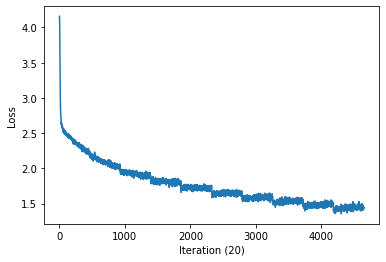

In [74]:
# applying CBOW to PTB data set
# hyperparameters
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10
GPU = False

# loading and preprocessing PTB data set
train, val, test = chainer.datasets.get_ptb_words()
corpus = train
word_to_id = chainer.datasets.get_ptb_words_vocabulary()
id_to_word = dict((j, i) for i, j in word_to_id.items())
vocab_size = len(word_to_id)

# We do not have to apply 'convert_one_hot' function to contexts and target
# since CBOW with embedding slices corresponding elements.
contexts, target = create_contexts_target(corpus, window_size)
if GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)
    
# Instantiate the model.
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# for context prediction: model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# Train!
trainer.training(contexts, target, max_epoch, batch_size)
trainer.plot()

In [75]:
import pickle

In [77]:
# Store the results.
word_vecs = model.word_vecs
if GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
pkl_file = 'cbow_params.pkl' # or 'skipgram_params.pkl'

with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

In [78]:
# the most similar
queries = ['you', 'year', 'car', 'toyota']
for query in queries:
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)


[query] you
 we: 0.7181655168533325
 i: 0.6698601841926575
 your: 0.5956120491027832
 someone: 0.5938897728919983
 they: 0.5928088426589966

[query] year
 month: 0.8708258271217346
 week: 0.7932916283607483
 summer: 0.7819835543632507
 spring: 0.7686749696731567
 decade: 0.7109283804893494

[query] car
 truck: 0.5933769941329956
 luxury: 0.5889250636100769
 auto: 0.5876015424728394
 cars: 0.5763909816741943
 window: 0.5611967444419861

[query] toyota
 engines: 0.6494000554084778
 honda: 0.6394382119178772
 seita: 0.6122733950614929
 motor: 0.5996487736701965
 mazda: 0.5867926478385925


In [91]:
class SkipGram:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        rn = np.random.randn
        
        # weights initialization
        W_in = 0.01 * rn(V, H).astype('f')
        # W_out will be used in terms of its transposed format
        # for users' convenience.
        W_out = 0.01 * rn(V, H).astype('f')
        
        # creating layers
        self.in_layer = Embedding(W_in)
        self.loss_layers = []
        for i in range(2 * window_size):
            layer = NegativeSamplingLoss(W_out, corpus, power = 0.75,
                                         sample_size = 5)
            self.loss_layers.append(layer)
        layers = [self.in_layer] + self.loss_layers
        
        # weights and gradients
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        # distributive representation
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        loss = 0
        for i, layer in enumerate(self.loss_layers):
            loss += layer.forward(h, contexts[:, i])
        
        return loss
    
    def backward(self, dout = 1):
        dh = 0
        for i, layer in enumerate(self.loss_layers):
            dh += layer.backward(dout)
        self.in_layer.backward(dh)
        
        return None

Epoch: 1
Iteration: 1 / 9295
Elapsed Time: 0.3727543354034424
Loss: 41.58870758056641
Epoch: 1
Iteration: 21 / 9295
Elapsed Time: 6.200075387954712
Loss: 41.58192136383057
Epoch: 1
Iteration: 41 / 9295
Elapsed Time: 11.875760316848755
Loss: 41.486245464324945
Epoch: 1
Iteration: 61 / 9295
Elapsed Time: 17.625560998916626
Loss: 41.036431350708014
Epoch: 1
Iteration: 81 / 9295
Elapsed Time: 23.343844413757324
Loss: 40.029532983779916
Epoch: 1
Iteration: 101 / 9295
Elapsed Time: 29.04262089729309
Loss: 38.532252893447875
Epoch: 1
Iteration: 121 / 9295
Elapsed Time: 34.76935601234436
Loss: 37.17359501457214
Epoch: 1
Iteration: 141 / 9295
Elapsed Time: 40.41028881072998
Loss: 35.59124552536011
Epoch: 1
Iteration: 161 / 9295
Elapsed Time: 46.157835483551025
Loss: 34.74254235839844
Epoch: 1
Iteration: 181 / 9295
Elapsed Time: 51.86701226234436
Loss: 33.757696426391604
Epoch: 1
Iteration: 201 / 9295
Elapsed Time: 57.55488133430481
Loss: 32.99903072166444
Epoch: 1
Iteration: 221 / 9295
Elapsed 

Epoch: 1
Iteration: 1861 / 9295
Elapsed Time: 525.6784868240356
Loss: 25.458918106079103
Epoch: 1
Iteration: 1881 / 9295
Elapsed Time: 531.2237253189087
Loss: 25.479007504940036
Epoch: 1
Iteration: 1901 / 9295
Elapsed Time: 536.7599895000458
Loss: 25.475977512359623
Epoch: 1
Iteration: 1921 / 9295
Elapsed Time: 542.2942383289337
Loss: 25.442576400279997
Epoch: 1
Iteration: 1941 / 9295
Elapsed Time: 547.8385200500488
Loss: 25.392237538337707
Epoch: 1
Iteration: 1961 / 9295
Elapsed Time: 553.3667652606964
Loss: 25.239114545345306
Epoch: 1
Iteration: 1981 / 9295
Elapsed Time: 558.9018409252167
Loss: 25.406792610645297
Epoch: 1
Iteration: 2001 / 9295
Elapsed Time: 564.4410879611969
Loss: 25.505828451156617
Epoch: 1
Iteration: 2021 / 9295
Elapsed Time: 569.9733371734619
Loss: 25.4162694568634
Epoch: 1
Iteration: 2041 / 9295
Elapsed Time: 575.5255959033966
Loss: 25.338872982501982
Epoch: 1
Iteration: 2061 / 9295
Elapsed Time: 581.0628550052643
Loss: 25.29522343254089
Epoch: 1
Iteration: 2081

Epoch: 1
Iteration: 3721 / 9295
Elapsed Time: 1039.5277259349823
Loss: 24.76572791194916
Epoch: 1
Iteration: 3741 / 9295
Elapsed Time: 1045.0279655456543
Loss: 24.709296683788303
Epoch: 1
Iteration: 3761 / 9295
Elapsed Time: 1050.542251110077
Loss: 24.634333550453185
Epoch: 1
Iteration: 3781 / 9295
Elapsed Time: 1056.0875988006592
Loss: 24.7297057466507
Epoch: 1
Iteration: 3801 / 9295
Elapsed Time: 1061.6098387241364
Loss: 24.728429667472835
Epoch: 1
Iteration: 3821 / 9295
Elapsed Time: 1067.1231486797333
Loss: 24.73516082763672
Epoch: 1
Iteration: 3841 / 9295
Elapsed Time: 1072.621408700943
Loss: 24.598862480640413
Epoch: 1
Iteration: 3861 / 9295
Elapsed Time: 1078.142661333084
Loss: 24.770749386787415
Epoch: 1
Iteration: 3881 / 9295
Elapsed Time: 1083.663906097412
Loss: 24.756863017082214
Epoch: 1
Iteration: 3901 / 9295
Elapsed Time: 1089.190322637558
Loss: 24.66111956214905
Epoch: 1
Iteration: 3921 / 9295
Elapsed Time: 1094.7025740146637
Loss: 24.711337985992433
Epoch: 1
Iteration: 

Epoch: 1
Iteration: 5561 / 9295
Elapsed Time: 1551.3297724723816
Loss: 24.38039951848984
Epoch: 1
Iteration: 5581 / 9295
Elapsed Time: 1556.9070529937744
Loss: 24.484946895599357
Epoch: 1
Iteration: 5601 / 9295
Elapsed Time: 1562.5083158016205
Loss: 24.5521482963562
Epoch: 1
Iteration: 5621 / 9295
Elapsed Time: 1568.0973234176636
Loss: 24.431155210494996
Epoch: 1
Iteration: 5641 / 9295
Elapsed Time: 1573.6875872612
Loss: 24.40999597454071
Epoch: 1
Iteration: 5661 / 9295
Elapsed Time: 1579.2613623142242
Loss: 24.359373051643377
Epoch: 1
Iteration: 5681 / 9295
Elapsed Time: 1584.8606193065643
Loss: 24.408076514720914
Epoch: 1
Iteration: 5701 / 9295
Elapsed Time: 1590.468906402588
Loss: 24.409851281166077
Epoch: 1
Iteration: 5721 / 9295
Elapsed Time: 1596.077185869217
Loss: 24.296027352809904
Epoch: 1
Iteration: 5741 / 9295
Elapsed Time: 1601.672455072403
Loss: 24.363328051090246
Epoch: 1
Iteration: 5761 / 9295
Elapsed Time: 1607.27557015419
Loss: 24.40992853069306
Epoch: 1
Iteration: 578

Epoch: 1
Iteration: 7401 / 9295
Elapsed Time: 2065.143265247345
Loss: 24.272003307342533
Epoch: 1
Iteration: 7421 / 9295
Elapsed Time: 2070.72252368927
Loss: 24.330364021778113
Epoch: 1
Iteration: 7441 / 9295
Elapsed Time: 2076.2878127098083
Loss: 24.238014671325683
Epoch: 1
Iteration: 7461 / 9295
Elapsed Time: 2081.8690536022186
Loss: 24.31392857265472
Epoch: 1
Iteration: 7481 / 9295
Elapsed Time: 2087.443261384964
Loss: 24.285465430259713
Epoch: 1
Iteration: 7501 / 9295
Elapsed Time: 2093.0155358314514
Loss: 24.17286702489853
Epoch: 1
Iteration: 7521 / 9295
Elapsed Time: 2098.5987968444824
Loss: 24.20745854997635
Epoch: 1
Iteration: 7541 / 9295
Elapsed Time: 2104.1630051136017
Loss: 24.20700954008102
Epoch: 1
Iteration: 7561 / 9295
Elapsed Time: 2109.727265357971
Loss: 24.3230841832161
Epoch: 1
Iteration: 7581 / 9295
Elapsed Time: 2115.3135318756104
Loss: 24.23291647720337
Epoch: 1
Iteration: 7601 / 9295
Elapsed Time: 2120.874790906906
Loss: 24.171450366020203
Epoch: 1
Iteration: 762

Epoch: 1
Iteration: 9241 / 9295
Elapsed Time: 2578.595807790756
Loss: 24.221766531467438
Epoch: 1
Iteration: 9261 / 9295
Elapsed Time: 2584.1530697345734
Loss: 24.26834595870972
Epoch: 1
Iteration: 9281 / 9295
Elapsed Time: 2589.730318069458
Loss: 24.07231634712219
Epoch: 2
Iteration: 1 / 9295
Elapsed Time: 2593.995284795761
Loss: 24.1612823677063
Epoch: 2
Iteration: 21 / 9295
Elapsed Time: 2599.6025655269623
Loss: 23.93693339014053
Epoch: 2
Iteration: 41 / 9295
Elapsed Time: 2605.2021808624268
Loss: 23.955796478748326
Epoch: 2
Iteration: 61 / 9295
Elapsed Time: 2610.7984483242035
Loss: 24.0147126083374
Epoch: 2
Iteration: 81 / 9295
Elapsed Time: 2616.4337780475616
Loss: 24.072455462932584
Epoch: 2
Iteration: 101 / 9295
Elapsed Time: 2622.0450525283813
Loss: 23.979573589324946
Epoch: 2
Iteration: 121 / 9295
Elapsed Time: 2627.6571695804596
Loss: 24.006782413482668
Epoch: 2
Iteration: 141 / 9295
Elapsed Time: 2633.233423233032
Loss: 24.05118812274933
Epoch: 2
Iteration: 161 / 9295
Elaps

Epoch: 2
Iteration: 1801 / 9295
Elapsed Time: 3097.9192686080933
Loss: 24.01621662139893
Epoch: 2
Iteration: 1821 / 9295
Elapsed Time: 3103.529541015625
Loss: 23.96497648859024
Epoch: 2
Iteration: 1841 / 9295
Elapsed Time: 3109.1167964935303
Loss: 24.04830691194535
Epoch: 2
Iteration: 1861 / 9295
Elapsed Time: 3114.7260694503784
Loss: 23.902155846118923
Epoch: 2
Iteration: 1881 / 9295
Elapsed Time: 3120.3403449058533
Loss: 23.861783046722415
Epoch: 2
Iteration: 1901 / 9295
Elapsed Time: 3125.955614566803
Loss: 23.870621310234064
Epoch: 2
Iteration: 1921 / 9295
Elapsed Time: 3131.5390441417694
Loss: 24.02174125385285
Epoch: 2
Iteration: 1941 / 9295
Elapsed Time: 3137.1323046684265
Loss: 23.930348726272584
Epoch: 2
Iteration: 1961 / 9295
Elapsed Time: 3142.742578983307
Loss: 23.973690891742713
Epoch: 2
Iteration: 1981 / 9295
Elapsed Time: 3148.338877439499
Loss: 23.931933652400968
Epoch: 2
Iteration: 2001 / 9295
Elapsed Time: 3153.9282484054565
Loss: 23.988837804317473
Epoch: 2
Iteration

Epoch: 2
Iteration: 3641 / 9295
Elapsed Time: 3611.5512261390686
Loss: 23.894808562755586
Epoch: 2
Iteration: 3661 / 9295
Elapsed Time: 3617.148252248764
Loss: 23.831106432437892
Epoch: 2
Iteration: 3681 / 9295
Elapsed Time: 3622.706514120102
Loss: 23.907394693374638
Epoch: 2
Iteration: 3701 / 9295
Elapsed Time: 3628.2797787189484
Loss: 23.987032071113582
Epoch: 2
Iteration: 3721 / 9295
Elapsed Time: 3633.8690464496613
Loss: 23.94547718858719
Epoch: 2
Iteration: 3741 / 9295
Elapsed Time: 3639.4341037273407
Loss: 23.937453815460206
Epoch: 2
Iteration: 3761 / 9295
Elapsed Time: 3644.9823644161224
Loss: 23.846396309852608
Epoch: 2
Iteration: 3781 / 9295
Elapsed Time: 3650.5206220149994
Loss: 23.939773334026334
Epoch: 2
Iteration: 3801 / 9295
Elapsed Time: 3656.0668790340424
Loss: 23.810725412368775
Epoch: 2
Iteration: 3821 / 9295
Elapsed Time: 3661.6132657527924
Loss: 23.864054005622865
Epoch: 2
Iteration: 3841 / 9295
Elapsed Time: 3667.147539615631
Loss: 23.897260365009313
Epoch: 2
Itera

Epoch: 2
Iteration: 5501 / 9295
Elapsed Time: 4127.563763618469
Loss: 23.690195668220518
Epoch: 2
Iteration: 5521 / 9295
Elapsed Time: 4133.106034755707
Loss: 23.727443221092223
Epoch: 2
Iteration: 5541 / 9295
Elapsed Time: 4138.6562922000885
Loss: 23.83981362104416
Epoch: 2
Iteration: 5561 / 9295
Elapsed Time: 4144.209673643112
Loss: 23.803930691719053
Epoch: 2
Iteration: 5581 / 9295
Elapsed Time: 4149.744804859161
Loss: 23.84011562156677
Epoch: 2
Iteration: 5601 / 9295
Elapsed Time: 4155.280054092407
Loss: 23.809150592327114
Epoch: 2
Iteration: 5621 / 9295
Elapsed Time: 4160.854107379913
Loss: 23.742146772861485
Epoch: 2
Iteration: 5641 / 9295
Elapsed Time: 4166.398357391357
Loss: 23.826037041187288
Epoch: 2
Iteration: 5661 / 9295
Elapsed Time: 4171.948615074158
Loss: 23.921951982975003
Epoch: 2
Iteration: 5681 / 9295
Elapsed Time: 4177.5438940525055
Loss: 23.829118998050692
Epoch: 2
Iteration: 5701 / 9295
Elapsed Time: 4183.108149290085
Loss: 23.849279212951654
Epoch: 2
Iteration: 5

Epoch: 2
Iteration: 7361 / 9295
Elapsed Time: 4645.74157166481
Loss: 23.68993987751007
Epoch: 2
Iteration: 7381 / 9295
Elapsed Time: 4651.30283331871
Loss: 23.781808918476102
Epoch: 2
Iteration: 7401 / 9295
Elapsed Time: 4656.91312122345
Loss: 23.743704460620883
Epoch: 2
Iteration: 7421 / 9295
Elapsed Time: 4662.482521057129
Loss: 23.793022093772883
Epoch: 2
Iteration: 7441 / 9295
Elapsed Time: 4668.050786733627
Loss: 23.702110103607176
Epoch: 2
Iteration: 7461 / 9295
Elapsed Time: 4673.596025943756
Loss: 23.957470041275023
Epoch: 2
Iteration: 7481 / 9295
Elapsed Time: 4679.1390335559845
Loss: 23.768504683494566
Epoch: 2
Iteration: 7501 / 9295
Elapsed Time: 4684.711298942566
Loss: 23.696266735076907
Epoch: 2
Iteration: 7521 / 9295
Elapsed Time: 4690.274563550949
Loss: 23.753836750984192
Epoch: 2
Iteration: 7541 / 9295
Elapsed Time: 4695.848845481873
Loss: 23.777214585304257
Epoch: 2
Iteration: 7561 / 9295
Elapsed Time: 4701.422093868256
Loss: 23.68077246236801
Epoch: 2
Iteration: 7581 

Epoch: 2
Iteration: 9221 / 9295
Elapsed Time: 5165.3623304367065
Loss: 23.679169002056124
Epoch: 2
Iteration: 9241 / 9295
Elapsed Time: 5170.893582582474
Loss: 23.636864561080934
Epoch: 2
Iteration: 9261 / 9295
Elapsed Time: 5176.449847459793
Loss: 23.704663990974428
Epoch: 2
Iteration: 9281 / 9295
Elapsed Time: 5181.9681005477905
Loss: 23.44558379650116
Epoch: 3
Iteration: 1 / 9295
Elapsed Time: 5186.214065551758
Loss: 23.580474112828576
Epoch: 3
Iteration: 21 / 9295
Elapsed Time: 5191.81436920166
Loss: 23.47187536430359
Epoch: 3
Iteration: 41 / 9295
Elapsed Time: 5197.423735380173
Loss: 23.485860285282136
Epoch: 3
Iteration: 61 / 9295
Elapsed Time: 5203.009989976883
Loss: 23.50202126121521
Epoch: 3
Iteration: 81 / 9295
Elapsed Time: 5208.5980179309845
Loss: 23.44241699028015
Epoch: 3
Iteration: 101 / 9295
Elapsed Time: 5214.199036121368
Loss: 23.440218877315523
Epoch: 3
Iteration: 121 / 9295
Elapsed Time: 5219.800307750702
Loss: 23.466564071178436
Epoch: 3
Iteration: 141 / 9295
Elaps

Epoch: 3
Iteration: 1801 / 9295
Elapsed Time: 5690.13471531868
Loss: 23.53089860105514
Epoch: 3
Iteration: 1821 / 9295
Elapsed Time: 5695.761985778809
Loss: 23.524804143428803
Epoch: 3
Iteration: 1841 / 9295
Elapsed Time: 5701.373272895813
Loss: 23.559827203273777
Epoch: 3
Iteration: 1861 / 9295
Elapsed Time: 5706.990550518036
Loss: 23.569466989040375
Epoch: 3
Iteration: 1881 / 9295
Elapsed Time: 5712.608838796616
Loss: 23.526096123218533
Epoch: 3
Iteration: 1901 / 9295
Elapsed Time: 5718.241114139557
Loss: 23.556326810836794
Epoch: 3
Iteration: 1921 / 9295
Elapsed Time: 5723.8353571891785
Loss: 23.44966159629822
Epoch: 3
Iteration: 1941 / 9295
Elapsed Time: 5729.446514368057
Loss: 23.459984455585477
Epoch: 3
Iteration: 1961 / 9295
Elapsed Time: 5735.068807840347
Loss: 23.558621603488923
Epoch: 3
Iteration: 1981 / 9295
Elapsed Time: 5740.690892934799
Loss: 23.49356950950623
Epoch: 3
Iteration: 2001 / 9295
Elapsed Time: 5746.2814354896545
Loss: 23.475760264396666
Epoch: 3
Iteration: 202

Epoch: 3
Iteration: 3661 / 9295
Elapsed Time: 6211.287608623505
Loss: 23.581257854938507
Epoch: 3
Iteration: 3681 / 9295
Elapsed Time: 6216.940877437592
Loss: 23.329402164936063
Epoch: 3
Iteration: 3701 / 9295
Elapsed Time: 6222.543165683746
Loss: 23.459829651355744
Epoch: 3
Iteration: 3721 / 9295
Elapsed Time: 6228.149993896484
Loss: 23.513833834648132
Epoch: 3
Iteration: 3741 / 9295
Elapsed Time: 6233.777250766754
Loss: 23.581212677478796
Epoch: 3
Iteration: 3761 / 9295
Elapsed Time: 6239.386516332626
Loss: 23.461153986454008
Epoch: 3
Iteration: 3781 / 9295
Elapsed Time: 6244.973856925964
Loss: 23.5656837644577
Epoch: 3
Iteration: 3801 / 9295
Elapsed Time: 6250.554105043411
Loss: 23.564307762622832
Epoch: 3
Iteration: 3821 / 9295
Elapsed Time: 6256.164688825607
Loss: 23.625534193038938
Epoch: 3
Iteration: 3841 / 9295
Elapsed Time: 6261.785945653915
Loss: 23.371670836925507
Epoch: 3
Iteration: 3861 / 9295
Elapsed Time: 6267.381228923798
Loss: 23.490265831947333
Epoch: 3
Iteration: 388

Epoch: 3
Iteration: 5521 / 9295
Elapsed Time: 6731.82928276062
Loss: 23.343235209941867
Epoch: 3
Iteration: 5541 / 9295
Elapsed Time: 6737.4165897369385
Loss: 23.487082642555233
Epoch: 3
Iteration: 5561 / 9295
Elapsed Time: 6743.010882616043
Loss: 23.461925375938414
Epoch: 3
Iteration: 5581 / 9295
Elapsed Time: 6748.610154390335
Loss: 23.409722760200502
Epoch: 3
Iteration: 5601 / 9295
Elapsed Time: 6754.193416118622
Loss: 23.557761226654055
Epoch: 3
Iteration: 5621 / 9295
Elapsed Time: 6759.788707971573
Loss: 23.566859267234804
Epoch: 3
Iteration: 5641 / 9295
Elapsed Time: 6765.387967824936
Loss: 23.468526334762572
Epoch: 3
Iteration: 5661 / 9295
Elapsed Time: 6770.985298156738
Loss: 23.61445380449295
Epoch: 3
Iteration: 5681 / 9295
Elapsed Time: 6776.580556869507
Loss: 23.516075625419617
Epoch: 3
Iteration: 5701 / 9295
Elapsed Time: 6782.167848587036
Loss: 23.608516320705412
Epoch: 3
Iteration: 5721 / 9295
Elapsed Time: 6787.753098011017
Loss: 23.56017489433289
Epoch: 3
Iteration: 574

Epoch: 3
Iteration: 7381 / 9295
Elapsed Time: 7252.836492061615
Loss: 23.441229548931123
Epoch: 3
Iteration: 7401 / 9295
Elapsed Time: 7258.438774585724
Loss: 23.503595217704774
Epoch: 3
Iteration: 7421 / 9295
Elapsed Time: 7264.029037237167
Loss: 23.564234616279602
Epoch: 3
Iteration: 7441 / 9295
Elapsed Time: 7269.632297754288
Loss: 23.445563224792473
Epoch: 3
Iteration: 7461 / 9295
Elapsed Time: 7275.211582660675
Loss: 23.542282590866087
Epoch: 3
Iteration: 7481 / 9295
Elapsed Time: 7280.86985039711
Loss: 23.567219683647156
Epoch: 3
Iteration: 7501 / 9295
Elapsed Time: 7286.4721302986145
Loss: 23.39943627929687
Epoch: 3
Iteration: 7521 / 9295
Elapsed Time: 7292.081413984299
Loss: 23.4299402256012
Epoch: 3
Iteration: 7541 / 9295
Elapsed Time: 7297.72767663002
Loss: 23.540180775642394
Epoch: 3
Iteration: 7561 / 9295
Elapsed Time: 7303.344970941544
Loss: 23.472823924541473
Epoch: 3
Iteration: 7581 / 9295
Elapsed Time: 7308.939236402512
Loss: 23.52247204875946
Epoch: 3
Iteration: 7601 /

Epoch: 3
Iteration: 9241 / 9295
Elapsed Time: 7773.765186309814
Loss: 23.458204946517945
Epoch: 3
Iteration: 9261 / 9295
Elapsed Time: 7779.379462003708
Loss: 23.454824199676512
Epoch: 3
Iteration: 9281 / 9295
Elapsed Time: 7784.968731164932
Loss: 23.462629801273344
Epoch: 4
Iteration: 1 / 9295
Elapsed Time: 7789.270811319351
Loss: 23.381362980524695
Epoch: 4
Iteration: 21 / 9295
Elapsed Time: 7794.795197248459
Loss: 23.13495705747604
Epoch: 4
Iteration: 41 / 9295
Elapsed Time: 7800.318463802338
Loss: 23.005843530654907
Epoch: 4
Iteration: 61 / 9295
Elapsed Time: 7805.854716539383
Loss: 23.122930653572084
Epoch: 4
Iteration: 81 / 9295
Elapsed Time: 7811.375960350037
Loss: 23.139546127319335
Epoch: 4
Iteration: 101 / 9295
Elapsed Time: 7816.907229185104
Loss: 23.087896711349494
Epoch: 4
Iteration: 121 / 9295
Elapsed Time: 7822.4414846897125
Loss: 23.279723489284514
Epoch: 4
Iteration: 141 / 9295
Elapsed Time: 7827.971752166748
Loss: 23.06567000055313
Epoch: 4
Iteration: 161 / 9295
Elaps

Epoch: 4
Iteration: 1821 / 9295
Elapsed Time: 8292.077071666718
Loss: 23.090099525451656
Epoch: 4
Iteration: 1841 / 9295
Elapsed Time: 8297.620325565338
Loss: 23.195772581100464
Epoch: 4
Iteration: 1861 / 9295
Elapsed Time: 8303.142748594284
Loss: 23.135669377326966
Epoch: 4
Iteration: 1881 / 9295
Elapsed Time: 8308.668863296509
Loss: 23.257679875850677
Epoch: 4
Iteration: 1901 / 9295
Elapsed Time: 8314.18912100792
Loss: 23.139658782958982
Epoch: 4
Iteration: 1921 / 9295
Elapsed Time: 8319.714364767075
Loss: 23.25360876750946
Epoch: 4
Iteration: 1941 / 9295
Elapsed Time: 8325.224618434906
Loss: 23.26116136264801
Epoch: 4
Iteration: 1961 / 9295
Elapsed Time: 8330.761776208878
Loss: 23.26754509973526
Epoch: 4
Iteration: 1981 / 9295
Elapsed Time: 8336.296030282974
Loss: 23.212647864818575
Epoch: 4
Iteration: 2001 / 9295
Elapsed Time: 8341.830294847488
Loss: 23.193502100467683
Epoch: 4
Iteration: 2021 / 9295
Elapsed Time: 8347.367560863495
Loss: 23.27037368154526
Epoch: 4
Iteration: 2041 /

Epoch: 4
Iteration: 3681 / 9295
Elapsed Time: 8805.859197616577
Loss: 23.36624413108826
Epoch: 4
Iteration: 3701 / 9295
Elapsed Time: 8811.386471748352
Loss: 23.269957597255704
Epoch: 4
Iteration: 3721 / 9295
Elapsed Time: 8816.920723199844
Loss: 23.290071152210235
Epoch: 4
Iteration: 3741 / 9295
Elapsed Time: 8822.458973169327
Loss: 23.245234385967258
Epoch: 4
Iteration: 3761 / 9295
Elapsed Time: 8827.994228363037
Loss: 23.131608653545385
Epoch: 4
Iteration: 3781 / 9295
Elapsed Time: 8833.517501115799
Loss: 23.24593195009232
Epoch: 4
Iteration: 3801 / 9295
Elapsed Time: 8839.038754940033
Loss: 23.282276583671567
Epoch: 4
Iteration: 3821 / 9295
Elapsed Time: 8844.5459856987
Loss: 23.158987231731412
Epoch: 4
Iteration: 3841 / 9295
Elapsed Time: 8850.097249269485
Loss: 23.216841546058657
Epoch: 4
Iteration: 3861 / 9295
Elapsed Time: 8855.671624183655
Loss: 23.16076182460785
Epoch: 4
Iteration: 3881 / 9295
Elapsed Time: 8861.206045389175
Loss: 23.18220370388031
Epoch: 4
Iteration: 3901 / 

Epoch: 4
Iteration: 5541 / 9295
Elapsed Time: 9323.771228313446
Loss: 23.19688963508606
Epoch: 4
Iteration: 5561 / 9295
Elapsed Time: 9329.303483247757
Loss: 23.279743648529056
Epoch: 4
Iteration: 5581 / 9295
Elapsed Time: 9334.836739063263
Loss: 23.327089982509612
Epoch: 4
Iteration: 5601 / 9295
Elapsed Time: 9340.38109922409
Loss: 23.22541343927383
Epoch: 4
Iteration: 5621 / 9295
Elapsed Time: 9345.911222696304
Loss: 23.179798421382905
Epoch: 4
Iteration: 5641 / 9295
Elapsed Time: 9351.433495044708
Loss: 23.390210146903993
Epoch: 4
Iteration: 5661 / 9295
Elapsed Time: 9356.971751451492
Loss: 23.300648934841156
Epoch: 4
Iteration: 5681 / 9295
Elapsed Time: 9362.485174179077
Loss: 23.277640314102175
Epoch: 4
Iteration: 5701 / 9295
Elapsed Time: 9368.003572702408
Loss: 23.223553419113163
Epoch: 4
Iteration: 5721 / 9295
Elapsed Time: 9373.532524347305
Loss: 23.30199636363983
Epoch: 4
Iteration: 5741 / 9295
Elapsed Time: 9379.056762695312
Loss: 23.311958081245415
Epoch: 4
Iteration: 5761 

Epoch: 4
Iteration: 7401 / 9295
Elapsed Time: 9838.202409982681
Loss: 23.318505400180822
Epoch: 4
Iteration: 7421 / 9295
Elapsed Time: 9843.719672679901
Loss: 23.23966502714157
Epoch: 4
Iteration: 7441 / 9295
Elapsed Time: 9849.280924081802
Loss: 23.378217681407932
Epoch: 4
Iteration: 7461 / 9295
Elapsed Time: 9854.826182842255
Loss: 23.37021972131729
Epoch: 4
Iteration: 7481 / 9295
Elapsed Time: 9860.34943985939
Loss: 23.324493041038515
Epoch: 4
Iteration: 7501 / 9295
Elapsed Time: 9865.891694307327
Loss: 23.18969980764389
Epoch: 4
Iteration: 7521 / 9295
Elapsed Time: 9871.409682750702
Loss: 23.207978940486907
Epoch: 4
Iteration: 7541 / 9295
Elapsed Time: 9876.931934833527
Loss: 23.20119325399399
Epoch: 4
Iteration: 7561 / 9295
Elapsed Time: 9882.459205150604
Loss: 23.24279935979843
Epoch: 4
Iteration: 7581 / 9295
Elapsed Time: 9887.982445716858
Loss: 23.235772413253784
Epoch: 4
Iteration: 7601 / 9295
Elapsed Time: 9893.507695436478
Loss: 23.310468639850615
Epoch: 4
Iteration: 7621 / 

Epoch: 4
Iteration: 9241 / 9295
Elapsed Time: 10350.00821185112
Loss: 23.27082025575638
Epoch: 4
Iteration: 9261 / 9295
Elapsed Time: 10355.611279964447
Loss: 23.363155758857722
Epoch: 4
Iteration: 9281 / 9295
Elapsed Time: 10361.210551261902
Loss: 23.17076419019699
Epoch: 5
Iteration: 1 / 9295
Elapsed Time: 10365.51454949379
Loss: 23.206596029917396
Epoch: 5
Iteration: 21 / 9295
Elapsed Time: 10371.089789867401
Loss: 23.060963177680968
Epoch: 5
Iteration: 41 / 9295
Elapsed Time: 10376.671078205109
Loss: 22.939194544792176
Epoch: 5
Iteration: 61 / 9295
Elapsed Time: 10382.248333215714
Loss: 22.903242259979248
Epoch: 5
Iteration: 81 / 9295
Elapsed Time: 10387.840609073639
Loss: 22.886045295238493
Epoch: 5
Iteration: 101 / 9295
Elapsed Time: 10393.42585682869
Loss: 22.83626586103439
Epoch: 5
Iteration: 121 / 9295
Elapsed Time: 10399.037141799927
Loss: 22.981202556610107
Epoch: 5
Iteration: 141 / 9295
Elapsed Time: 10404.634420156479
Loss: 22.791622933387757
Epoch: 5
Iteration: 161 / 9295

Epoch: 5
Iteration: 1801 / 9295
Elapsed Time: 10869.58091211319
Loss: 22.99519246912002
Epoch: 5
Iteration: 1821 / 9295
Elapsed Time: 10875.18608379364
Loss: 22.987093368053433
Epoch: 5
Iteration: 1841 / 9295
Elapsed Time: 10880.808357715607
Loss: 23.116663361072543
Epoch: 5
Iteration: 1861 / 9295
Elapsed Time: 10886.417612791061
Loss: 23.029609305381776
Epoch: 5
Iteration: 1881 / 9295
Elapsed Time: 10892.035972833633
Loss: 23.036950974464414
Epoch: 5
Iteration: 1901 / 9295
Elapsed Time: 10897.68530368805
Loss: 22.97442659282685
Epoch: 5
Iteration: 1921 / 9295
Elapsed Time: 10903.306626796722
Loss: 23.06027906656265
Epoch: 5
Iteration: 1941 / 9295
Elapsed Time: 10908.921881437302
Loss: 22.948549513816833
Epoch: 5
Iteration: 1961 / 9295
Elapsed Time: 10914.519167423248
Loss: 22.92881117153168
Epoch: 5
Iteration: 1981 / 9295
Elapsed Time: 10920.12945318222
Loss: 22.924051200866703
Epoch: 5
Iteration: 2001 / 9295
Elapsed Time: 10925.733783721924
Loss: 22.935510111331944
Epoch: 5
Iteration

Epoch: 5
Iteration: 3641 / 9295
Elapsed Time: 11385.3889169693
Loss: 23.01327033472061
Epoch: 5
Iteration: 3661 / 9295
Elapsed Time: 11390.985200166702
Loss: 23.059799065113076
Epoch: 5
Iteration: 3681 / 9295
Elapsed Time: 11396.590504646301
Loss: 23.103839578151707
Epoch: 5
Iteration: 3701 / 9295
Elapsed Time: 11402.205797433853
Loss: 22.94863928079605
Epoch: 5
Iteration: 3721 / 9295
Elapsed Time: 11407.806055545807
Loss: 23.147801473617555
Epoch: 5
Iteration: 3741 / 9295
Elapsed Time: 11413.407240629196
Loss: 23.082892500877385
Epoch: 5
Iteration: 3761 / 9295
Elapsed Time: 11419.03864622116
Loss: 22.958834223270415
Epoch: 5
Iteration: 3781 / 9295
Elapsed Time: 11424.630800247192
Loss: 23.045409940242774
Epoch: 5
Iteration: 3801 / 9295
Elapsed Time: 11430.247082710266
Loss: 22.932849886417387
Epoch: 5
Iteration: 3821 / 9295
Elapsed Time: 11435.849335193634
Loss: 23.084272934436797
Epoch: 5
Iteration: 3841 / 9295
Elapsed Time: 11441.451614141464
Loss: 22.91824665737152
Epoch: 5
Iterati

Epoch: 5
Iteration: 5481 / 9295
Elapsed Time: 11901.359016180038
Loss: 23.093904661655426
Epoch: 5
Iteration: 5501 / 9295
Elapsed Time: 11906.980286598206
Loss: 23.116963927268976
Epoch: 5
Iteration: 5521 / 9295
Elapsed Time: 11912.595580339432
Loss: 22.999310886859895
Epoch: 5
Iteration: 5541 / 9295
Elapsed Time: 11918.200392961502
Loss: 22.985992728710176
Epoch: 5
Iteration: 5561 / 9295
Elapsed Time: 11923.814648151398
Loss: 23.008853746414186
Epoch: 5
Iteration: 5581 / 9295
Elapsed Time: 11929.42092180252
Loss: 23.09043758392334
Epoch: 5
Iteration: 5601 / 9295
Elapsed Time: 11935.007181882858
Loss: 23.025409267425538
Epoch: 5
Iteration: 5621 / 9295
Elapsed Time: 11940.622469186783
Loss: 22.918667568206786
Epoch: 5
Iteration: 5641 / 9295
Elapsed Time: 11946.258272409439
Loss: 23.131597239971164
Epoch: 5
Iteration: 5661 / 9295
Elapsed Time: 11951.872541189194
Loss: 23.095702298641207
Epoch: 5
Iteration: 5681 / 9295
Elapsed Time: 11957.470799207687
Loss: 23.08368450832367
Epoch: 5
Iter

Epoch: 5
Iteration: 7321 / 9295
Elapsed Time: 12417.727696418762
Loss: 23.10317370510101
Epoch: 5
Iteration: 7341 / 9295
Elapsed Time: 12423.361978292465
Loss: 23.177942958831785
Epoch: 5
Iteration: 7361 / 9295
Elapsed Time: 12428.976115942001
Loss: 23.106697694301605
Epoch: 5
Iteration: 7381 / 9295
Elapsed Time: 12434.485357761383
Loss: 23.102117523193364
Epoch: 5
Iteration: 7401 / 9295
Elapsed Time: 12440.013612270355
Loss: 23.18845484161377
Epoch: 5
Iteration: 7421 / 9295
Elapsed Time: 12445.512863397598
Loss: 23.130534264564517
Epoch: 5
Iteration: 7441 / 9295
Elapsed Time: 12451.026122808456
Loss: 23.106964183330533
Epoch: 5
Iteration: 7461 / 9295
Elapsed Time: 12456.561387062073
Loss: 23.179242737770085
Epoch: 5
Iteration: 7481 / 9295
Elapsed Time: 12462.082638263702
Loss: 23.04158645629883
Epoch: 5
Iteration: 7501 / 9295
Elapsed Time: 12467.601892232895
Loss: 22.986125666618353
Epoch: 5
Iteration: 7521 / 9295
Elapsed Time: 12473.116176366806
Loss: 22.96844214677811
Epoch: 5
Itera

Epoch: 5
Iteration: 9161 / 9295
Elapsed Time: 12930.01411652565
Loss: 22.97253275728226
Epoch: 5
Iteration: 9181 / 9295
Elapsed Time: 12935.566389799118
Loss: 23.0667304520607
Epoch: 5
Iteration: 9201 / 9295
Elapsed Time: 12941.105665683746
Loss: 23.01959140920639
Epoch: 5
Iteration: 9221 / 9295
Elapsed Time: 12946.619896888733
Loss: 23.086829266071323
Epoch: 5
Iteration: 9241 / 9295
Elapsed Time: 12952.161177396774
Loss: 22.99612910461426
Epoch: 5
Iteration: 9261 / 9295
Elapsed Time: 12957.685442686081
Loss: 23.186862306118005
Epoch: 5
Iteration: 9281 / 9295
Elapsed Time: 12963.203688621521
Loss: 23.087357881069188
Epoch: 6
Iteration: 1 / 9295
Elapsed Time: 12967.449669122696
Loss: 23.089110878626503
Epoch: 6
Iteration: 21 / 9295
Elapsed Time: 12973.06491971016
Loss: 22.733499248981474
Epoch: 6
Iteration: 41 / 9295
Elapsed Time: 12978.701202392578
Loss: 22.769654383659365
Epoch: 6
Iteration: 61 / 9295
Elapsed Time: 12984.30450129509
Loss: 22.714982857227326
Epoch: 6
Iteration: 81 / 92

Epoch: 6
Iteration: 1721 / 9295
Elapsed Time: 13446.578126907349
Loss: 22.96896728038788
Epoch: 6
Iteration: 1741 / 9295
Elapsed Time: 13452.106395959854
Loss: 22.77467485904694
Epoch: 6
Iteration: 1761 / 9295
Elapsed Time: 13457.636703014374
Loss: 22.696148627281193
Epoch: 6
Iteration: 1781 / 9295
Elapsed Time: 13463.171959400177
Loss: 22.68404694604874
Epoch: 6
Iteration: 1801 / 9295
Elapsed Time: 13468.701195955276
Loss: 22.721973062515257
Epoch: 6
Iteration: 1821 / 9295
Elapsed Time: 13474.250481843948
Loss: 22.913481611251832
Epoch: 6
Iteration: 1841 / 9295
Elapsed Time: 13479.787744045258
Loss: 22.805706247329706
Epoch: 6
Iteration: 1861 / 9295
Elapsed Time: 13485.315920352936
Loss: 22.893471848011018
Epoch: 6
Iteration: 1881 / 9295
Elapsed Time: 13490.848188638687
Loss: 22.88962486600876
Epoch: 6
Iteration: 1901 / 9295
Elapsed Time: 13496.377423763275
Loss: 22.776998319149012
Epoch: 6
Iteration: 1921 / 9295
Elapsed Time: 13501.908680677414
Loss: 22.95218378639222
Epoch: 6
Iterat

Epoch: 6
Iteration: 3561 / 9295
Elapsed Time: 13960.572969436646
Loss: 22.810724676609034
Epoch: 6
Iteration: 3581 / 9295
Elapsed Time: 13966.177226305008
Loss: 22.88605945014954
Epoch: 6
Iteration: 3601 / 9295
Elapsed Time: 13971.791505813599
Loss: 22.91539337301254
Epoch: 6
Iteration: 3621 / 9295
Elapsed Time: 13977.397826194763
Loss: 22.885208120822906
Epoch: 6
Iteration: 3641 / 9295
Elapsed Time: 13982.996074914932
Loss: 22.794767387390138
Epoch: 6
Iteration: 3661 / 9295
Elapsed Time: 13988.596355438232
Loss: 22.83969035959244
Epoch: 6
Iteration: 3681 / 9295
Elapsed Time: 13994.19167971611
Loss: 22.86139762973786
Epoch: 6
Iteration: 3701 / 9295
Elapsed Time: 13999.807935476303
Loss: 22.89475229215622
Epoch: 6
Iteration: 3721 / 9295
Elapsed Time: 14005.436226129532
Loss: 22.979153171062467
Epoch: 6
Iteration: 3741 / 9295
Elapsed Time: 14011.069490671158
Loss: 22.89959233188629
Epoch: 6
Iteration: 3761 / 9295
Elapsed Time: 14016.714786529541
Loss: 22.851611861705777
Epoch: 6
Iteratio

Epoch: 6
Iteration: 5401 / 9295
Elapsed Time: 14476.916806697845
Loss: 23.034934739589687
Epoch: 6
Iteration: 5421 / 9295
Elapsed Time: 14482.53607583046
Loss: 22.90551234197617
Epoch: 6
Iteration: 5441 / 9295
Elapsed Time: 14488.15348124504
Loss: 22.89319578552246
Epoch: 6
Iteration: 5461 / 9295
Elapsed Time: 14493.770737886429
Loss: 22.869033473968507
Epoch: 6
Iteration: 5481 / 9295
Elapsed Time: 14499.409036159515
Loss: 22.93519927883148
Epoch: 6
Iteration: 5501 / 9295
Elapsed Time: 14505.008320331573
Loss: 22.743989779949192
Epoch: 6
Iteration: 5521 / 9295
Elapsed Time: 14510.621587514877
Loss: 23.037572413921357
Epoch: 6
Iteration: 5541 / 9295
Elapsed Time: 14516.242876291275
Loss: 23.014338464736937
Epoch: 6
Iteration: 5561 / 9295
Elapsed Time: 14521.844135284424
Loss: 23.049176716327672
Epoch: 6
Iteration: 5581 / 9295
Elapsed Time: 14527.45047903061
Loss: 22.853905729293825
Epoch: 6
Iteration: 5601 / 9295
Elapsed Time: 14533.048585414886
Loss: 22.989772937297822
Epoch: 6
Iterati

Epoch: 6
Iteration: 7241 / 9295
Elapsed Time: 14993.221341609955
Loss: 23.054931304931642
Epoch: 6
Iteration: 7261 / 9295
Elapsed Time: 14998.811630010605
Loss: 23.002398978710175
Epoch: 6
Iteration: 7281 / 9295
Elapsed Time: 15004.425904035568
Loss: 23.00684264373779
Epoch: 6
Iteration: 7301 / 9295
Elapsed Time: 15010.032163381577
Loss: 22.9858605055809
Epoch: 6
Iteration: 7321 / 9295
Elapsed Time: 15015.640440940857
Loss: 22.951738363265996
Epoch: 6
Iteration: 7341 / 9295
Elapsed Time: 15021.23653459549
Loss: 23.099611098766324
Epoch: 6
Iteration: 7361 / 9295
Elapsed Time: 15026.845822095871
Loss: 22.911748517036436
Epoch: 6
Iteration: 7381 / 9295
Elapsed Time: 15032.447086572647
Loss: 22.970410856723788
Epoch: 6
Iteration: 7401 / 9295
Elapsed Time: 15038.044346570969
Loss: 22.917981760978698
Epoch: 6
Iteration: 7421 / 9295
Elapsed Time: 15043.649618387222
Loss: 22.95985516309738
Epoch: 6
Iteration: 7441 / 9295
Elapsed Time: 15049.254914045334
Loss: 23.026064998626712
Epoch: 6
Iterat

Epoch: 6
Iteration: 9081 / 9295
Elapsed Time: 15509.061349153519
Loss: 22.834246894359588
Epoch: 6
Iteration: 9101 / 9295
Elapsed Time: 15514.649538516998
Loss: 22.855653451919558
Epoch: 6
Iteration: 9121 / 9295
Elapsed Time: 15520.252741336823
Loss: 22.964603806018836
Epoch: 6
Iteration: 9141 / 9295
Elapsed Time: 15525.841001987457
Loss: 23.033462559223175
Epoch: 6
Iteration: 9161 / 9295
Elapsed Time: 15531.434271335602
Loss: 22.98733369731903
Epoch: 6
Iteration: 9181 / 9295
Elapsed Time: 15537.01653289795
Loss: 23.027009509563445
Epoch: 6
Iteration: 9201 / 9295
Elapsed Time: 15542.625805854797
Loss: 22.876880478858947
Epoch: 6
Iteration: 9221 / 9295
Elapsed Time: 15548.245092391968
Loss: 22.857244798183444
Epoch: 6
Iteration: 9241 / 9295
Elapsed Time: 15553.90337061882
Loss: 23.071032866954802
Epoch: 6
Iteration: 9261 / 9295
Elapsed Time: 15559.591777324677
Loss: 22.930865938186646
Epoch: 6
Iteration: 9281 / 9295
Elapsed Time: 15565.216059446335
Loss: 22.971409893989566
Epoch: 7
Iter

Epoch: 7
Iteration: 1641 / 9295
Elapsed Time: 16029.420459270477
Loss: 22.58839424610138
Epoch: 7
Iteration: 1661 / 9295
Elapsed Time: 16035.021718740463
Loss: 22.56476393318176
Epoch: 7
Iteration: 1681 / 9295
Elapsed Time: 16040.621709823608
Loss: 22.73410677289963
Epoch: 7
Iteration: 1701 / 9295
Elapsed Time: 16046.223993778229
Loss: 22.823080520153045
Epoch: 7
Iteration: 1721 / 9295
Elapsed Time: 16051.81826376915
Loss: 22.8492840051651
Epoch: 7
Iteration: 1741 / 9295
Elapsed Time: 16057.446541547775
Loss: 22.595537803649904
Epoch: 7
Iteration: 1761 / 9295
Elapsed Time: 16063.056802272797
Loss: 22.645183717727665
Epoch: 7
Iteration: 1781 / 9295
Elapsed Time: 16068.645136356354
Loss: 22.704076051712033
Epoch: 7
Iteration: 1801 / 9295
Elapsed Time: 16074.246420145035
Loss: 22.75204444408417
Epoch: 7
Iteration: 1821 / 9295
Elapsed Time: 16079.833668231964
Loss: 22.83873443555832
Epoch: 7
Iteration: 1841 / 9295
Elapsed Time: 16085.437956571579
Loss: 22.72086524772644
Epoch: 7
Iteration:

Epoch: 7
Iteration: 3481 / 9295
Elapsed Time: 16542.474728822708
Loss: 22.83490788650513
Epoch: 7
Iteration: 3501 / 9295
Elapsed Time: 16548.05898952484
Loss: 22.799568960189816
Epoch: 7
Iteration: 3521 / 9295
Elapsed Time: 16553.612263202667
Loss: 22.734560540199276
Epoch: 7
Iteration: 3541 / 9295
Elapsed Time: 16559.188533067703
Loss: 22.84430489301682
Epoch: 7
Iteration: 3561 / 9295
Elapsed Time: 16564.76081943512
Loss: 22.807120451927183
Epoch: 7
Iteration: 3581 / 9295
Elapsed Time: 16570.343087911606
Loss: 22.78925632762909
Epoch: 7
Iteration: 3601 / 9295
Elapsed Time: 16575.93935608864
Loss: 22.77575962257385
Epoch: 7
Iteration: 3621 / 9295
Elapsed Time: 16581.523612976074
Loss: 22.77749416780472
Epoch: 7
Iteration: 3641 / 9295
Elapsed Time: 16587.109896421432
Loss: 22.787245725631713
Epoch: 7
Iteration: 3661 / 9295
Elapsed Time: 16592.699165821075
Loss: 22.589608706951147
Epoch: 7
Iteration: 3681 / 9295
Elapsed Time: 16598.302434444427
Loss: 22.964582403659826
Epoch: 7
Iteration

Epoch: 7
Iteration: 5321 / 9295
Elapsed Time: 17058.473114728928
Loss: 22.78816424655914
Epoch: 7
Iteration: 5341 / 9295
Elapsed Time: 17064.08938908577
Loss: 22.82304212141037
Epoch: 7
Iteration: 5361 / 9295
Elapsed Time: 17069.706663370132
Loss: 22.94867859411239
Epoch: 7
Iteration: 5381 / 9295
Elapsed Time: 17075.328939437866
Loss: 22.681494965076446
Epoch: 7
Iteration: 5401 / 9295
Elapsed Time: 17080.928215503693
Loss: 22.819056988716127
Epoch: 7
Iteration: 5421 / 9295
Elapsed Time: 17086.53848028183
Loss: 22.814137000083925
Epoch: 7
Iteration: 5441 / 9295
Elapsed Time: 17092.16676259041
Loss: 22.864199714183805
Epoch: 7
Iteration: 5461 / 9295
Elapsed Time: 17097.7710416317
Loss: 22.836603889942165
Epoch: 7
Iteration: 5481 / 9295
Elapsed Time: 17103.37030005455
Loss: 22.79128380060196
Epoch: 7
Iteration: 5501 / 9295
Elapsed Time: 17108.99158191681
Loss: 22.769499845981592
Epoch: 7
Iteration: 5521 / 9295
Elapsed Time: 17114.589834690094
Loss: 22.825648416042334
Epoch: 7
Iteration: 5

Epoch: 7
Iteration: 7161 / 9295
Elapsed Time: 17574.682453155518
Loss: 22.81538295269013
Epoch: 7
Iteration: 7181 / 9295
Elapsed Time: 17580.296726465225
Loss: 22.873317479610442
Epoch: 7
Iteration: 7201 / 9295
Elapsed Time: 17585.91699028015
Loss: 22.76211096572876
Epoch: 7
Iteration: 7221 / 9295
Elapsed Time: 17591.522042751312
Loss: 22.864457953929904
Epoch: 7
Iteration: 7241 / 9295
Elapsed Time: 17597.133306741714
Loss: 22.90425708580017
Epoch: 7
Iteration: 7261 / 9295
Elapsed Time: 17602.724594593048
Loss: 23.120068115234382
Epoch: 7
Iteration: 7281 / 9295
Elapsed Time: 17608.328866243362
Loss: 22.89572013568878
Epoch: 7
Iteration: 7301 / 9295
Elapsed Time: 17613.93211865425
Loss: 22.8345443778038
Epoch: 7
Iteration: 7321 / 9295
Elapsed Time: 17619.56042432785
Loss: 22.950791704177856
Epoch: 7
Iteration: 7341 / 9295
Elapsed Time: 17625.17840695381
Loss: 22.97247131729126
Epoch: 7
Iteration: 7361 / 9295
Elapsed Time: 17630.806676387787
Loss: 22.9354975771904
Epoch: 7
Iteration: 738

Epoch: 7
Iteration: 9001 / 9295
Elapsed Time: 18091.099524259567
Loss: 22.907711227893827
Epoch: 7
Iteration: 9021 / 9295
Elapsed Time: 18096.766809940338
Loss: 22.876797596454622
Epoch: 7
Iteration: 9041 / 9295
Elapsed Time: 18102.380071640015
Loss: 22.87249314165115
Epoch: 7
Iteration: 9061 / 9295
Elapsed Time: 18107.99534869194
Loss: 22.915305909156796
Epoch: 7
Iteration: 9081 / 9295
Elapsed Time: 18113.60262656212
Loss: 22.933978607654574
Epoch: 7
Iteration: 9101 / 9295
Elapsed Time: 18119.209908008575
Loss: 22.840590676784515
Epoch: 7
Iteration: 9121 / 9295
Elapsed Time: 18124.843173265457
Loss: 22.8842733540535
Epoch: 7
Iteration: 9141 / 9295
Elapsed Time: 18130.456449508667
Loss: 22.96191239547729
Epoch: 7
Iteration: 9161 / 9295
Elapsed Time: 18136.0667450428
Loss: 22.899444427013396
Epoch: 7
Iteration: 9181 / 9295
Elapsed Time: 18141.67601466179
Loss: 22.881162076473238
Epoch: 7
Iteration: 9201 / 9295
Elapsed Time: 18147.29827260971
Loss: 22.933691598892214
Epoch: 7
Iteration: 

Epoch: 8
Iteration: 1561 / 9295
Elapsed Time: 32646.586606264114
Loss: 22.727649576663968
Epoch: 8
Iteration: 1581 / 9295
Elapsed Time: 32652.45282268524
Loss: 22.572120149135593
Epoch: 8
Iteration: 1601 / 9295
Elapsed Time: 32658.549267053604
Loss: 22.49378987503051
Epoch: 8
Iteration: 1621 / 9295
Elapsed Time: 32664.271615982056
Loss: 22.66446074581146
Epoch: 8
Iteration: 1641 / 9295
Elapsed Time: 32669.883502960205
Loss: 22.659920211315153
Epoch: 8
Iteration: 1661 / 9295
Elapsed Time: 32675.47893691063
Loss: 22.514147825717927
Epoch: 8
Iteration: 1681 / 9295
Elapsed Time: 32681.073807001114
Loss: 22.718468820571893
Epoch: 8
Iteration: 1701 / 9295
Elapsed Time: 32686.889497995377
Loss: 22.61932030677795
Epoch: 8
Iteration: 1721 / 9295
Elapsed Time: 32692.506111621857
Loss: 22.49431699085236
Epoch: 8
Iteration: 1741 / 9295
Elapsed Time: 32698.072909355164
Loss: 22.471414583683014
Epoch: 8
Iteration: 1761 / 9295
Elapsed Time: 32703.61662888527
Loss: 22.571214536190034
Epoch: 8
Iteratio

Epoch: 8
Iteration: 3421 / 9295
Elapsed Time: 33168.95591568947
Loss: 22.65916422080993
Epoch: 8
Iteration: 3441 / 9295
Elapsed Time: 33174.583891153336
Loss: 22.762927558422085
Epoch: 8
Iteration: 3461 / 9295
Elapsed Time: 33180.24743294716
Loss: 22.708530974388122
Epoch: 8
Iteration: 3481 / 9295
Elapsed Time: 33185.87145495415
Loss: 22.55700733709335
Epoch: 8
Iteration: 3501 / 9295
Elapsed Time: 33191.40682029724
Loss: 22.612439122676854
Epoch: 8
Iteration: 3521 / 9295
Elapsed Time: 33196.949919223785
Loss: 22.766658081531524
Epoch: 8
Iteration: 3541 / 9295
Elapsed Time: 33202.59474825859
Loss: 22.609817052364356
Epoch: 8
Iteration: 3561 / 9295
Elapsed Time: 33208.14844274521
Loss: 22.55303420066834
Epoch: 8
Iteration: 3581 / 9295
Elapsed Time: 33213.73386526108
Loss: 22.654668676376343
Epoch: 8
Iteration: 3601 / 9295
Elapsed Time: 33219.278950214386
Loss: 22.783515511512753
Epoch: 8
Iteration: 3621 / 9295
Elapsed Time: 33224.87717938423
Loss: 22.698366419792173
Epoch: 8
Iteration: 3

Epoch: 8
Iteration: 5281 / 9295
Elapsed Time: 33687.2410902977
Loss: 22.72792165470123
Epoch: 8
Iteration: 5301 / 9295
Elapsed Time: 33692.81589388847
Loss: 22.74963046836853
Epoch: 8
Iteration: 5321 / 9295
Elapsed Time: 33698.384570360184
Loss: 22.693986674785613
Epoch: 8
Iteration: 5341 / 9295
Elapsed Time: 33703.929723501205
Loss: 22.793695083141333
Epoch: 8
Iteration: 5361 / 9295
Elapsed Time: 33709.47393655777
Loss: 22.864813718795773
Epoch: 8
Iteration: 5381 / 9295
Elapsed Time: 33715.02897334099
Loss: 22.62628412151337
Epoch: 8
Iteration: 5401 / 9295
Elapsed Time: 33720.591933488846
Loss: 22.714721776485444
Epoch: 8
Iteration: 5421 / 9295
Elapsed Time: 33726.13124704361
Loss: 22.77706515645981
Epoch: 8
Iteration: 5441 / 9295
Elapsed Time: 33731.6878182888
Loss: 22.61880118751526
Epoch: 8
Iteration: 5461 / 9295
Elapsed Time: 33737.251604795456
Loss: 22.656222239971164
Epoch: 8
Iteration: 5481 / 9295
Elapsed Time: 33742.83371639252
Loss: 22.741679910182956
Epoch: 8
Iteration: 5501

Epoch: 8
Iteration: 7141 / 9295
Elapsed Time: 34202.804059267044
Loss: 22.632559896945953
Epoch: 8
Iteration: 7161 / 9295
Elapsed Time: 34208.29900431633
Loss: 22.743032329082485
Epoch: 8
Iteration: 7181 / 9295
Elapsed Time: 34213.80649495125
Loss: 22.835362657070156
Epoch: 8
Iteration: 7201 / 9295
Elapsed Time: 34219.34486889839
Loss: 22.85944347858429
Epoch: 8
Iteration: 7221 / 9295
Elapsed Time: 34225.00370430946
Loss: 22.66450242090225
Epoch: 8
Iteration: 7241 / 9295
Elapsed Time: 34230.51638627052
Loss: 22.51427893257141
Epoch: 8
Iteration: 7261 / 9295
Elapsed Time: 34236.014676332474
Loss: 22.892340997219087
Epoch: 8
Iteration: 7281 / 9295
Elapsed Time: 34241.49726128578
Loss: 22.902446897029876
Epoch: 8
Iteration: 7301 / 9295
Elapsed Time: 34247.11050915718
Loss: 22.824277567863465
Epoch: 8
Iteration: 7321 / 9295
Elapsed Time: 34252.671489715576
Loss: 22.78883308649063
Epoch: 8
Iteration: 7341 / 9295
Elapsed Time: 34258.15683603287
Loss: 22.703887214660643
Epoch: 8
Iteration: 73

Epoch: 8
Iteration: 9001 / 9295
Elapsed Time: 34716.96572637558
Loss: 22.73195945739746
Epoch: 8
Iteration: 9021 / 9295
Elapsed Time: 34722.47396445274
Loss: 22.742076899051664
Epoch: 8
Iteration: 9041 / 9295
Elapsed Time: 34727.966220617294
Loss: 22.755043344497683
Epoch: 8
Iteration: 9061 / 9295
Elapsed Time: 34733.461455345154
Loss: 22.867686356067654
Epoch: 8
Iteration: 9081 / 9295
Elapsed Time: 34738.95673942566
Loss: 22.88213013410568
Epoch: 8
Iteration: 9101 / 9295
Elapsed Time: 34744.44899272919
Loss: 22.95430064201355
Epoch: 8
Iteration: 9121 / 9295
Elapsed Time: 34749.93627023697
Loss: 22.648565014362337
Epoch: 8
Iteration: 9141 / 9295
Elapsed Time: 34755.42651939392
Loss: 22.825869478225705
Epoch: 8
Iteration: 9161 / 9295
Elapsed Time: 34760.924788951874
Loss: 22.799805645465845
Epoch: 8
Iteration: 9181 / 9295
Elapsed Time: 34766.43203806877
Loss: 22.83000901317597
Epoch: 8
Iteration: 9201 / 9295
Elapsed Time: 34771.94430422783
Loss: 22.86762631893158
Epoch: 8
Iteration: 922

Epoch: 9
Iteration: 1561 / 9295
Elapsed Time: 35227.53358387947
Loss: 22.557295951366427
Epoch: 9
Iteration: 1581 / 9295
Elapsed Time: 35233.01394534111
Loss: 22.46404699802398
Epoch: 9
Iteration: 1601 / 9295
Elapsed Time: 35238.517198085785
Loss: 22.5022672662735
Epoch: 9
Iteration: 1621 / 9295
Elapsed Time: 35244.0194542408
Loss: 22.516569142818458
Epoch: 9
Iteration: 1641 / 9295
Elapsed Time: 35249.51770567894
Loss: 22.482240027427675
Epoch: 9
Iteration: 1661 / 9295
Elapsed Time: 35255.2820148468
Loss: 22.490617540836332
Epoch: 9
Iteration: 1681 / 9295
Elapsed Time: 35260.808310985565
Loss: 22.518405983448027
Epoch: 9
Iteration: 1701 / 9295
Elapsed Time: 35266.29554772377
Loss: 22.646208722114565
Epoch: 9
Iteration: 1721 / 9295
Elapsed Time: 35271.797827243805
Loss: 22.595898940086364
Epoch: 9
Iteration: 1741 / 9295
Elapsed Time: 35277.30107784271
Loss: 22.466187978267666
Epoch: 9
Iteration: 1761 / 9295
Elapsed Time: 35282.81234955788
Loss: 22.46680380868912
Epoch: 9
Iteration: 1781

Epoch: 9
Iteration: 3421 / 9295
Elapsed Time: 35739.593378305435
Loss: 22.67152314424515
Epoch: 9
Iteration: 3441 / 9295
Elapsed Time: 35745.10162734985
Loss: 22.433909876346586
Epoch: 9
Iteration: 3461 / 9295
Elapsed Time: 35750.60167956352
Loss: 22.6579596657753
Epoch: 9
Iteration: 3481 / 9295
Elapsed Time: 35756.106929540634
Loss: 22.633771574974055
Epoch: 9
Iteration: 3501 / 9295
Elapsed Time: 35761.608217954636
Loss: 22.53275914716721
Epoch: 9
Iteration: 3521 / 9295
Elapsed Time: 35767.12247657776
Loss: 22.612618031024933
Epoch: 9
Iteration: 3541 / 9295
Elapsed Time: 35772.61172103882
Loss: 22.69771203947067
Epoch: 9
Iteration: 3561 / 9295
Elapsed Time: 35778.107128858566
Loss: 22.612440295696256
Epoch: 9
Iteration: 3581 / 9295
Elapsed Time: 35783.60920166969
Loss: 22.754142182350158
Epoch: 9
Iteration: 3601 / 9295
Elapsed Time: 35789.10345244408
Loss: 22.459698026180263
Epoch: 9
Iteration: 3621 / 9295
Elapsed Time: 35794.600712776184
Loss: 22.599184466838835
Epoch: 9
Iteration: 3

Epoch: 9
Iteration: 5281 / 9295
Elapsed Time: 36251.50941514969
Loss: 22.668512332439427
Epoch: 9
Iteration: 5301 / 9295
Elapsed Time: 36257.00972247124
Loss: 22.578740457057954
Epoch: 9
Iteration: 5321 / 9295
Elapsed Time: 36262.51391482353
Loss: 22.677312047958377
Epoch: 9
Iteration: 5341 / 9295
Elapsed Time: 36268.01619362831
Loss: 22.419542964935307
Epoch: 9
Iteration: 5361 / 9295
Elapsed Time: 36273.5056540966
Loss: 22.541218008041376
Epoch: 9
Iteration: 5381 / 9295
Elapsed Time: 36278.99905371666
Loss: 22.74325477695465
Epoch: 9
Iteration: 5401 / 9295
Elapsed Time: 36284.49429655075
Loss: 22.57100917959213
Epoch: 9
Iteration: 5421 / 9295
Elapsed Time: 36289.99456191063
Loss: 22.460050276756284
Epoch: 9
Iteration: 5441 / 9295
Elapsed Time: 36295.49239754677
Loss: 22.686482049465184
Epoch: 9
Iteration: 5461 / 9295
Elapsed Time: 36300.993646621704
Loss: 22.831459280490872
Epoch: 9
Iteration: 5481 / 9295
Elapsed Time: 36306.502474308014
Loss: 22.644484322547918
Epoch: 9
Iteration: 55

Epoch: 9
Iteration: 7141 / 9295
Elapsed Time: 36763.17623782158
Loss: 22.69683080291748
Epoch: 9
Iteration: 7161 / 9295
Elapsed Time: 36768.68551969528
Loss: 22.671963107585917
Epoch: 9
Iteration: 7181 / 9295
Elapsed Time: 36774.17976784706
Loss: 22.83218580055237
Epoch: 9
Iteration: 7201 / 9295
Elapsed Time: 36779.67801308632
Loss: 22.646401849269868
Epoch: 9
Iteration: 7221 / 9295
Elapsed Time: 36785.162291526794
Loss: 22.700859721660617
Epoch: 9
Iteration: 7241 / 9295
Elapsed Time: 36790.67654776573
Loss: 22.759821693420413
Epoch: 9
Iteration: 7261 / 9295
Elapsed Time: 36796.182824373245
Loss: 22.72087792730332
Epoch: 9
Iteration: 7281 / 9295
Elapsed Time: 36801.67106580734
Loss: 22.595661107063297
Epoch: 9
Iteration: 7301 / 9295
Elapsed Time: 36807.19502520561
Loss: 22.67727327442169
Epoch: 9
Iteration: 7321 / 9295
Elapsed Time: 36812.73229384422
Loss: 22.698886511802673
Epoch: 9
Iteration: 7341 / 9295
Elapsed Time: 36818.263536691666
Loss: 22.74653022384643
Epoch: 9
Iteration: 736

Epoch: 9
Iteration: 9001 / 9295
Elapsed Time: 37277.30133605003
Loss: 22.850839713573457
Epoch: 9
Iteration: 9021 / 9295
Elapsed Time: 37282.849844932556
Loss: 22.869098148345945
Epoch: 9
Iteration: 9041 / 9295
Elapsed Time: 37288.37566971779
Loss: 22.72399110603332
Epoch: 9
Iteration: 9061 / 9295
Elapsed Time: 37293.938732624054
Loss: 22.634899225711823
Epoch: 9
Iteration: 9081 / 9295
Elapsed Time: 37299.462057590485
Loss: 22.790393250465385
Epoch: 9
Iteration: 9101 / 9295
Elapsed Time: 37305.0386967659
Loss: 22.66674355316163
Epoch: 9
Iteration: 9121 / 9295
Elapsed Time: 37310.57089495659
Loss: 22.811391846179962
Epoch: 9
Iteration: 9141 / 9295
Elapsed Time: 37316.122925281525
Loss: 22.784589061260224
Epoch: 9
Iteration: 9161 / 9295
Elapsed Time: 37321.65619325638
Loss: 22.72711917448044
Epoch: 9
Iteration: 9181 / 9295
Elapsed Time: 37327.17789053917
Loss: 22.740067358016965
Epoch: 9
Iteration: 9201 / 9295
Elapsed Time: 37332.71841907501
Loss: 22.73042496967316
Epoch: 9
Iteration: 92

Epoch: 10
Iteration: 1561 / 9295
Elapsed Time: 37789.10414814949
Loss: 22.49608046579361
Epoch: 10
Iteration: 1581 / 9295
Elapsed Time: 37794.71169948578
Loss: 22.47603902721405
Epoch: 10
Iteration: 1601 / 9295
Elapsed Time: 37800.258419275284
Loss: 22.545597882270815
Epoch: 10
Iteration: 1621 / 9295
Elapsed Time: 37805.93146324158
Loss: 22.365346346378324
Epoch: 10
Iteration: 1641 / 9295
Elapsed Time: 37811.577342271805
Loss: 22.448335764408117
Epoch: 10
Iteration: 1661 / 9295
Elapsed Time: 37817.241812705994
Loss: 22.464710131168367
Epoch: 10
Iteration: 1681 / 9295
Elapsed Time: 37822.74233675003
Loss: 22.603948660850527
Epoch: 10
Iteration: 1701 / 9295
Elapsed Time: 37828.299808740616
Loss: 22.467649354934697
Epoch: 10
Iteration: 1721 / 9295
Elapsed Time: 37833.822444200516
Loss: 22.417636358261106
Epoch: 10
Iteration: 1741 / 9295
Elapsed Time: 37839.35045695305
Loss: 22.40670677804947
Epoch: 10
Iteration: 1761 / 9295
Elapsed Time: 37844.87943840027
Loss: 22.575132821083074
Epoch: 1

Epoch: 10
Iteration: 3401 / 9295
Elapsed Time: 38296.11093878746
Loss: 22.610061584949495
Epoch: 10
Iteration: 3421 / 9295
Elapsed Time: 38301.63650512695
Loss: 22.481667998313903
Epoch: 10
Iteration: 3441 / 9295
Elapsed Time: 38307.15558671951
Loss: 22.450449871540066
Epoch: 10
Iteration: 3461 / 9295
Elapsed Time: 38312.66315627098
Loss: 22.500877400398252
Epoch: 10
Iteration: 3481 / 9295
Elapsed Time: 38318.26990222931
Loss: 22.546454370021824
Epoch: 10
Iteration: 3501 / 9295
Elapsed Time: 38323.84628081322
Loss: 22.50107777214051
Epoch: 10
Iteration: 3521 / 9295
Elapsed Time: 38329.42443609238
Loss: 22.62210185718536
Epoch: 10
Iteration: 3541 / 9295
Elapsed Time: 38334.97792673111
Loss: 22.510679711341858
Epoch: 10
Iteration: 3561 / 9295
Elapsed Time: 38340.55655479431
Loss: 22.64788533830643
Epoch: 10
Iteration: 3581 / 9295
Elapsed Time: 38346.1208627224
Loss: 22.60970271348953
Epoch: 10
Iteration: 3601 / 9295
Elapsed Time: 38351.59704518318
Loss: 22.658411028385167
Epoch: 10
Itera

Epoch: 10
Iteration: 5241 / 9295
Elapsed Time: 38810.51831698418
Loss: 22.601062328338617
Epoch: 10
Iteration: 5261 / 9295
Elapsed Time: 38816.13890194893
Loss: 22.6323436794281
Epoch: 10
Iteration: 5281 / 9295
Elapsed Time: 38821.7666618824
Loss: 22.543538011074062
Epoch: 10
Iteration: 5301 / 9295
Elapsed Time: 38827.25310969353
Loss: 22.646711224555965
Epoch: 10
Iteration: 5321 / 9295
Elapsed Time: 38832.73578166962
Loss: 22.601245401382442
Epoch: 10
Iteration: 5341 / 9295
Elapsed Time: 38838.233944654465
Loss: 22.461952468395232
Epoch: 10
Iteration: 5361 / 9295
Elapsed Time: 38843.729969501495
Loss: 22.77980282354355
Epoch: 10
Iteration: 5381 / 9295
Elapsed Time: 38849.24654173851
Loss: 22.68639805030822
Epoch: 10
Iteration: 5401 / 9295
Elapsed Time: 38854.74952864647
Loss: 22.610017128944392
Epoch: 10
Iteration: 5421 / 9295
Elapsed Time: 38860.246473789215
Loss: 22.593888589382168
Epoch: 10
Iteration: 5441 / 9295
Elapsed Time: 38865.75779008865
Loss: 22.617091639041895
Epoch: 10
It

Epoch: 10
Iteration: 7081 / 9295
Elapsed Time: 39312.02020120621
Loss: 22.778494510173793
Epoch: 10
Iteration: 7101 / 9295
Elapsed Time: 39317.45842576027
Loss: 22.569211678028104
Epoch: 10
Iteration: 7121 / 9295
Elapsed Time: 39322.882662534714
Loss: 22.640174227714535
Epoch: 10
Iteration: 7141 / 9295
Elapsed Time: 39328.308886766434
Loss: 22.51661842727661
Epoch: 10
Iteration: 7161 / 9295
Elapsed Time: 39333.73213100433
Loss: 22.499502378940576
Epoch: 10
Iteration: 7181 / 9295
Elapsed Time: 39339.160358428955
Loss: 22.76355518960953
Epoch: 10
Iteration: 7201 / 9295
Elapsed Time: 39344.59691500664
Loss: 22.600868557929992
Epoch: 10
Iteration: 7221 / 9295
Elapsed Time: 39350.0198161602
Loss: 22.749706443309783
Epoch: 10
Iteration: 7241 / 9295
Elapsed Time: 39355.45004558563
Loss: 22.511077770233157
Epoch: 10
Iteration: 7261 / 9295
Elapsed Time: 39360.883476257324
Loss: 22.607521399021145
Epoch: 10
Iteration: 7281 / 9295
Elapsed Time: 39366.31752729416
Loss: 22.72450255441666
Epoch: 10


Epoch: 10
Iteration: 8921 / 9295
Elapsed Time: 39812.02478981018
Loss: 22.830184024333953
Epoch: 10
Iteration: 8941 / 9295
Elapsed Time: 39817.45801234245
Loss: 22.893994940280912
Epoch: 10
Iteration: 8961 / 9295
Elapsed Time: 39822.8962495327
Loss: 22.757838053703306
Epoch: 10
Iteration: 8981 / 9295
Elapsed Time: 39828.331481933594
Loss: 22.676781350612636
Epoch: 10
Iteration: 9001 / 9295
Elapsed Time: 39833.76371192932
Loss: 22.701145625591273
Epoch: 10
Iteration: 9021 / 9295
Elapsed Time: 39839.2009601593
Loss: 22.649181279182436
Epoch: 10
Iteration: 9041 / 9295
Elapsed Time: 39844.646198272705
Loss: 22.863321556091314
Epoch: 10
Iteration: 9061 / 9295
Elapsed Time: 39850.11643600464
Loss: 22.691367635726927
Epoch: 10
Iteration: 9081 / 9295
Elapsed Time: 39855.549659729004
Loss: 22.78299809265137
Epoch: 10
Iteration: 9101 / 9295
Elapsed Time: 39860.983895778656
Loss: 22.62369570064545
Epoch: 10
Iteration: 9121 / 9295
Elapsed Time: 39866.45314145088
Loss: 22.716642886638645
Epoch: 10


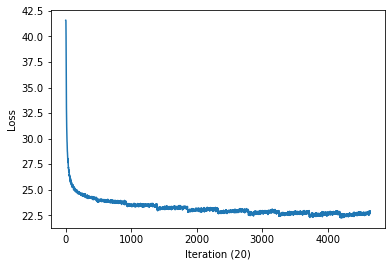

In [92]:
# applying SkipGram to PTB data set
# hyperparameters
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10
GPU = False

# loading and preprocessing PTB data set
train, val, test = chainer.datasets.get_ptb_words()
corpus = train
word_to_id = chainer.datasets.get_ptb_words_vocabulary()
id_to_word = dict((j, i) for i, j in word_to_id.items())
vocab_size = len(word_to_id)

# We do not have to apply 'convert_one_hot' function to contexts and target
# since CBOW with embedding slices corresponding elements.
contexts, target = create_contexts_target(corpus, window_size)
if GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)
    
# Instantiate the model.
model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# Train!
trainer.training(contexts, target, max_epoch, batch_size)
trainer.plot()

In [93]:
# Store the results.
word_vecs = model.word_vecs
if GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

# Analogy
---

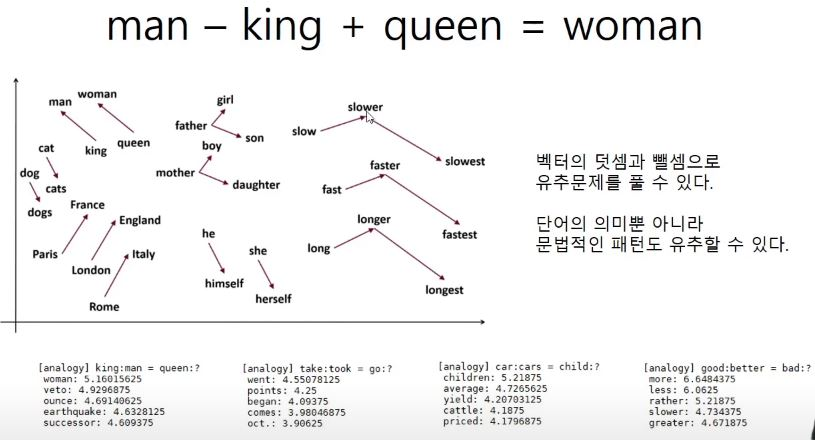

In [79]:
def normalize(x):
    if x.ndim == 2:
        s = np.sqrt((x * x).sum(1)) # Sum with respect to rows.
        x /= s.reshape((s.shape[0], 1)) # Reshape to convert 's' into a column vector.
                                        # Normalize with respect to rows.
    elif x.ndim == 1:
        s = np.sqrt((x * x).sum())
        x /= s
    
    return x

In [85]:
def analogy(a, b, c, word_to_id, id_to_word, word_matrix, top = 5, answer = None):
    # answer: Print similarities.
    for word in (a, b, c):
        if word not in word_to_id:
            print(f"{word} cannot be found.")
            return
    
    print('\n[Analogy] ' + a + ':' + b + ' = ' + c + ':?')
    a_vec, b_vec, c_vec = word_matrix[word_to_id[a]], word_matrix[word_to_id[b]], word_matrix[word_to_id[c]]
    query_vec = b_vec - a_vec + c_vec
    query_vec = normalize(query_vec)
    
    # query_vec: column vector
    # dot product for each row in 'word_matrix' and 'query_vec'
    # It is not cosine similarity since 'word_matrix' is not normalized.
    # However, it is similar to cosine similarity.
    similarity = np.dot(word_matrix, query_vec)
    
    if answer is not None:
        print("==> " + answer + ": " + str(np.dot(word_matrix[word_to_id[answer]],
                                                  query_vec)))
        
    count = 0
    for i in (-1 * similarity).argsort():
        if np.isnan(similarity[i]):
            continue
        if id_to_word[i] in (a, b, c):
            continue
        print(f'{id_to_word[i]}\t: {similarity[i]}')
        
        count += 1
        if count >= top:
            return

In [86]:
# analogy
with open('cbow_params.pkl', 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = dict((j, i) for i, j in word_to_id.items())

analogy('king', 'man', 'queen', word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go', word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child', word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad', word_to_id, id_to_word, word_vecs)


[analogy] king:man = queen:?
a.m: 5.8092546463012695
woman: 5.2106523513793945
naczelnik: 4.789147853851318
husband: 4.575744152069092
hacker: 4.514949798583984

[analogy] take:took = go:?
went: 4.597531795501709
're: 4.405920028686523
came: 4.268428802490234
eurodollars: 4.233005523681641
were: 4.011692047119141

[analogy] car:cars = child:?
a.m: 7.027002334594727
rape: 5.694031715393066
children: 5.293822288513184
males: 5.016983985900879
adults: 5.00998592376709

[analogy] good:better = bad:?
more: 5.612110137939453
rather: 5.213153839111328
less: 5.139364242553711
greater: 4.453296661376953
worse: 3.7039356231689453


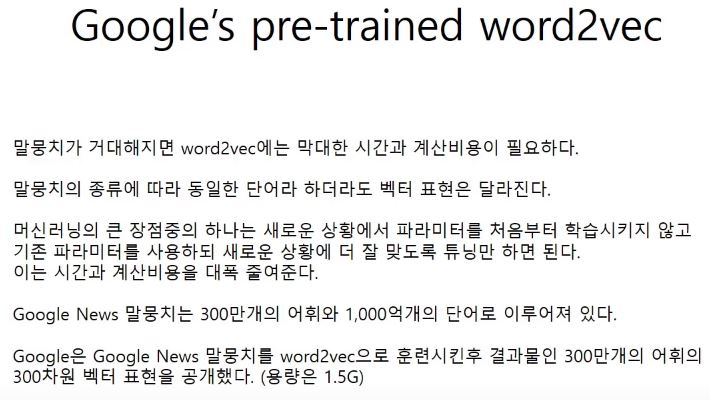

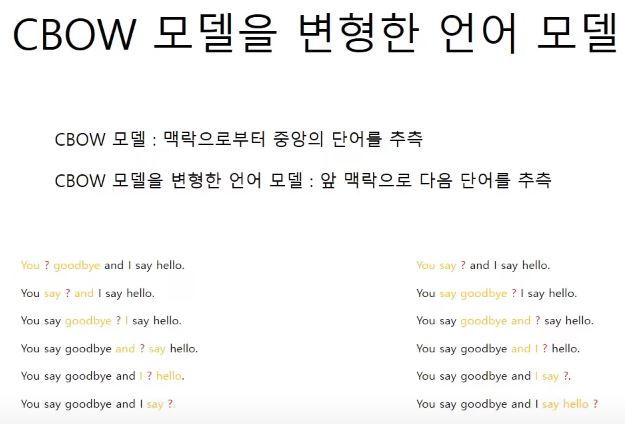

Language Model<br>
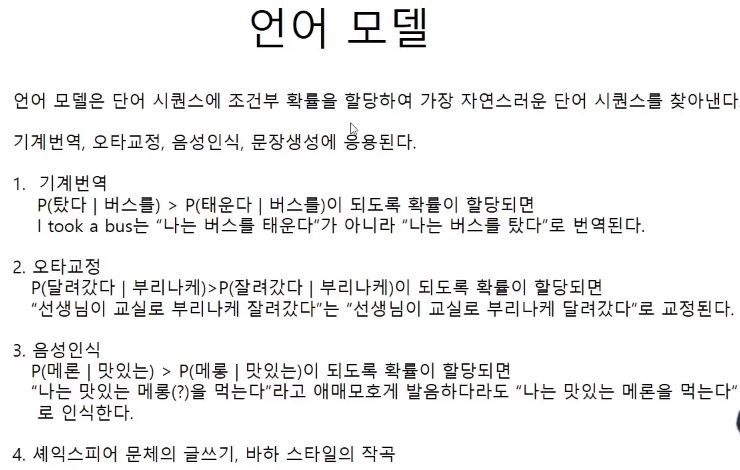

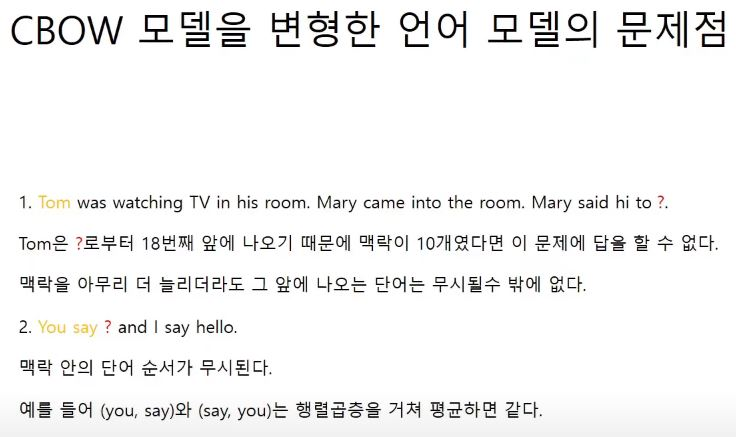
<br>
The answer 'Tom' can be predicted via CBOW when the size of window is 18. (The question mark is the 18th word to the right of 'Tom' including period marks.) Otherwise, the model cannot learn how to predict the word 'Tom'. 

To overcome the issues of language models using CBOW, we move on to Recurrent Neural Networks (RNNs)!